In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

#load training data
dataset = numpy.loadtxt("../Datasets/case3(1)_x.csv", delimiter=",")
X1 = dataset[:,0:1]
X2 = dataset[:,1:2]
Y = numpy.loadtxt("../Datasets/case3_y.csv", delimiter=",")

Using TensorFlow backend.


In [2]:
#set random seed
numpy.random.seed(0)

#construct input layers and explainable layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
explainable_layer_X1 = keras.layers.Dense(1, activation='linear', use_bias=False, kernel_initializer='ones', name='explainable_layer_X1')(input_layer_X1)

input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
explainable_layer_X2 = keras.layers.Dense(1, activation='linear', use_bias=False, kernel_initializer='ones', name='explainable_layer_X2')(input_layer_X2)

#construct hidden layers
merge_layer = keras.layers.concatenate([explainable_layer_X1, explainable_layer_X2], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(2, activation = 'linear', name='hidden_layer_1', kernel_initializer='ones', bias_initializer='ones')(merge_layer)
hidden_layer_2 = keras.layers.Dense(2, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(2, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#construct output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#construct the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2], outputs=output_layer)
model.summary()

#set loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
explainable_layer_X1 (Dense)    (None, 1)            1           input_layer_X1[0][0]             
__________________________________________________________________________________________________
explainable_layer_X2 (Dense)    (None, 1)            1           input_layer_X2[0][0]             
__________________________________________________________________________________________________
merge_laye

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2], Y, epochs = 60000, batch_size = 4)

Epoch 1/60000
4/4 [==============================] - 1s 196ms/step - loss: 0.6990 - acc: 0.5000
Epoch 2/60000
4/4 [==============================] - 0s 499us/step - loss: 0.6983 - acc: 0.5000
Epoch 3/60000
4/4 [==============================] - 0s 751us/step - loss: 0.6977 - acc: 0.5000
Epoch 4/60000
4/4 [==============================] - 0s 750us/step - loss: 0.6973 - acc: 0.5000
Epoch 5/60000
4/4 [==============================] - 0s 750us/step - loss: 0.6969 - acc: 0.5000
Epoch 6/60000
4/4 [==============================] - 0s 500us/step - loss: 0.6965 - acc: 0.5000
Epoch 7/60000
4/4 [==============================] - 0s 750us/step - loss: 0.6960 - acc: 0.5000
Epoch 8/60000
4/4 [==============================] - 0s 750us/step - loss: 0.6957 - acc: 0.5000
Epoch 9/60000
4/4 [==============================] - 0s 500us/step - loss: 0.6953 - acc: 0.5000
Epoch 10/60000
4/4 [==============================] - 0s 751us/step - loss: 0.6949 - acc: 0.5000
Epoch 11/60000
4/4 [===================

Epoch 86/60000
4/4 [==============================] - 0s 751us/step - loss: 0.6348 - acc: 0.7500
Epoch 87/60000
4/4 [==============================] - 0s 750us/step - loss: 0.6335 - acc: 0.7500
Epoch 88/60000
4/4 [==============================] - 0s 500us/step - loss: 0.6322 - acc: 0.7500
Epoch 89/60000
4/4 [==============================] - 0s 500us/step - loss: 0.6309 - acc: 0.7500
Epoch 90/60000
4/4 [==============================] - 0s 500us/step - loss: 0.6296 - acc: 0.7500
Epoch 91/60000
4/4 [==============================] - 0s 501us/step - loss: 0.6283 - acc: 0.7500
Epoch 92/60000
4/4 [==============================] - 0s 500us/step - loss: 0.6270 - acc: 0.7500
Epoch 93/60000
4/4 [==============================] - 0s 501us/step - loss: 0.6257 - acc: 0.7500
Epoch 94/60000
4/4 [==============================] - 0s 501us/step - loss: 0.6244 - acc: 0.7500
Epoch 95/60000
4/4 [==============================] - 0s 500us/step - loss: 0.6230 - acc: 0.7500
Epoch 96/60000
4/4 [==========

Epoch 170/60000
4/4 [==============================] - 0s 751us/step - loss: 0.5307 - acc: 0.7500
Epoch 171/60000
4/4 [==============================] - 0s 750us/step - loss: 0.5293 - acc: 0.7500
Epoch 172/60000
4/4 [==============================] - 0s 751us/step - loss: 0.5278 - acc: 0.7500
Epoch 173/60000
4/4 [==============================] - 0s 751us/step - loss: 0.5264 - acc: 0.7500
Epoch 174/60000
4/4 [==============================] - 0s 751us/step - loss: 0.5250 - acc: 0.7500
Epoch 175/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.5235 - acc: 0.7500
Epoch 176/60000
4/4 [==============================] - 0s 751us/step - loss: 0.5220 - acc: 0.7500
Epoch 177/60000
4/4 [==============================] - 0s 750us/step - loss: 0.5206 - acc: 0.7500
Epoch 178/60000
4/4 [==============================] - 0s 500us/step - loss: 0.5191 - acc: 0.7500
Epoch 179/60000
4/4 [==============================] - 0s 751us/step - loss: 0.5176 - acc: 0.7500
Epoch 180/60000
4/4 [=

Epoch 254/60000
4/4 [==============================] - 0s 500us/step - loss: 0.3801 - acc: 1.0000
Epoch 255/60000
4/4 [==============================] - 0s 501us/step - loss: 0.3780 - acc: 1.0000
Epoch 256/60000
4/4 [==============================] - 0s 750us/step - loss: 0.3758 - acc: 1.0000
Epoch 257/60000
4/4 [==============================] - 0s 750us/step - loss: 0.3737 - acc: 1.0000
Epoch 258/60000
4/4 [==============================] - 0s 500us/step - loss: 0.3716 - acc: 1.0000
Epoch 259/60000
4/4 [==============================] - 0s 750us/step - loss: 0.3695 - acc: 1.0000
Epoch 260/60000
4/4 [==============================] - 0s 500us/step - loss: 0.3673 - acc: 1.0000
Epoch 261/60000
4/4 [==============================] - 0s 501us/step - loss: 0.3652 - acc: 1.0000
Epoch 262/60000
4/4 [==============================] - 0s 500us/step - loss: 0.3631 - acc: 1.0000
Epoch 263/60000
4/4 [==============================] - 0s 500us/step - loss: 0.3610 - acc: 1.0000
Epoch 264/60000
4/4 

Epoch 338/60000
4/4 [==============================] - 0s 500us/step - loss: 0.2302 - acc: 1.0000
Epoch 339/60000
4/4 [==============================] - 0s 500us/step - loss: 0.2290 - acc: 1.0000
Epoch 340/60000
4/4 [==============================] - 0s 751us/step - loss: 0.2277 - acc: 1.0000
Epoch 341/60000
4/4 [==============================] - 0s 500us/step - loss: 0.2265 - acc: 1.0000
Epoch 342/60000
4/4 [==============================] - 0s 751us/step - loss: 0.2252 - acc: 1.0000
Epoch 343/60000
4/4 [==============================] - 0s 500us/step - loss: 0.2240 - acc: 1.0000
Epoch 344/60000
4/4 [==============================] - 0s 750us/step - loss: 0.2228 - acc: 1.0000
Epoch 345/60000
4/4 [==============================] - 0s 500us/step - loss: 0.2216 - acc: 1.0000
Epoch 346/60000
4/4 [==============================] - 0s 500us/step - loss: 0.2205 - acc: 1.0000
Epoch 347/60000
4/4 [==============================] - 0s 751us/step - loss: 0.2193 - acc: 1.0000
Epoch 348/60000
4/4 

Epoch 422/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1567 - acc: 1.0000
Epoch 423/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1561 - acc: 1.0000
Epoch 424/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.1555 - acc: 1.0000
Epoch 425/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1549 - acc: 1.0000
Epoch 426/60000
4/4 [==============================] - 0s 500us/step - loss: 0.1544 - acc: 1.0000
Epoch 427/60000
4/4 [==============================] - 0s 751us/step - loss: 0.1538 - acc: 1.0000
Epoch 428/60000
4/4 [==============================] - 0s 500us/step - loss: 0.1532 - acc: 1.0000
Epoch 429/60000
4/4 [==============================] - 0s 500us/step - loss: 0.1527 - acc: 1.0000
Epoch 430/60000
4/4 [==============================] - 0s 500us/step - loss: 0.1521 - acc: 1.0000
Epoch 431/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1515 - acc: 1.0000
Epoch 432/60000
4/4 [=

Epoch 506/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1193 - acc: 1.0000
Epoch 507/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1190 - acc: 1.0000
Epoch 508/60000
4/4 [==============================] - 0s 751us/step - loss: 0.1187 - acc: 1.0000
Epoch 509/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1183 - acc: 1.0000
Epoch 510/60000
4/4 [==============================] - 0s 751us/step - loss: 0.1180 - acc: 1.0000
Epoch 511/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1177 - acc: 1.0000
Epoch 512/60000
4/4 [==============================] - 0s 751us/step - loss: 0.1174 - acc: 1.0000
Epoch 513/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1170 - acc: 1.0000
Epoch 514/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1167 - acc: 1.0000
Epoch 515/60000
4/4 [==============================] - 0s 750us/step - loss: 0.1164 - acc: 1.0000
Epoch 516/60000
4/4 

Epoch 590/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0966 - acc: 1.0000
Epoch 591/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0963 - acc: 1.0000
Epoch 592/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0961 - acc: 1.0000
Epoch 593/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0959 - acc: 1.0000
Epoch 594/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0957 - acc: 1.0000
Epoch 595/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0955 - acc: 1.0000
Epoch 596/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0953 - acc: 1.0000
Epoch 597/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0950 - acc: 1.0000
Epoch 598/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0948 - acc: 1.0000
Epoch 599/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0946 - acc: 1.0000
Epoch 600/60000
4/4 

Epoch 674/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0810 - acc: 1.0000
Epoch 675/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0808 - acc: 1.0000
Epoch 676/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0806 - acc: 1.0000
Epoch 677/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0805 - acc: 1.0000
Epoch 678/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0803 - acc: 1.0000
Epoch 679/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0802 - acc: 1.0000
Epoch 680/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0800 - acc: 1.0000
Epoch 681/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0799 - acc: 1.0000
Epoch 682/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0797 - acc: 1.0000
Epoch 683/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0796 - acc: 1.0000
Epoch 684/60000
4/4 

Epoch 758/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0695 - acc: 1.0000
Epoch 759/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0693 - acc: 1.0000
Epoch 760/60000
4/4 [==============================] - 0s 250us/step - loss: 0.0692 - acc: 1.0000
Epoch 761/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0691 - acc: 1.0000
Epoch 762/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0690 - acc: 1.0000
Epoch 763/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0689 - acc: 1.0000
Epoch 764/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0688 - acc: 1.0000
Epoch 765/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0686 - acc: 1.0000
Epoch 766/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0685 - acc: 1.0000
Epoch 767/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0684 - acc: 1.0000
Epoch 768/60000
4/4 

Epoch 842/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0606 - acc: 1.0000
Epoch 843/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0605 - acc: 1.0000
Epoch 844/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0604 - acc: 1.0000
Epoch 845/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0603 - acc: 1.0000
Epoch 846/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0602 - acc: 1.0000
Epoch 847/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0601 - acc: 1.0000
Epoch 848/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0600 - acc: 1.0000
Epoch 849/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0599 - acc: 1.0000
Epoch 850/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0598 - acc: 1.0000
Epoch 851/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0598 - acc: 1.0000
Epoch 852/60000
4/4 

Epoch 926/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0535 - acc: 1.0000
Epoch 927/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0534 - acc: 1.0000
Epoch 928/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0534 - acc: 1.0000
Epoch 929/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0533 - acc: 1.0000
Epoch 930/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0532 - acc: 1.0000
Epoch 931/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0531 - acc: 1.0000
Epoch 932/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0531 - acc: 1.0000
Epoch 933/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0530 - acc: 1.0000
Epoch 934/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0529 - acc: 1.0000
Epoch 935/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0528 - acc: 1.0000
Epoch 936/60000
4/4 

Epoch 1010/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0477 - acc: 1.0000
Epoch 1011/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0476 - acc: 1.0000
Epoch 1012/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0476 - acc: 1.0000
Epoch 1013/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0475 - acc: 1.0000
Epoch 1014/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0475 - acc: 1.0000
Epoch 1015/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0474 - acc: 1.0000
Epoch 1016/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0473 - acc: 1.0000
Epoch 1017/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0473 - acc: 1.0000
Epoch 1018/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0472 - acc: 1.0000
Epoch 1019/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0471 - acc: 1.0000
Epoch 1020

Epoch 1093/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0429 - acc: 1.0000
Epoch 1094/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0429 - acc: 1.0000
Epoch 1095/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0428 - acc: 1.0000
Epoch 1096/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0428 - acc: 1.0000
Epoch 1097/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0427 - acc: 1.0000
Epoch 1098/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0427 - acc: 1.0000
Epoch 1099/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0426 - acc: 1.0000
Epoch 1100/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0425 - acc: 1.0000
Epoch 1101/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0425 - acc: 1.0000
Epoch 1102/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0424 - acc: 1.0000
Epoch 1103

Epoch 1176/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0389 - acc: 1.0000
Epoch 1177/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0388 - acc: 1.0000
Epoch 1178/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0388 - acc: 1.0000
Epoch 1179/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0387 - acc: 1.0000
Epoch 1180/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0387 - acc: 1.0000
Epoch 1181/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0386 - acc: 1.0000
Epoch 1182/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0386 - acc: 1.0000
Epoch 1183/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0385 - acc: 1.0000
Epoch 1184/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0385 - acc: 1.0000
Epoch 1185/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0385 - acc: 1.0000
Epoch 1186

Epoch 1259/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0354 - acc: 1.0000
Epoch 1260/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0353 - acc: 1.0000
Epoch 1261/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0353 - acc: 1.0000
Epoch 1262/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0352 - acc: 1.0000
Epoch 1263/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0352 - acc: 1.0000
Epoch 1264/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0352 - acc: 1.0000
Epoch 1265/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0351 - acc: 1.0000
Epoch 1266/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0351 - acc: 1.0000
Epoch 1267/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0351 - acc: 1.0000
Epoch 1268/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0350 - acc: 1.0000
Epoch 1269/6

Epoch 1342/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0323 - acc: 1.0000
Epoch 1343/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0323 - acc: 1.0000
Epoch 1344/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0323 - acc: 1.0000
Epoch 1345/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0322 - acc: 1.0000
Epoch 1346/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0322 - acc: 1.0000
Epoch 1347/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0322 - acc: 1.0000
Epoch 1348/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0321 - acc: 1.0000
Epoch 1349/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0321 - acc: 1.0000
Epoch 1350/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0321 - acc: 1.0000
Epoch 1351/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0320 - acc: 1.0000
Epoch 1352

Epoch 1425/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0297 - acc: 1.0000
Epoch 1426/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0297 - acc: 1.0000
Epoch 1427/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0296 - acc: 1.0000
Epoch 1428/60000
4/4 [==============================] - 0s 250us/step - loss: 0.0296 - acc: 1.0000
Epoch 1429/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0296 - acc: 1.0000
Epoch 1430/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0295 - acc: 1.0000
Epoch 1431/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0295 - acc: 1.0000
Epoch 1432/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0295 - acc: 1.0000
Epoch 1433/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0294 - acc: 1.0000
Epoch 1434/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0294 - acc: 1.0000
Epoch 1435

Epoch 1509/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0273 - acc: 1.0000
Epoch 1510/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0273 - acc: 1.0000
Epoch 1511/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0273 - acc: 1.0000
Epoch 1512/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0272 - acc: 1.0000
Epoch 1513/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0272 - acc: 1.0000
Epoch 1514/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0272 - acc: 1.0000
Epoch 1515/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0272 - acc: 1.0000
Epoch 1516/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0271 - acc: 1.0000
Epoch 1517/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0271 - acc: 1.0000
Epoch 1518/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0271 - acc: 1.0000
Epoch 1519/6

Epoch 1592/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0253 - acc: 1.0000
Epoch 1593/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0252 - acc: 1.0000
Epoch 1594/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0252 - acc: 1.0000
Epoch 1595/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0252 - acc: 1.0000
Epoch 1596/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0252 - acc: 1.0000
Epoch 1597/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0251 - acc: 1.0000
Epoch 1598/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0251 - acc: 1.0000
Epoch 1599/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0251 - acc: 1.0000
Epoch 1600/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0251 - acc: 1.0000
Epoch 1601/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0250 - acc: 1.0000
Epoch 1602

Epoch 1675/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0234 - acc: 1.0000
Epoch 1676/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0234 - acc: 1.0000
Epoch 1677/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0234 - acc: 1.0000
Epoch 1678/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0233 - acc: 1.0000
Epoch 1679/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0233 - acc: 1.0000
Epoch 1680/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0233 - acc: 1.0000
Epoch 1681/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0233 - acc: 1.0000
Epoch 1682/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0233 - acc: 1.0000
Epoch 1683/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0232 - acc: 1.0000
Epoch 1684/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0232 - acc: 1.0000
Epoch 1685/6

Epoch 1758/60000
4/4 [==============================] - 0s 749us/step - loss: 0.0217 - acc: 1.0000
Epoch 1759/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0217 - acc: 1.0000
Epoch 1760/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0217 - acc: 1.0000
Epoch 1761/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0217 - acc: 1.0000
Epoch 1762/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0217 - acc: 1.0000
Epoch 1763/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0216 - acc: 1.0000
Epoch 1764/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0216 - acc: 1.0000
Epoch 1765/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0216 - acc: 1.0000
Epoch 1766/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0216 - acc: 1.0000
Epoch 1767/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0216 - acc: 1.0000
Epoch 1768

Epoch 1841/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0202 - acc: 1.0000
Epoch 1842/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0202 - acc: 1.0000
Epoch 1843/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0202 - acc: 1.0000
Epoch 1844/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0202 - acc: 1.0000
Epoch 1845/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0202 - acc: 1.0000
Epoch 1846/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0202 - acc: 1.0000
Epoch 1847/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0201 - acc: 1.0000
Epoch 1848/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0201 - acc: 1.0000
Epoch 1849/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0201 - acc: 1.0000
Epoch 1850/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0201 - acc: 1.0000
Epoch 1851

Epoch 1925/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0189 - acc: 1.0000
Epoch 1926/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0189 - acc: 1.0000
Epoch 1927/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0188 - acc: 1.0000
Epoch 1928/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0188 - acc: 1.0000
Epoch 1929/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0188 - acc: 1.0000
Epoch 1930/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0188 - acc: 1.0000
Epoch 1931/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0188 - acc: 1.0000
Epoch 1932/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0188 - acc: 1.0000
Epoch 1933/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0188 - acc: 1.0000
Epoch 1934/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0187 - acc: 1.0000
Epoch 1935

Epoch 2008/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0176 - acc: 1.0000
Epoch 2009/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0176 - acc: 1.0000
Epoch 2010/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0176 - acc: 1.0000
Epoch 2011/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0176 - acc: 1.0000
Epoch 2012/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0176 - acc: 1.0000
Epoch 2013/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0176 - acc: 1.0000
Epoch 2014/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0176 - acc: 1.0000
Epoch 2015/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0175 - acc: 1.0000
Epoch 2016/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0175 - acc: 1.0000
Epoch 2017/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0175 - acc: 1.0000
Epoch 2018

Epoch 2091/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0165 - acc: 1.0000
Epoch 2092/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0165 - acc: 1.0000
Epoch 2093/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0165 - acc: 1.0000
Epoch 2094/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0165 - acc: 1.0000
Epoch 2095/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0165 - acc: 1.0000
Epoch 2096/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0165 - acc: 1.0000
Epoch 2097/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0164 - acc: 1.0000
Epoch 2098/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0164 - acc: 1.0000
Epoch 2099/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0164 - acc: 1.0000
Epoch 2100/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0164 - acc: 1.0000
Epoch 2101/60000
4/4

Epoch 2175/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0155 - acc: 1.0000
Epoch 2176/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0155 - acc: 1.0000
Epoch 2177/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0155 - acc: 1.0000
Epoch 2178/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0154 - acc: 1.0000
Epoch 2179/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0154 - acc: 1.0000
Epoch 2180/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0154 - acc: 1.0000
Epoch 2181/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0154 - acc: 1.0000
Epoch 2182/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0154 - acc: 1.0000
Epoch 2183/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0154 - acc: 1.0000
Epoch 2184/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0154 - acc: 1.0000
Epoch 2185/600

Epoch 2259/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0145 - acc: 1.0000
Epoch 2260/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0145 - acc: 1.0000
Epoch 2261/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0145 - acc: 1.0000
Epoch 2262/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0145 - acc: 1.0000
Epoch 2263/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0145 - acc: 1.0000
Epoch 2264/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0145 - acc: 1.0000
Epoch 2265/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0145 - acc: 1.0000
Epoch 2266/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0145 - acc: 1.0000
Epoch 2267/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0144 - acc: 1.0000
Epoch 2268/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0144 - acc: 1.0000
Epoch 2269/6

Epoch 2343/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0137 - acc: 1.0000
Epoch 2344/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0136 - acc: 1.0000
Epoch 2345/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0136 - acc: 1.0000
Epoch 2346/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0136 - acc: 1.0000
Epoch 2347/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0136 - acc: 1.0000
Epoch 2348/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0136 - acc: 1.0000
Epoch 2349/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0136 - acc: 1.0000
Epoch 2350/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0136 - acc: 1.0000
Epoch 2351/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0136 - acc: 1.0000
Epoch 2352/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0136 - acc: 1.0000
Epoch 2353/600

Epoch 2427/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0129 - acc: 1.0000
Epoch 2428/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0128 - acc: 1.0000
Epoch 2429/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0128 - acc: 1.0000
Epoch 2430/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0128 - acc: 1.0000
Epoch 2431/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0128 - acc: 1.0000
Epoch 2432/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0128 - acc: 1.0000
Epoch 2433/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0128 - acc: 1.0000
Epoch 2434/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0128 - acc: 1.0000
Epoch 2435/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0128 - acc: 1.0000
Epoch 2436/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0128 - acc: 1.0000
Epoch 2437

Epoch 2510/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0121 - acc: 1.0000
Epoch 2511/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0121 - acc: 1.0000
Epoch 2512/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0121 - acc: 1.0000
Epoch 2513/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0121 - acc: 1.0000
Epoch 2514/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0121 - acc: 1.0000
Epoch 2515/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0121 - acc: 1.0000
Epoch 2516/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0121 - acc: 1.0000
Epoch 2517/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0121 - acc: 1.0000
Epoch 2518/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0121 - acc: 1.0000
Epoch 2519/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0120 - acc: 1.0000
Epoch 2520/60000
4

Epoch 2593/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0114 - acc: 1.0000
Epoch 2594/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0114 - acc: 1.0000
Epoch 2595/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0114 - acc: 1.0000
Epoch 2596/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0114 - acc: 1.0000
Epoch 2597/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0114 - acc: 1.0000
Epoch 2598/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0114 - acc: 1.0000
Epoch 2599/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0114 - acc: 1.0000
Epoch 2600/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0114 - acc: 1.0000
Epoch 2601/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0114 - acc: 1.0000
Epoch 2602/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0114 - acc: 1.0000
Epoch 2603/600

Epoch 2677/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0108 - acc: 1.0000
Epoch 2678/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0108 - acc: 1.0000
Epoch 2679/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0108 - acc: 1.0000
Epoch 2680/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0108 - acc: 1.0000
Epoch 2681/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0108 - acc: 1.0000
Epoch 2682/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0108 - acc: 1.0000
Epoch 2683/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0108 - acc: 1.0000
Epoch 2684/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0107 - acc: 1.0000
Epoch 2685/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0107 - acc: 1.0000
Epoch 2686/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0107 - acc: 1.0000
Epoch 2687/6

Epoch 2761/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0102 - acc: 1.0000
Epoch 2762/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0102 - acc: 1.0000
Epoch 2763/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0102 - acc: 1.0000
Epoch 2764/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0102 - acc: 1.0000
Epoch 2765/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0102 - acc: 1.0000
Epoch 2766/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0102 - acc: 1.0000
Epoch 2767/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0102 - acc: 1.0000
Epoch 2768/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0102 - acc: 1.0000
Epoch 2769/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0102 - acc: 1.0000
Epoch 2770/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0101 - acc: 1.0000
Epoch 2771

Epoch 2845/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0097 - acc: 1.0000
Epoch 2846/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0096 - acc: 1.0000
Epoch 2847/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0096 - acc: 1.0000
Epoch 2848/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0096 - acc: 1.0000
Epoch 2849/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0096 - acc: 1.0000
Epoch 2850/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0096 - acc: 1.0000
Epoch 2851/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0096 - acc: 1.0000
Epoch 2852/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0096 - acc: 1.0000
Epoch 2853/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0096 - acc: 1.0000
Epoch 2854/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0096 - acc: 1.0000
Epoch 2855/60000

Epoch 2929/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0091 - acc: 1.0000
Epoch 2930/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0091 - acc: 1.0000
Epoch 2931/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0091 - acc: 1.0000
Epoch 2932/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0091 - acc: 1.0000
Epoch 2933/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0091 - acc: 1.0000
Epoch 2934/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0091 - acc: 1.0000
Epoch 2935/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0091 - acc: 1.0000
Epoch 2936/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0091 - acc: 1.0000
Epoch 2937/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0091 - acc: 1.0000
Epoch 2938/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0091 - acc: 1.0000
Epoch 2939/600

Epoch 3012/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0087 - acc: 1.0000
Epoch 3013/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0087 - acc: 1.0000
Epoch 3014/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0087 - acc: 1.0000
Epoch 3015/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0086 - acc: 1.0000
Epoch 3016/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0086 - acc: 1.0000
Epoch 3017/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0086 - acc: 1.0000
Epoch 3018/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0086 - acc: 1.0000
Epoch 3019/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0086 - acc: 1.0000
Epoch 3020/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0086 - acc: 1.0000
Epoch 3021/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0086 - acc: 1.0000
Epoch 3022

Epoch 3095/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0082 - acc: 1.0000
Epoch 3096/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0082 - acc: 1.0000
Epoch 3097/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0082 - acc: 1.0000
Epoch 3098/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0082 - acc: 1.0000
Epoch 3099/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0082 - acc: 1.0000
Epoch 3100/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0082 - acc: 1.0000
Epoch 3101/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0082 - acc: 1.0000
Epoch 3102/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0082 - acc: 1.0000
Epoch 3103/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0082 - acc: 1.0000
Epoch 3104/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0082 - acc: 1.0000
Epoch 3105

Epoch 3178/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0078 - acc: 1.0000
Epoch 3179/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0078 - acc: 1.0000
Epoch 3180/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0078 - acc: 1.0000
Epoch 3181/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0078 - acc: 1.0000
Epoch 3182/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0078 - acc: 1.0000
Epoch 3183/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0078 - acc: 1.0000
Epoch 3184/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0078 - acc: 1.0000
Epoch 3185/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0078 - acc: 1.0000
Epoch 3186/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0078 - acc: 1.0000
Epoch 3187/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0078 - acc: 1.0000
Epoch 3188

Epoch 3261/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0074 - acc: 1.0000
Epoch 3262/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0074 - acc: 1.0000
Epoch 3263/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0074 - acc: 1.0000
Epoch 3264/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0074 - acc: 1.0000
Epoch 3265/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0074 - acc: 1.0000
Epoch 3266/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0074 - acc: 1.0000
Epoch 3267/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0074 - acc: 1.0000
Epoch 3268/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0074 - acc: 1.0000
Epoch 3269/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0074 - acc: 1.0000
Epoch 3270/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0074 - acc: 1.0000
Epoch 3271

4/4 [==============================] - 0s 501us/step - loss: 0.0070 - acc: 1.0000
Epoch 3345/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0070 - acc: 1.0000
Epoch 3346/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0070 - acc: 1.0000
Epoch 3347/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0070 - acc: 1.0000
Epoch 3348/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0070 - acc: 1.0000
Epoch 3349/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0070 - acc: 1.0000
Epoch 3350/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0070 - acc: 1.0000
Epoch 3351/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0070 - acc: 1.0000
Epoch 3352/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0070 - acc: 1.0000
Epoch 3353/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0070 - acc: 1.0000
Epoch 3354/60000
4/4 [=====

Epoch 3427/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0067 - acc: 1.0000
Epoch 3428/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0067 - acc: 1.0000
Epoch 3429/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0067 - acc: 1.0000
Epoch 3430/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0067 - acc: 1.0000
Epoch 3431/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0067 - acc: 1.0000
Epoch 3432/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0067 - acc: 1.0000
Epoch 3433/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0067 - acc: 1.0000
Epoch 3434/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0067 - acc: 1.0000
Epoch 3435/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0067 - acc: 1.0000
Epoch 3436/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0067 - acc: 1.0000
Epoch 3437

Epoch 3510/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0064 - acc: 1.0000
Epoch 3511/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0064 - acc: 1.0000
Epoch 3512/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0064 - acc: 1.0000
Epoch 3513/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0064 - acc: 1.0000
Epoch 3514/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0064 - acc: 1.0000
Epoch 3515/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0064 - acc: 1.0000
Epoch 3516/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0064 - acc: 1.0000
Epoch 3517/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0064 - acc: 1.0000
Epoch 3518/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0063 - acc: 1.0000
Epoch 3519/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0063 - acc: 1.0000
Epoch 3520

Epoch 3594/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0061 - acc: 1.0000
Epoch 3595/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0061 - acc: 1.0000
Epoch 3596/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0061 - acc: 1.0000
Epoch 3597/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0061 - acc: 1.0000
Epoch 3598/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0061 - acc: 1.0000
Epoch 3599/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0060 - acc: 1.0000
Epoch 3600/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0060 - acc: 1.0000
Epoch 3601/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0060 - acc: 1.0000
Epoch 3602/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0060 - acc: 1.0000
Epoch 3603/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0060 - acc: 1.0000
Epoch 3604/600

Epoch 3678/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0058 - acc: 1.0000
Epoch 3679/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0058 - acc: 1.0000
Epoch 3680/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0058 - acc: 1.0000
Epoch 3681/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0058 - acc: 1.0000
Epoch 3682/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0058 - acc: 1.0000
Epoch 3683/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0058 - acc: 1.0000
Epoch 3684/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0058 - acc: 1.0000
Epoch 3685/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0058 - acc: 1.0000
Epoch 3686/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0057 - acc: 1.0000
Epoch 3687/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0057 - acc: 1.0000
Epoch 3688/6

Epoch 3761/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0055 - acc: 1.0000
Epoch 3762/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0055 - acc: 1.0000
Epoch 3763/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0055 - acc: 1.0000
Epoch 3764/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0055 - acc: 1.0000
Epoch 3765/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0055 - acc: 1.0000
Epoch 3766/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0055 - acc: 1.0000
Epoch 3767/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0055 - acc: 1.0000
Epoch 3768/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0055 - acc: 1.0000
Epoch 3769/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0055 - acc: 1.0000
Epoch 3770/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0055 - acc: 1.0000
Epoch 3771

Epoch 3844/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052 - acc: 1.0000
Epoch 3845/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0052 - acc: 1.0000
Epoch 3846/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0052 - acc: 1.0000
Epoch 3847/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052 - acc: 1.0000
Epoch 3848/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0052 - acc: 1.0000
Epoch 3849/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0052 - acc: 1.0000
Epoch 3850/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0052 - acc: 1.0000
Epoch 3851/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0052 - acc: 1.0000
Epoch 3852/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0052 - acc: 1.0000
Epoch 3853/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0052 - acc: 1.0000
Epoch 3854/600

Epoch 3928/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0050 - acc: 1.0000
Epoch 3929/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0050 - acc: 1.0000
Epoch 3930/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0050 - acc: 1.0000
Epoch 3931/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0050 - acc: 1.0000
Epoch 3932/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0050 - acc: 1.0000
Epoch 3933/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0050 - acc: 1.0000
Epoch 3934/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0050 - acc: 1.0000
Epoch 3935/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0050 - acc: 1.0000
Epoch 3936/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0050 - acc: 1.0000
Epoch 3937/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0050 - acc: 1.0000
Epoch 3938

Epoch 4011/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0048 - acc: 1.0000
Epoch 4012/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0048 - acc: 1.0000
Epoch 4013/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0048 - acc: 1.0000
Epoch 4014/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0048 - acc: 1.0000
Epoch 4015/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0048 - acc: 1.0000
Epoch 4016/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0048 - acc: 1.0000
Epoch 4017/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0048 - acc: 1.0000
Epoch 4018/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0048 - acc: 1.0000
Epoch 4019/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0048 - acc: 1.0000
Epoch 4020/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0047 - acc: 1.0000
Epoch 4021

Epoch 4094/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0046 - acc: 1.0000
Epoch 4095/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0046 - acc: 1.0000
Epoch 4096/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0045 - acc: 1.0000
Epoch 4097/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0045 - acc: 1.0000
Epoch 4098/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0045 - acc: 1.0000
Epoch 4099/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0045 - acc: 1.0000
Epoch 4100/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0045 - acc: 1.0000
Epoch 4101/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0045 - acc: 1.0000
Epoch 4102/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 1.0000
Epoch 4103/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 1.0000
Epoch 4104/600

Epoch 4178/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4179/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4180/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4181/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4182/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4183/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4184/60000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4185/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4186/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0043 - acc: 1.0000
Epoch 4187/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 4188/60000
4/4 [======

Epoch 4262/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0041 - acc: 1.0000
Epoch 4263/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0041 - acc: 1.0000
Epoch 4264/60000
4/4 [==============================] - 0s 752us/step - loss: 0.0041 - acc: 1.0000
Epoch 4265/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0041 - acc: 1.0000
Epoch 4266/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0041 - acc: 1.0000
Epoch 4267/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0041 - acc: 1.0000
Epoch 4268/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0041 - acc: 1.0000
Epoch 4269/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0041 - acc: 1.0000
Epoch 4270/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0041 - acc: 1.0000
Epoch 4271/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0041 - acc: 1.0000
Epoch 4272/60000

Epoch 4346/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0040 - acc: 1.0000
Epoch 4347/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0040 - acc: 1.0000
Epoch 4348/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0040 - acc: 1.0000
Epoch 4349/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0040 - acc: 1.0000
Epoch 4350/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0040 - acc: 1.0000
Epoch 4351/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0040 - acc: 1.0000
Epoch 4352/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0039 - acc: 1.0000
Epoch 4353/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0039 - acc: 1.0000
Epoch 4354/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0039 - acc: 1.0000
Epoch 4355/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0039 - acc: 1.0000
Epoch 4356/60000
4/4

Epoch 4430/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038 - acc: 1.0000
Epoch 4431/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038 - acc: 1.0000
Epoch 4432/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038 - acc: 1.0000
Epoch 4433/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0038 - acc: 1.0000
Epoch 4434/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0038 - acc: 1.0000
Epoch 4435/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0038 - acc: 1.0000
Epoch 4436/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0038 - acc: 1.0000
Epoch 4437/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0038 - acc: 1.0000
Epoch 4438/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0038 - acc: 1.0000
Epoch 4439/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0038 - acc: 1.0000
Epoch 4440/60000

Epoch 4513/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0036 - acc: 1.0000
Epoch 4514/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0036 - acc: 1.0000
Epoch 4515/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0036 - acc: 1.0000
Epoch 4516/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0036 - acc: 1.0000
Epoch 4517/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0036 - acc: 1.0000
Epoch 4518/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0036 - acc: 1.0000
Epoch 4519/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0036 - acc: 1.0000
Epoch 4520/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0036 - acc: 1.0000
Epoch 4521/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0036 - acc: 1.0000
Epoch 4522/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0036 - acc: 1.0000
Epoch 4523

Epoch 4596/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035 - acc: 1.0000
Epoch 4597/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0035 - acc: 1.0000
Epoch 4598/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0035 - acc: 1.0000
Epoch 4599/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0035 - acc: 1.0000
Epoch 4600/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0035 - acc: 1.0000
Epoch 4601/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0034 - acc: 1.0000
Epoch 4602/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0034 - acc: 1.0000
Epoch 4603/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0034 - acc: 1.0000
Epoch 4604/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0034 - acc: 1.0000
Epoch 4605/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0034 - acc: 1.0000
Epoch 4606/600

Epoch 4680/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0033 - acc: 1.0000
Epoch 4681/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0033 - acc: 1.0000
Epoch 4682/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0033 - acc: 1.0000
Epoch 4683/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0033 - acc: 1.0000
Epoch 4684/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0033 - acc: 1.0000
Epoch 4685/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0033 - acc: 1.0000
Epoch 4686/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0033 - acc: 1.0000
Epoch 4687/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0033 - acc: 1.0000
Epoch 4688/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0033 - acc: 1.0000
Epoch 4689/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0033 - acc: 1.0000
Epoch 4690

Epoch 4764/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0032 - acc: 1.0000
Epoch 4765/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0032 - acc: 1.0000
Epoch 4766/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0032 - acc: 1.0000
Epoch 4767/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0032 - acc: 1.0000
Epoch 4768/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0032 - acc: 1.0000
Epoch 4769/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0032 - acc: 1.0000
Epoch 4770/60000
4/4 [==============================] - 0s 499us/step - loss: 0.0032 - acc: 1.0000
Epoch 4771/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0031 - acc: 1.0000
Epoch 4772/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0031 - acc: 1.0000
Epoch 4773/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0031 - acc: 1.0000
Epoch 4774/6

Epoch 4848/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0030 - acc: 1.0000
Epoch 4849/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0030 - acc: 1.0000
Epoch 4850/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0030 - acc: 1.0000
Epoch 4851/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0030 - acc: 1.0000
Epoch 4852/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0030 - acc: 1.0000
Epoch 4853/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0030 - acc: 1.0000
Epoch 4854/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030 - acc: 1.0000
Epoch 4855/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0030 - acc: 1.0000
Epoch 4856/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0030 - acc: 1.0000
Epoch 4857/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0030 - acc: 1.0000
Epoch 4858/6

Epoch 4932/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000
Epoch 4933/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000
Epoch 4934/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000
Epoch 4935/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000
Epoch 4936/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0029 - acc: 1.0000
Epoch 4937/60000
4/4 [==============================] - 0s 1000us/step - loss: 0.0029 - acc: 1.0000
Epoch 4938/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000
Epoch 4939/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000
Epoch 4940/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0029 - acc: 1.0000
Epoch 4941/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - acc: 1.0000
Epoch 4942/60000
4/4 [=

Epoch 5016/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0028 - acc: 1.0000
Epoch 5017/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0028 - acc: 1.0000
Epoch 5018/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0028 - acc: 1.0000
Epoch 5019/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0028 - acc: 1.0000
Epoch 5020/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0028 - acc: 1.0000
Epoch 5021/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0028 - acc: 1.0000
Epoch 5022/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0028 - acc: 1.0000
Epoch 5023/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0028 - acc: 1.0000
Epoch 5024/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0028 - acc: 1.0000
Epoch 5025/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0028 - acc: 1.0000
Epoch 5026

Epoch 5100/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0026 - acc: 1.0000
Epoch 5101/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0026 - acc: 1.0000
Epoch 5102/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 1.0000
Epoch 5103/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0026 - acc: 1.0000
Epoch 5104/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0026 - acc: 1.0000
Epoch 5105/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0026 - acc: 1.0000
Epoch 5106/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0026 - acc: 1.0000
Epoch 5107/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0026 - acc: 1.0000
Epoch 5108/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0026 - acc: 1.0000
Epoch 5109/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0026 - acc: 1.0000
Epoch 5110/6

Epoch 5183/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0025 - acc: 1.0000
Epoch 5184/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0025 - acc: 1.0000
Epoch 5185/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0025 - acc: 1.0000
Epoch 5186/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0025 - acc: 1.0000
Epoch 5187/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0025 - acc: 1.0000
Epoch 5188/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0025 - acc: 1.0000
Epoch 5189/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0025 - acc: 1.0000
Epoch 5190/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0025 - acc: 1.0000
Epoch 5191/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0025 - acc: 1.0000
Epoch 5192/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0025 - acc: 1.0000
Epoch 5193/6

Epoch 5267/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0024 - acc: 1.0000
Epoch 5268/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0024 - acc: 1.0000
Epoch 5269/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0024 - acc: 1.0000
Epoch 5270/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0024 - acc: 1.0000
Epoch 5271/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0024 - acc: 1.0000
Epoch 5272/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0024 - acc: 1.0000
Epoch 5273/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0024 - acc: 1.0000
Epoch 5274/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0024 - acc: 1.0000
Epoch 5275/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0024 - acc: 1.0000
Epoch 5276/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0024 - acc: 1.0000
Epoch 5277/6

Epoch 5351/60000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 1.0000
Epoch 5352/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0023 - acc: 1.0000
Epoch 5353/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - acc: 1.0000
Epoch 5354/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - acc: 1.0000
Epoch 5355/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - acc: 1.0000
Epoch 5356/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - acc: 1.0000
Epoch 5357/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - acc: 1.0000
Epoch 5358/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0023 - acc: 1.0000
Epoch 5359/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - acc: 1.0000
Epoch 5360/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - acc: 1.0000
Epoch 5361/60000
4/4 [====

Epoch 5435/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0022 - acc: 1.0000
Epoch 5436/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0022 - acc: 1.0000
Epoch 5437/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0022 - acc: 1.0000
Epoch 5438/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0022 - acc: 1.0000
Epoch 5439/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0022 - acc: 1.0000
Epoch 5440/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0022 - acc: 1.0000
Epoch 5441/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0022 - acc: 1.0000
Epoch 5442/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0022 - acc: 1.0000
Epoch 5443/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0022 - acc: 1.0000
Epoch 5444/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0022 - acc: 1.0000
Epoch 5445/600

Epoch 5519/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0021 - acc: 1.0000
Epoch 5520/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0021 - acc: 1.0000
Epoch 5521/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0021 - acc: 1.0000
Epoch 5522/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0021 - acc: 1.0000
Epoch 5523/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0021 - acc: 1.0000
Epoch 5524/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0021 - acc: 1.0000
Epoch 5525/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0021 - acc: 1.0000
Epoch 5526/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0021 - acc: 1.0000
Epoch 5527/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0021 - acc: 1.0000
Epoch 5528/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0021 - acc: 1.0000
Epoch 5529/6

Epoch 5602/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - acc: 1.0000
Epoch 5603/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - acc: 1.0000
Epoch 5604/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020 - acc: 1.0000
Epoch 5605/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - acc: 1.0000
Epoch 5606/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020 - acc: 1.0000
Epoch 5607/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0020 - acc: 1.0000
Epoch 5608/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - acc: 1.0000
Epoch 5609/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - acc: 1.0000
Epoch 5610/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - acc: 1.0000
Epoch 5611/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - acc: 1.0000
Epoch 5612/600

Epoch 5686/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0020 - acc: 1.0000
Epoch 5687/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - acc: 1.0000
Epoch 5688/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0020 - acc: 1.0000
Epoch 5689/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0020 - acc: 1.0000
Epoch 5690/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0020 - acc: 1.0000
Epoch 5691/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0020 - acc: 1.0000
Epoch 5692/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0020 - acc: 1.0000
Epoch 5693/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020 - acc: 1.0000
Epoch 5694/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0019 - acc: 1.0000
Epoch 5695/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0019 - acc: 1.0000
Epoch 5696/6

Epoch 5770/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0019 - acc: 1.0000
Epoch 5771/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 5772/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 5773/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 5774/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 5775/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0019 - acc: 1.0000
Epoch 5776/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0019 - acc: 1.0000
Epoch 5777/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 5778/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 5779/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0019 - acc: 1.0000
Epoch 5780/60000
4/4 [

Epoch 5854/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0018 - acc: 1.0000
Epoch 5855/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0018 - acc: 1.0000
Epoch 5856/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0018 - acc: 1.0000
Epoch 5857/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0018 - acc: 1.0000
Epoch 5858/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0018 - acc: 1.0000
Epoch 5859/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0018 - acc: 1.0000
Epoch 5860/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0018 - acc: 1.0000
Epoch 5861/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0018 - acc: 1.0000
Epoch 5862/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0018 - acc: 1.0000
Epoch 5863/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0018 - acc: 1.0000
Epoch 5864

Epoch 5938/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0017 - acc: 1.0000
Epoch 5939/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0017 - acc: 1.0000
Epoch 5940/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0017 - acc: 1.0000
Epoch 5941/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0017 - acc: 1.0000
Epoch 5942/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0017 - acc: 1.0000
Epoch 5943/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 1.0000
Epoch 5944/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0017 - acc: 1.0000
Epoch 5945/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0017 - acc: 1.0000
Epoch 5946/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0017 - acc: 1.0000
Epoch 5947/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0017 - acc: 1.0000
Epoch 5948/6

Epoch 6022/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0017 - acc: 1.0000
Epoch 6023/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0017 - acc: 1.0000
Epoch 6024/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - acc: 1.0000
Epoch 6025/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0016 - acc: 1.0000
Epoch 6026/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0016 - acc: 1.0000
Epoch 6027/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - acc: 1.0000
Epoch 6028/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0016 - acc: 1.0000
Epoch 6029/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0016 - acc: 1.0000
Epoch 6030/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000
Epoch 6031/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000
Epoch 6032/600

Epoch 6106/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - acc: 1.0000
Epoch 6107/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - acc: 1.0000
Epoch 6108/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0016 - acc: 1.0000
Epoch 6109/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - acc: 1.0000
Epoch 6110/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0016 - acc: 1.0000
Epoch 6111/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - acc: 1.0000
Epoch 6112/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0016 - acc: 1.0000
Epoch 6113/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - acc: 1.0000
Epoch 6114/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0016 - acc: 1.0000
Epoch 6115/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - acc: 1.0000
Epoch 6116

Epoch 6189/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 1.0000
Epoch 6190/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0015 - acc: 1.0000
Epoch 6191/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0015 - acc: 1.0000
Epoch 6192/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 1.0000
Epoch 6193/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 1.0000
Epoch 6194/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0015 - acc: 1.0000
Epoch 6195/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0015 - acc: 1.0000
Epoch 6196/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0015 - acc: 1.0000
Epoch 6197/60000
4/4 [==============================] - 0s 1000us/step - loss: 0.0015 - acc: 1.0000
Epoch 6198/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0015 - acc: 1.0000
Epoch 6199/6000

Epoch 6272/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0015 - acc: 1.0000
Epoch 6273/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0015 - acc: 1.0000
Epoch 6274/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0015 - acc: 1.0000
Epoch 6275/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0015 - acc: 1.0000
Epoch 6276/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0015 - acc: 1.0000
Epoch 6277/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0015 - acc: 1.0000
Epoch 6278/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0015 - acc: 1.0000
Epoch 6279/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0015 - acc: 1.0000
Epoch 6280/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0015 - acc: 1.0000
Epoch 6281/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0015 - acc: 1.0000
Epoch 6282

Epoch 6355/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0014 - acc: 1.0000
Epoch 6356/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0014 - acc: 1.0000
Epoch 6357/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0014 - acc: 1.0000
Epoch 6358/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0014 - acc: 1.0000
Epoch 6359/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0014 - acc: 1.0000
Epoch 6360/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0014 - acc: 1.0000
Epoch 6361/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0014 - acc: 1.0000
Epoch 6362/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0014 - acc: 1.0000
Epoch 6363/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0014 - acc: 1.0000
Epoch 6364/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0014 - acc: 1.0000
Epoch 6365

Epoch 6439/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6440/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6441/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6442/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6443/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6444/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0013 - acc: 1.0000
Epoch 6445/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0013 - acc: 1.0000
Epoch 6446/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6447/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6448/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0013 - acc: 1.0000
Epoch 6449

Epoch 6522/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0013 - acc: 1.0000
Epoch 6523/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0013 - acc: 1.0000
Epoch 6524/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0013 - acc: 1.0000
Epoch 6525/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0013 - acc: 1.0000
Epoch 6526/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6527/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6528/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0013 - acc: 1.0000
Epoch 6529/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0013 - acc: 1.0000
Epoch 6530/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013 - acc: 1.0000
Epoch 6531/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0013 - acc: 1.0000
Epoch 6532/6

Epoch 6605/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0012 - acc: 1.0000
Epoch 6606/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0012 - acc: 1.0000
Epoch 6607/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6608/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6609/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0012 - acc: 1.0000
Epoch 6610/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6611/60000
4/4 [==============================] - 0s 499us/step - loss: 0.0012 - acc: 1.0000
Epoch 6612/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6613/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0012 - acc: 1.0000
Epoch 6614/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6615

Epoch 6688/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6689/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0012 - acc: 1.0000
Epoch 6690/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6691/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0012 - acc: 1.0000
Epoch 6692/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0012 - acc: 1.0000
Epoch 6693/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6694/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - acc: 1.0000
Epoch 6695/60000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - acc: 1.0000
Epoch 6696/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6697/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - acc: 1.0000
Epoch 6698/600

Epoch 6771/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6772/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6773/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6774/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6775/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0011 - acc: 1.0000
Epoch 6776/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0011 - acc: 1.0000
Epoch 6777/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0011 - acc: 1.0000
Epoch 6778/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0011 - acc: 1.0000
Epoch 6779/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0011 - acc: 1.0000
Epoch 6780/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6781

Epoch 6854/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6855/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6856/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0011 - acc: 1.0000
Epoch 6857/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6858/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0011 - acc: 1.0000
Epoch 6859/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6860/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0011 - acc: 1.0000
Epoch 6861/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0011 - acc: 1.0000
Epoch 6862/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0011 - acc: 1.0000
Epoch 6863/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0011 - acc: 1.0000
Epoch 6864

Epoch 6937/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0010 - acc: 1.0000
Epoch 6938/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 6939/60000
4/4 [==============================] - 0s 501us/step - loss: 0.0010 - acc: 1.0000
Epoch 6940/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 6941/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0010 - acc: 1.0000
Epoch 6942/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 6943/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0010 - acc: 1.0000
Epoch 6944/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0010 - acc: 1.0000
Epoch 6945/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 6946/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0010 - acc: 1.0000
Epoch 6947

Epoch 7020/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0010 - acc: 1.0000
Epoch 7021/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 7022/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 7023/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 7024/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0010 - acc: 1.0000
Epoch 7025/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 7026/60000
4/4 [==============================] - 0s 750us/step - loss: 0.0010 - acc: 1.0000
Epoch 7027/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0010 - acc: 1.0000
Epoch 7028/60000
4/4 [==============================] - 0s 751us/step - loss: 0.0010 - acc: 1.0000
Epoch 7029/60000
4/4 [==============================] - 0s 500us/step - loss: 0.0010 - acc: 1.0000
Epoch 7030

Epoch 7101/60000
4/4 [==============================] - 0s 750us/step - loss: 9.6717e-04 - acc: 1.0000
Epoch 7102/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.6669e-04 - acc: 1.0000
Epoch 7103/60000
4/4 [==============================] - 0s 750us/step - loss: 9.6621e-04 - acc: 1.0000
Epoch 7104/60000
4/4 [==============================] - 0s 500us/step - loss: 9.6573e-04 - acc: 1.0000
Epoch 7105/60000
4/4 [==============================] - 0s 751us/step - loss: 9.6525e-04 - acc: 1.0000
Epoch 7106/60000
4/4 [==============================] - 0s 751us/step - loss: 9.6477e-04 - acc: 1.0000
Epoch 7107/60000
4/4 [==============================] - 0s 750us/step - loss: 9.6429e-04 - acc: 1.0000
Epoch 7108/60000
4/4 [==============================] - 0s 751us/step - loss: 9.6387e-04 - acc: 1.0000
Epoch 7109/60000
4/4 [==============================] - 0s 751us/step - loss: 9.6339e-04 - acc: 1.0000
Epoch 7110/60000
4/4 [==============================] - 0s 501us/step - los

Epoch 7181/60000
4/4 [==============================] - 0s 500us/step - loss: 9.2997e-04 - acc: 1.0000
Epoch 7182/60000
4/4 [==============================] - 0s 500us/step - loss: 9.2949e-04 - acc: 1.0000
Epoch 7183/60000
4/4 [==============================] - 0s 500us/step - loss: 9.2908e-04 - acc: 1.0000
Epoch 7184/60000
4/4 [==============================] - 0s 500us/step - loss: 9.2861e-04 - acc: 1.0000
Epoch 7185/60000
4/4 [==============================] - 0s 500us/step - loss: 9.2814e-04 - acc: 1.0000
Epoch 7186/60000
4/4 [==============================] - 0s 250us/step - loss: 9.2767e-04 - acc: 1.0000
Epoch 7187/60000
4/4 [==============================] - 0s 500us/step - loss: 9.2726e-04 - acc: 1.0000
Epoch 7188/60000
4/4 [==============================] - 0s 500us/step - loss: 9.2679e-04 - acc: 1.0000
Epoch 7189/60000
4/4 [==============================] - 0s 501us/step - loss: 9.2632e-04 - acc: 1.0000
Epoch 7190/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 7261/60000
4/4 [==============================] - 0s 750us/step - loss: 8.9423e-04 - acc: 1.0000
Epoch 7262/60000
4/4 [==============================] - 0s 750us/step - loss: 8.9383e-04 - acc: 1.0000
Epoch 7263/60000
4/4 [==============================] - 0s 750us/step - loss: 8.9337e-04 - acc: 1.0000
Epoch 7264/60000
4/4 [==============================] - 0s 500us/step - loss: 8.9297e-04 - acc: 1.0000
Epoch 7265/60000
4/4 [==============================] - 0s 500us/step - loss: 8.9251e-04 - acc: 1.0000
Epoch 7266/60000
4/4 [==============================] - 0s 750us/step - loss: 8.9211e-04 - acc: 1.0000
Epoch 7267/60000
4/4 [==============================] - 0s 750us/step - loss: 8.9165e-04 - acc: 1.0000
Epoch 7268/60000
4/4 [==============================] - 0s 751us/step - loss: 8.9118e-04 - acc: 1.0000
Epoch 7269/60000
4/4 [==============================] - 0s 500us/step - loss: 8.9078e-04 - acc: 1.0000
Epoch 7270/60000
4/4 [==============================] - 0s 500us/step - l

Epoch 7341/60000
4/4 [==============================] - 0s 500us/step - loss: 8.5994e-04 - acc: 1.0000
Epoch 7342/60000
4/4 [==============================] - 0s 750us/step - loss: 8.5955e-04 - acc: 1.0000
Epoch 7343/60000
4/4 [==============================] - 0s 750us/step - loss: 8.5910e-04 - acc: 1.0000
Epoch 7344/60000
4/4 [==============================] - 0s 751us/step - loss: 8.5870e-04 - acc: 1.0000
Epoch 7345/60000
4/4 [==============================] - 0s 750us/step - loss: 8.5831e-04 - acc: 1.0000
Epoch 7346/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.5786e-04 - acc: 1.0000
Epoch 7347/60000
4/4 [==============================] - 0s 751us/step - loss: 8.5747e-04 - acc: 1.0000
Epoch 7348/60000
4/4 [==============================] - 0s 751us/step - loss: 8.5701e-04 - acc: 1.0000
Epoch 7349/60000
4/4 [==============================] - 0s 750us/step - loss: 8.5662e-04 - acc: 1.0000
Epoch 7350/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 7421/60000
4/4 [==============================] - 0s 500us/step - loss: 8.2700e-04 - acc: 1.0000
Epoch 7422/60000
4/4 [==============================] - 0s 750us/step - loss: 8.2662e-04 - acc: 1.0000
Epoch 7423/60000
4/4 [==============================] - 0s 751us/step - loss: 8.2623e-04 - acc: 1.0000
Epoch 7424/60000
4/4 [==============================] - 0s 750us/step - loss: 8.2579e-04 - acc: 1.0000
Epoch 7425/60000
4/4 [==============================] - 0s 750us/step - loss: 8.2540e-04 - acc: 1.0000
Epoch 7426/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.2502e-04 - acc: 1.0000
Epoch 7427/60000
4/4 [==============================] - 0s 751us/step - loss: 8.2457e-04 - acc: 1.0000
Epoch 7428/60000
4/4 [==============================] - 0s 750us/step - loss: 8.2419e-04 - acc: 1.0000
Epoch 7429/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.2381e-04 - acc: 1.0000
Epoch 7430/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 7501/60000
4/4 [==============================] - 0s 500us/step - loss: 7.9538e-04 - acc: 1.0000
Epoch 7502/60000
4/4 [==============================] - 0s 750us/step - loss: 7.9500e-04 - acc: 1.0000
Epoch 7503/60000
4/4 [==============================] - 0s 750us/step - loss: 7.9462e-04 - acc: 1.0000
Epoch 7504/60000
4/4 [==============================] - 0s 500us/step - loss: 7.9419e-04 - acc: 1.0000
Epoch 7505/60000
4/4 [==============================] - 0s 751us/step - loss: 7.9381e-04 - acc: 1.0000
Epoch 7506/60000
4/4 [==============================] - 0s 500us/step - loss: 7.9343e-04 - acc: 1.0000
Epoch 7507/60000
4/4 [==============================] - 0s 500us/step - loss: 7.9306e-04 - acc: 1.0000
Epoch 7508/60000
4/4 [==============================] - 0s 501us/step - loss: 7.9268e-04 - acc: 1.0000
Epoch 7509/60000
4/4 [==============================] - 0s 500us/step - loss: 7.9225e-04 - acc: 1.0000
Epoch 7510/60000
4/4 [==============================] - 0s 500us/step - l

Epoch 7581/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6498e-04 - acc: 1.0000
Epoch 7582/60000
4/4 [==============================] - 0s 500us/step - loss: 7.6461e-04 - acc: 1.0000
Epoch 7583/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6424e-04 - acc: 1.0000
Epoch 7584/60000
4/4 [==============================] - 0s 751us/step - loss: 7.6382e-04 - acc: 1.0000
Epoch 7585/60000
4/4 [==============================] - 0s 751us/step - loss: 7.6345e-04 - acc: 1.0000
Epoch 7586/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6308e-04 - acc: 1.0000
Epoch 7587/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.6271e-04 - acc: 1.0000
Epoch 7588/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6234e-04 - acc: 1.0000
Epoch 7589/60000
4/4 [==============================] - 0s 500us/step - loss: 7.6197e-04 - acc: 1.0000
Epoch 7590/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 7661/60000
4/4 [==============================] - 0s 500us/step - loss: 7.3570e-04 - acc: 1.0000
Epoch 7662/60000
4/4 [==============================] - 0s 500us/step - loss: 7.3534e-04 - acc: 1.0000
Epoch 7663/60000
4/4 [==============================] - 0s 750us/step - loss: 7.3498e-04 - acc: 1.0000
Epoch 7664/60000
4/4 [==============================] - 0s 501us/step - loss: 7.3462e-04 - acc: 1.0000
Epoch 7665/60000
4/4 [==============================] - 0s 750us/step - loss: 7.3426e-04 - acc: 1.0000
Epoch 7666/60000
4/4 [==============================] - 0s 500us/step - loss: 7.3390e-04 - acc: 1.0000
Epoch 7667/60000
4/4 [==============================] - 0s 751us/step - loss: 7.3354e-04 - acc: 1.0000
Epoch 7668/60000
4/4 [==============================] - 0s 500us/step - loss: 7.3318e-04 - acc: 1.0000
Epoch 7669/60000
4/4 [==============================] - 0s 750us/step - loss: 7.3287e-04 - acc: 1.0000
Epoch 7670/60000
4/4 [==============================] - 0s 501us/step - l

Epoch 7741/60000
4/4 [==============================] - 0s 500us/step - loss: 7.0764e-04 - acc: 1.0000
Epoch 7742/60000
4/4 [==============================] - 0s 750us/step - loss: 7.0728e-04 - acc: 1.0000
Epoch 7743/60000
4/4 [==============================] - 0s 501us/step - loss: 7.0693e-04 - acc: 1.0000
Epoch 7744/60000
4/4 [==============================] - 0s 750us/step - loss: 7.0657e-04 - acc: 1.0000
Epoch 7745/60000
4/4 [==============================] - 0s 750us/step - loss: 7.0628e-04 - acc: 1.0000
Epoch 7746/60000
4/4 [==============================] - 0s 750us/step - loss: 7.0593e-04 - acc: 1.0000
Epoch 7747/60000
4/4 [==============================] - 0s 751us/step - loss: 7.0557e-04 - acc: 1.0000
Epoch 7748/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.0522e-04 - acc: 1.0000
Epoch 7749/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.0486e-04 - acc: 1.0000
Epoch 7750/60000
4/4 [==============================] - 0s 1ms/step - loss: 7

Epoch 7821/60000
4/4 [==============================] - 0s 751us/step - loss: 6.8063e-04 - acc: 1.0000
Epoch 7822/60000
4/4 [==============================] - 0s 751us/step - loss: 6.8029e-04 - acc: 1.0000
Epoch 7823/60000
4/4 [==============================] - 0s 750us/step - loss: 6.7994e-04 - acc: 1.0000
Epoch 7824/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.7962e-04 - acc: 1.0000
Epoch 7825/60000
4/4 [==============================] - 0s 750us/step - loss: 6.7933e-04 - acc: 1.0000
Epoch 7826/60000
4/4 [==============================] - 0s 750us/step - loss: 6.7899e-04 - acc: 1.0000
Epoch 7827/60000
4/4 [==============================] - 0s 500us/step - loss: 6.7864e-04 - acc: 1.0000
Epoch 7828/60000
4/4 [==============================] - 0s 501us/step - loss: 6.7829e-04 - acc: 1.0000
Epoch 7829/60000
4/4 [==============================] - 0s 750us/step - loss: 6.7800e-04 - acc: 1.0000
Epoch 7830/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 7901/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5468e-04 - acc: 1.0000
Epoch 7902/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5434e-04 - acc: 1.0000
Epoch 7903/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5399e-04 - acc: 1.0000
Epoch 7904/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5371e-04 - acc: 1.0000
Epoch 7905/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5337e-04 - acc: 1.0000
Epoch 7906/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.5309e-04 - acc: 1.0000
Epoch 7907/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5275e-04 - acc: 1.0000
Epoch 7908/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5241e-04 - acc: 1.0000
Epoch 7909/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5213e-04 - acc: 1.0000
Epoch 7910/60000
4/4 [==============================] - 0s 751us/step - los

Epoch 7981/60000
4/4 [==============================] - 0s 750us/step - loss: 6.2970e-04 - acc: 1.0000
Epoch 7982/60000
4/4 [==============================] - 0s 501us/step - loss: 6.2943e-04 - acc: 1.0000
Epoch 7983/60000
4/4 [==============================] - 0s 751us/step - loss: 6.2909e-04 - acc: 1.0000
Epoch 7984/60000
4/4 [==============================] - 0s 750us/step - loss: 6.2882e-04 - acc: 1.0000
Epoch 7985/60000
4/4 [==============================] - 0s 750us/step - loss: 6.2848e-04 - acc: 1.0000
Epoch 7986/60000
4/4 [==============================] - 0s 751us/step - loss: 6.2821e-04 - acc: 1.0000
Epoch 7987/60000
4/4 [==============================] - 0s 751us/step - loss: 6.2787e-04 - acc: 1.0000
Epoch 7988/60000
4/4 [==============================] - 0s 751us/step - loss: 6.2760e-04 - acc: 1.0000
Epoch 7989/60000
4/4 [==============================] - 0s 750us/step - loss: 6.2727e-04 - acc: 1.0000
Epoch 7990/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 8061/60000
4/4 [==============================] - 0s 750us/step - loss: 6.0567e-04 - acc: 1.0000
Epoch 8062/60000
4/4 [==============================] - 0s 750us/step - loss: 6.0540e-04 - acc: 1.0000
Epoch 8063/60000
4/4 [==============================] - 0s 500us/step - loss: 6.0513e-04 - acc: 1.0000
Epoch 8064/60000
4/4 [==============================] - 0s 750us/step - loss: 6.0480e-04 - acc: 1.0000
Epoch 8065/60000
4/4 [==============================] - 0s 750us/step - loss: 6.0453e-04 - acc: 1.0000
Epoch 8066/60000
4/4 [==============================] - 0s 750us/step - loss: 6.0420e-04 - acc: 1.0000
Epoch 8067/60000
4/4 [==============================] - 0s 501us/step - loss: 6.0393e-04 - acc: 1.0000
Epoch 8068/60000
4/4 [==============================] - 0s 500us/step - loss: 6.0360e-04 - acc: 1.0000
Epoch 8069/60000
4/4 [==============================] - 0s 500us/step - loss: 6.0334e-04 - acc: 1.0000
Epoch 8070/60000
4/4 [==============================] - 0s 500us/step - l

Epoch 8141/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8257e-04 - acc: 1.0000
Epoch 8142/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8231e-04 - acc: 1.0000
Epoch 8143/60000
4/4 [==============================] - 0s 751us/step - loss: 5.8202e-04 - acc: 1.0000
Epoch 8144/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.8175e-04 - acc: 1.0000
Epoch 8145/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8149e-04 - acc: 1.0000
Epoch 8146/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.8123e-04 - acc: 1.0000
Epoch 8147/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.8090e-04 - acc: 1.0000
Epoch 8148/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.8064e-04 - acc: 1.0000
Epoch 8149/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.8038e-04 - acc: 1.0000
Epoch 8150/60000
4/4 [==============================] - 0s 750us/step - loss: 5.800

Epoch 8222/60000
4/4 [==============================] - 0s 500us/step - loss: 5.6012e-04 - acc: 1.0000
Epoch 8223/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5986e-04 - acc: 1.0000
Epoch 8224/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5954e-04 - acc: 1.0000
Epoch 8225/60000
4/4 [==============================] - 0s 501us/step - loss: 5.5928e-04 - acc: 1.0000
Epoch 8226/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5903e-04 - acc: 1.0000
Epoch 8227/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5877e-04 - acc: 1.0000
Epoch 8228/60000
4/4 [==============================] - 0s 751us/step - loss: 5.5845e-04 - acc: 1.0000
Epoch 8229/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5819e-04 - acc: 1.0000
Epoch 8230/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5794e-04 - acc: 1.0000
Epoch 8231/60000
4/4 [==============================] - 0s 501us/step - l

Epoch 8302/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3874e-04 - acc: 1.0000
Epoch 8303/60000
4/4 [==============================] - 0s 500us/step - loss: 5.3848e-04 - acc: 1.0000
Epoch 8304/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3817e-04 - acc: 1.0000
Epoch 8305/60000
4/4 [==============================] - 0s 500us/step - loss: 5.3792e-04 - acc: 1.0000
Epoch 8306/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3767e-04 - acc: 1.0000
Epoch 8307/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3741e-04 - acc: 1.0000
Epoch 8308/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3716e-04 - acc: 1.0000
Epoch 8309/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3691e-04 - acc: 1.0000
Epoch 8310/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3660e-04 - acc: 1.0000
Epoch 8311/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 8382/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1815e-04 - acc: 1.0000
Epoch 8383/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1790e-04 - acc: 1.0000
Epoch 8384/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.1765e-04 - acc: 1.0000
Epoch 8385/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1740e-04 - acc: 1.0000
Epoch 8386/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1716e-04 - acc: 1.0000
Epoch 8387/60000
4/4 [==============================] - 0s 751us/step - loss: 5.1691e-04 - acc: 1.0000
Epoch 8388/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1666e-04 - acc: 1.0000
Epoch 8389/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1641e-04 - acc: 1.0000
Epoch 8390/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1611e-04 - acc: 1.0000
Epoch 8391/60000
4/4 [==============================] - 0s 501us/step - los

Epoch 8462/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.9833e-04 - acc: 1.0000
Epoch 8463/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9809e-04 - acc: 1.0000
Epoch 8464/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.9784e-04 - acc: 1.0000
Epoch 8465/60000
4/4 [==============================] - 0s 751us/step - loss: 4.9760e-04 - acc: 1.0000
Epoch 8466/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9736e-04 - acc: 1.0000
Epoch 8467/60000
4/4 [==============================] - 0s 751us/step - loss: 4.9712e-04 - acc: 1.0000
Epoch 8468/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9687e-04 - acc: 1.0000
Epoch 8469/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9663e-04 - acc: 1.0000
Epoch 8470/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9639e-04 - acc: 1.0000
Epoch 8471/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 8542/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.7917e-04 - acc: 1.0000
Epoch 8543/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.7893e-04 - acc: 1.0000
Epoch 8544/60000
4/4 [==============================] - 0s 751us/step - loss: 4.7869e-04 - acc: 1.0000
Epoch 8545/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.7845e-04 - acc: 1.0000
Epoch 8546/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.7821e-04 - acc: 1.0000
Epoch 8547/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.7803e-04 - acc: 1.0000
Epoch 8548/60000
4/4 [==============================] - 0s 751us/step - loss: 4.7780e-04 - acc: 1.0000
Epoch 8549/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.7756e-04 - acc: 1.0000
Epoch 8550/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7732e-04 - acc: 1.0000
Epoch 8551/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7708e

Epoch 8622/60000
4/4 [==============================] - 0s 501us/step - loss: 4.6073e-04 - acc: 1.0000
Epoch 8623/60000
4/4 [==============================] - 0s 751us/step - loss: 4.6049e-04 - acc: 1.0000
Epoch 8624/60000
4/4 [==============================] - 0s 751us/step - loss: 4.6032e-04 - acc: 1.0000
Epoch 8625/60000
4/4 [==============================] - 0s 1000us/step - loss: 4.6008e-04 - acc: 1.0000
Epoch 8626/60000
4/4 [==============================] - 0s 500us/step - loss: 4.5985e-04 - acc: 1.0000
Epoch 8627/60000
4/4 [==============================] - 0s 500us/step - loss: 4.5961e-04 - acc: 1.0000
Epoch 8628/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5938e-04 - acc: 1.0000
Epoch 8629/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.5914e-04 - acc: 1.0000
Epoch 8630/60000
4/4 [==============================] - 0s 750us/step - loss: 4.5891e-04 - acc: 1.0000
Epoch 8631/60000
4/4 [==============================] - 0s 750us/step - lo

Epoch 8702/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4285e-04 - acc: 1.0000
Epoch 8703/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4268e-04 - acc: 1.0000
Epoch 8704/60000
4/4 [==============================] - 0s 500us/step - loss: 4.4245e-04 - acc: 1.0000
Epoch 8705/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4222e-04 - acc: 1.0000
Epoch 8706/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4199e-04 - acc: 1.0000
Epoch 8707/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4176e-04 - acc: 1.0000
Epoch 8708/60000
4/4 [==============================] - 0s 500us/step - loss: 4.4158e-04 - acc: 1.0000
Epoch 8709/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4135e-04 - acc: 1.0000
Epoch 8710/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4112e-04 - acc: 1.0000
Epoch 8711/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 8782/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2553e-04 - acc: 1.0000
Epoch 8783/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2530e-04 - acc: 1.0000
Epoch 8784/60000
4/4 [==============================] - 0s 500us/step - loss: 4.2513e-04 - acc: 1.0000
Epoch 8785/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2491e-04 - acc: 1.0000
Epoch 8786/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2468e-04 - acc: 1.0000
Epoch 8787/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2445e-04 - acc: 1.0000
Epoch 8788/60000
4/4 [==============================] - 0s 500us/step - loss: 4.2428e-04 - acc: 1.0000
Epoch 8789/60000
4/4 [==============================] - 0s 500us/step - loss: 4.2405e-04 - acc: 1.0000
Epoch 8790/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2382e-04 - acc: 1.0000
Epoch 8791/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 8862/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0863e-04 - acc: 1.0000
Epoch 8863/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.0840e-04 - acc: 1.0000
Epoch 8864/60000
4/4 [==============================] - 0s 500us/step - loss: 4.0824e-04 - acc: 1.0000
Epoch 8865/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0801e-04 - acc: 1.0000
Epoch 8866/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0778e-04 - acc: 1.0000
Epoch 8867/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.0762e-04 - acc: 1.0000
Epoch 8868/60000
4/4 [==============================] - 0s 751us/step - loss: 4.0739e-04 - acc: 1.0000
Epoch 8869/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0716e-04 - acc: 1.0000
Epoch 8870/60000
4/4 [==============================] - 0s 751us/step - loss: 4.0700e-04 - acc: 1.0000
Epoch 8871/60000
4/4 [==============================] - 0s 1ms/step - loss: 4

Epoch 8943/60000
4/4 [==============================] - 0s 751us/step - loss: 3.9180e-04 - acc: 1.0000
Epoch 8944/60000
4/4 [==============================] - 0s 750us/step - loss: 3.9158e-04 - acc: 1.0000
Epoch 8945/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.9138e-04 - acc: 1.0000
Epoch 8946/60000
4/4 [==============================] - 0s 750us/step - loss: 3.9121e-04 - acc: 1.0000
Epoch 8947/60000
4/4 [==============================] - 0s 750us/step - loss: 3.9098e-04 - acc: 1.0000
Epoch 8948/60000
4/4 [==============================] - 0s 750us/step - loss: 3.9076e-04 - acc: 1.0000
Epoch 8949/60000
4/4 [==============================] - 0s 501us/step - loss: 3.9059e-04 - acc: 1.0000
Epoch 8950/60000
4/4 [==============================] - 0s 750us/step - loss: 3.9036e-04 - acc: 1.0000
Epoch 8951/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.9013e-04 - acc: 1.0000
Epoch 8952/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 9024/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.7486e-04 - acc: 1.0000
Epoch 9025/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.7463e-04 - acc: 1.0000
Epoch 9026/60000
4/4 [==============================] - 0s 751us/step - loss: 3.7439e-04 - acc: 1.0000
Epoch 9027/60000
4/4 [==============================] - 0s 751us/step - loss: 3.7422e-04 - acc: 1.0000
Epoch 9028/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.7399e-04 - acc: 1.0000
Epoch 9029/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.7375e-04 - acc: 1.0000
Epoch 9030/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.7358e-04 - acc: 1.0000
Epoch 9031/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.7335e-04 - acc: 1.0000
Epoch 9032/60000
4/4 [==============================] - 0s 750us/step - loss: 3.7311e-04 - acc: 1.0000
Epoch 9033/60000
4/4 [==============================] - 0s 751us/step - loss: 3.7294e

Epoch 9105/60000
4/4 [==============================] - 0s 500us/step - loss: 3.5684e-04 - acc: 1.0000
Epoch 9106/60000
4/4 [==============================] - 0s 751us/step - loss: 3.5659e-04 - acc: 1.0000
Epoch 9107/60000
4/4 [==============================] - 0s 751us/step - loss: 3.5633e-04 - acc: 1.0000
Epoch 9108/60000
4/4 [==============================] - 0s 500us/step - loss: 3.5614e-04 - acc: 1.0000
Epoch 9109/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5588e-04 - acc: 1.0000
Epoch 9110/60000
4/4 [==============================] - 0s 751us/step - loss: 3.5563e-04 - acc: 1.0000
Epoch 9111/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5543e-04 - acc: 1.0000
Epoch 9112/60000
4/4 [==============================] - 0s 751us/step - loss: 3.5518e-04 - acc: 1.0000
Epoch 9113/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5492e-04 - acc: 1.0000
Epoch 9114/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 9185/60000
4/4 [==============================] - 0s 750us/step - loss: 3.3517e-04 - acc: 1.0000
Epoch 9186/60000
4/4 [==============================] - 0s 750us/step - loss: 3.3484e-04 - acc: 1.0000
Epoch 9187/60000
4/4 [==============================] - 0s 750us/step - loss: 3.3451e-04 - acc: 1.0000
Epoch 9188/60000
4/4 [==============================] - 0s 750us/step - loss: 3.3417e-04 - acc: 1.0000
Epoch 9189/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3384e-04 - acc: 1.0000
Epoch 9190/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3350e-04 - acc: 1.0000
Epoch 9191/60000
4/4 [==============================] - 0s 1000us/step - loss: 3.3316e-04 - acc: 1.0000
Epoch 9192/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3282e-04 - acc: 1.0000
Epoch 9193/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3248e-04 - acc: 1.0000
Epoch 9194/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.32

Epoch 9265/60000
4/4 [==============================] - 0s 750us/step - loss: 2.9677e-04 - acc: 1.0000
Epoch 9266/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.9608e-04 - acc: 1.0000
Epoch 9267/60000
4/4 [==============================] - 0s 500us/step - loss: 2.9532e-04 - acc: 1.0000
Epoch 9268/60000
4/4 [==============================] - 0s 751us/step - loss: 2.9455e-04 - acc: 1.0000
Epoch 9269/60000
4/4 [==============================] - 0s 500us/step - loss: 2.9378e-04 - acc: 1.0000
Epoch 9270/60000
4/4 [==============================] - 0s 751us/step - loss: 2.9299e-04 - acc: 1.0000
Epoch 9271/60000
4/4 [==============================] - 0s 750us/step - loss: 2.9219e-04 - acc: 1.0000
Epoch 9272/60000
4/4 [==============================] - 0s 751us/step - loss: 2.9139e-04 - acc: 1.0000
Epoch 9273/60000
4/4 [==============================] - 0s 751us/step - loss: 2.9058e-04 - acc: 1.0000
Epoch 9274/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 9345/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0847e-04 - acc: 1.0000
Epoch 9346/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0731e-04 - acc: 1.0000
Epoch 9347/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0617e-04 - acc: 1.0000
Epoch 9348/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0504e-04 - acc: 1.0000
Epoch 9349/60000
4/4 [==============================] - 0s 500us/step - loss: 2.0386e-04 - acc: 1.0000
Epoch 9350/60000
4/4 [==============================] - 0s 500us/step - loss: 2.0275e-04 - acc: 1.0000
Epoch 9351/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0165e-04 - acc: 1.0000
Epoch 9352/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0057e-04 - acc: 1.0000
Epoch 9353/60000
4/4 [==============================] - 0s 751us/step - loss: 1.9944e-04 - acc: 1.0000
Epoch 9354/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 9425/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4784e-04 - acc: 1.0000
Epoch 9426/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4742e-04 - acc: 1.0000
Epoch 9427/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4694e-04 - acc: 1.0000
Epoch 9428/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4647e-04 - acc: 1.0000
Epoch 9429/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4600e-04 - acc: 1.0000
Epoch 9430/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4558e-04 - acc: 1.0000
Epoch 9431/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4512e-04 - acc: 1.0000
Epoch 9432/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4465e-04 - acc: 1.0000
Epoch 9433/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4425e-04 - acc: 1.0000
Epoch 9434/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 9505/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1891e-04 - acc: 1.0000
Epoch 9506/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1860e-04 - acc: 1.0000
Epoch 9507/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1834e-04 - acc: 1.0000
Epoch 9508/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1803e-04 - acc: 1.0000
Epoch 9509/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1777e-04 - acc: 1.0000
Epoch 9510/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1746e-04 - acc: 1.0000
Epoch 9511/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1720e-04 - acc: 1.0000
Epoch 9512/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1695e-04 - acc: 1.0000
Epoch 9513/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1664e-04 - acc: 1.0000
Epoch 9514/60000
4/4 [==============================] - 0s 751us/step - loss: 1

Epoch 9585/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9625e-05 - acc: 1.0000
Epoch 9586/60000
4/4 [==============================] - 0s 751us/step - loss: 9.9459e-05 - acc: 1.0000
Epoch 9587/60000
4/4 [==============================] - 0s 751us/step - loss: 9.9233e-05 - acc: 1.0000
Epoch 9588/60000
4/4 [==============================] - 0s 1000us/step - loss: 9.9067e-05 - acc: 1.0000
Epoch 9589/60000
4/4 [==============================] - 0s 750us/step - loss: 9.8842e-05 - acc: 1.0000
Epoch 9590/60000
4/4 [==============================] - 0s 751us/step - loss: 9.8617e-05 - acc: 1.0000
Epoch 9591/60000
4/4 [==============================] - 0s 751us/step - loss: 9.8452e-05 - acc: 1.0000
Epoch 9592/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.8228e-05 - acc: 1.0000
Epoch 9593/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.8063e-05 - acc: 1.0000
Epoch 9594/60000
4/4 [==============================] - 0s 751us/step - loss

Epoch 9665/60000
4/4 [==============================] - 0s 751us/step - loss: 8.5532e-05 - acc: 1.0000
Epoch 9666/60000
4/4 [==============================] - 0s 751us/step - loss: 8.5380e-05 - acc: 1.0000
Epoch 9667/60000
4/4 [==============================] - 0s 750us/step - loss: 8.5229e-05 - acc: 1.0000
Epoch 9668/60000
4/4 [==============================] - 0s 750us/step - loss: 8.5078e-05 - acc: 1.0000
Epoch 9669/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.4927e-05 - acc: 1.0000
Epoch 9670/60000
4/4 [==============================] - 0s 750us/step - loss: 8.4776e-05 - acc: 1.0000
Epoch 9671/60000
4/4 [==============================] - 0s 750us/step - loss: 8.4625e-05 - acc: 1.0000
Epoch 9672/60000
4/4 [==============================] - 0s 751us/step - loss: 8.4474e-05 - acc: 1.0000
Epoch 9673/60000
4/4 [==============================] - 0s 500us/step - loss: 8.4323e-05 - acc: 1.0000
Epoch 9674/60000
4/4 [==============================] - 0s 751us/step - los

Epoch 9746/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.4649e-05 - acc: 1.0000
Epoch 9747/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.4506e-05 - acc: 1.0000
Epoch 9748/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.4363e-05 - acc: 1.0000
Epoch 9749/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.4280e-05 - acc: 1.0000
Epoch 9750/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.4137e-05 - acc: 1.0000
Epoch 9751/60000
4/4 [==============================] - 0s 751us/step - loss: 7.4055e-05 - acc: 1.0000
Epoch 9752/60000
4/4 [==============================] - 0s 750us/step - loss: 7.3912e-05 - acc: 1.0000
Epoch 9753/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.3770e-05 - acc: 1.0000
Epoch 9754/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.3687e-05 - acc: 1.0000
Epoch 9755/60000
4/4 [==============================] - 0s 750us/step - loss: 7.3545e-0

Epoch 9826/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.6076e-05 - acc: 1.0000
Epoch 9827/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5999e-05 - acc: 1.0000
Epoch 9828/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.5861e-05 - acc: 1.0000
Epoch 9829/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5784e-05 - acc: 1.0000
Epoch 9830/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.5706e-05 - acc: 1.0000
Epoch 9831/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.5628e-05 - acc: 1.0000
Epoch 9832/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.5491e-05 - acc: 1.0000
Epoch 9833/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5414e-05 - acc: 1.0000
Epoch 9834/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5337e-05 - acc: 1.0000
Epoch 9835/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.5200e

Epoch 9907/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.9043e-05 - acc: 1.0000
Epoch 9908/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8969e-05 - acc: 1.0000
Epoch 9909/60000
4/4 [==============================] - 0s 751us/step - loss: 5.8895e-05 - acc: 1.0000
Epoch 9910/60000
4/4 [==============================] - 0s 751us/step - loss: 5.8821e-05 - acc: 1.0000
Epoch 9911/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8748e-05 - acc: 1.0000
Epoch 9912/60000
4/4 [==============================] - 0s 751us/step - loss: 5.8674e-05 - acc: 1.0000
Epoch 9913/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8600e-05 - acc: 1.0000
Epoch 9914/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.8526e-05 - acc: 1.0000
Epoch 9915/60000
4/4 [==============================] - 0s 751us/step - loss: 5.8452e-05 - acc: 1.0000
Epoch 9916/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 9987/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3292e-05 - acc: 1.0000
Epoch 9988/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.3220e-05 - acc: 1.0000
Epoch 9989/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3149e-05 - acc: 1.0000
Epoch 9990/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3078e-05 - acc: 1.0000
Epoch 9991/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3066e-05 - acc: 1.0000
Epoch 9992/60000
4/4 [==============================] - 0s 750us/step - loss: 5.2995e-05 - acc: 1.0000
Epoch 9993/60000
4/4 [==============================] - 0s 750us/step - loss: 5.2924e-05 - acc: 1.0000
Epoch 9994/60000
4/4 [==============================] - 0s 751us/step - loss: 5.2852e-05 - acc: 1.0000
Epoch 9995/60000
4/4 [==============================] - 0s 750us/step - loss: 5.2781e-05 - acc: 1.0000
Epoch 9996/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 10067/60000
4/4 [==============================] - 0s 750us/step - loss: 4.8436e-05 - acc: 1.0000
Epoch 10068/60000
4/4 [==============================] - 0s 500us/step - loss: 4.8426e-05 - acc: 1.0000
Epoch 10069/60000
4/4 [==============================] - 0s 500us/step - loss: 4.8357e-05 - acc: 1.0000
Epoch 10070/60000
4/4 [==============================] - 0s 751us/step - loss: 4.8288e-05 - acc: 1.0000
Epoch 10071/60000
4/4 [==============================] - 0s 500us/step - loss: 4.8218e-05 - acc: 1.0000
Epoch 10072/60000
4/4 [==============================] - 0s 750us/step - loss: 4.8149e-05 - acc: 1.0000
Epoch 10073/60000
4/4 [==============================] - 0s 500us/step - loss: 4.8139e-05 - acc: 1.0000
Epoch 10074/60000
4/4 [==============================] - 0s 500us/step - loss: 4.8070e-05 - acc: 1.0000
Epoch 10075/60000
4/4 [==============================] - 0s 751us/step - loss: 4.8000e-05 - acc: 1.0000
Epoch 10076/60000
4/4 [==============================] - 0s 749u

Epoch 10147/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4312e-05 - acc: 1.0000
Epoch 10148/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4244e-05 - acc: 1.0000
Epoch 10149/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.4236e-05 - acc: 1.0000
Epoch 10150/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.4168e-05 - acc: 1.0000
Epoch 10151/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.4100e-05 - acc: 1.0000
Epoch 10152/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4092e-05 - acc: 1.0000
Epoch 10153/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.4024e-05 - acc: 1.0000
Epoch 10154/60000
4/4 [==============================] - 0s 751us/step - loss: 4.3956e-05 - acc: 1.0000
Epoch 10155/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.3948e-05 - acc: 1.0000
Epoch 10156/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 10227/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0709e-05 - acc: 1.0000
Epoch 10228/60000
4/4 [==============================] - 0s 751us/step - loss: 4.0702e-05 - acc: 1.0000
Epoch 10229/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0635e-05 - acc: 1.0000
Epoch 10230/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0628e-05 - acc: 1.0000
Epoch 10231/60000
4/4 [==============================] - 0s 500us/step - loss: 4.0561e-05 - acc: 1.0000
Epoch 10232/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0494e-05 - acc: 1.0000
Epoch 10233/60000
4/4 [==============================] - 0s 751us/step - loss: 4.0487e-05 - acc: 1.0000
Epoch 10234/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0420e-05 - acc: 1.0000
Epoch 10235/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0413e-05 - acc: 1.0000
Epoch 10236/60000
4/4 [==============================] - 0s 751u

Epoch 10307/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.7605e-05 - acc: 1.0000
Epoch 10308/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.7539e-05 - acc: 1.0000
Epoch 10309/60000
4/4 [==============================] - 0s 751us/step - loss: 3.7533e-05 - acc: 1.0000
Epoch 10310/60000
4/4 [==============================] - 0s 751us/step - loss: 3.7467e-05 - acc: 1.0000
Epoch 10311/60000
4/4 [==============================] - 0s 750us/step - loss: 3.7461e-05 - acc: 1.0000
Epoch 10312/60000
4/4 [==============================] - 0s 751us/step - loss: 3.7395e-05 - acc: 1.0000
Epoch 10313/60000
4/4 [==============================] - 0s 750us/step - loss: 3.7388e-05 - acc: 1.0000
Epoch 10314/60000
4/4 [==============================] - 0s 750us/step - loss: 3.7322e-05 - acc: 1.0000
Epoch 10315/60000
4/4 [==============================] - 0s 751us/step - loss: 3.7316e-05 - acc: 1.0000
Epoch 10316/60000
4/4 [==============================] - 0s 750us/st

Epoch 10387/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4864e-05 - acc: 1.0000
Epoch 10388/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4799e-05 - acc: 1.0000
Epoch 10389/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4794e-05 - acc: 1.0000
Epoch 10390/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4728e-05 - acc: 1.0000
Epoch 10391/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4723e-05 - acc: 1.0000
Epoch 10392/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4658e-05 - acc: 1.0000
Epoch 10393/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4652e-05 - acc: 1.0000
Epoch 10394/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4587e-05 - acc: 1.0000
Epoch 10395/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4581e-05 - acc: 1.0000
Epoch 10396/60000
4/4 [==============================] - 0s 500u

Epoch 10467/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2415e-05 - acc: 1.0000
Epoch 10468/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2351e-05 - acc: 1.0000
Epoch 10469/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2346e-05 - acc: 1.0000
Epoch 10470/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2281e-05 - acc: 1.0000
Epoch 10471/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2276e-05 - acc: 1.0000
Epoch 10472/60000
4/4 [==============================] - 0s 750us/step - loss: 3.2271e-05 - acc: 1.0000
Epoch 10473/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2207e-05 - acc: 1.0000
Epoch 10474/60000
4/4 [==============================] - 0s 750us/step - loss: 3.2202e-05 - acc: 1.0000
Epoch 10475/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2137e-05 - acc: 1.0000
Epoch 10476/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 10547/60000
4/4 [==============================] - 0s 750us/step - loss: 3.0189e-05 - acc: 1.0000
Epoch 10548/60000
4/4 [==============================] - 0s 751us/step - loss: 3.0185e-05 - acc: 1.0000
Epoch 10549/60000
4/4 [==============================] - 0s 750us/step - loss: 3.0180e-05 - acc: 1.0000
Epoch 10550/60000
4/4 [==============================] - 0s 751us/step - loss: 3.0116e-05 - acc: 1.0000
Epoch 10551/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.0112e-05 - acc: 1.0000
Epoch 10552/60000
4/4 [==============================] - 0s 751us/step - loss: 3.0048e-05 - acc: 1.0000
Epoch 10553/60000
4/4 [==============================] - 0s 751us/step - loss: 3.0043e-05 - acc: 1.0000
Epoch 10554/60000
4/4 [==============================] - 0s 751us/step - loss: 3.0039e-05 - acc: 1.0000
Epoch 10555/60000
4/4 [==============================] - 0s 751us/step - loss: 2.9975e-05 - acc: 1.0000
Epoch 10556/60000
4/4 [==============================] - 0s 750us/

Epoch 10626/60000
4/4 [==============================] - 0s 500us/step - loss: 2.8243e-05 - acc: 1.0000
Epoch 10627/60000
4/4 [==============================] - 0s 750us/step - loss: 2.8239e-05 - acc: 1.0000
Epoch 10628/60000
4/4 [==============================] - 0s 751us/step - loss: 2.8235e-05 - acc: 1.0000
Epoch 10629/60000
4/4 [==============================] - 0s 751us/step - loss: 2.8171e-05 - acc: 1.0000
Epoch 10630/60000
4/4 [==============================] - 0s 751us/step - loss: 2.8167e-05 - acc: 1.0000
Epoch 10631/60000
4/4 [==============================] - 0s 751us/step - loss: 2.8163e-05 - acc: 1.0000
Epoch 10632/60000
4/4 [==============================] - 0s 750us/step - loss: 2.8099e-05 - acc: 1.0000
Epoch 10633/60000
4/4 [==============================] - 0s 749us/step - loss: 2.8095e-05 - acc: 1.0000
Epoch 10634/60000
4/4 [==============================] - 0s 500us/step - loss: 2.8091e-05 - acc: 1.0000
Epoch 10635/60000
4/4 [==============================] - 0s 500u

Epoch 10706/60000
4/4 [==============================] - 0s 751us/step - loss: 2.6502e-05 - acc: 1.0000
Epoch 10707/60000
4/4 [==============================] - 0s 750us/step - loss: 2.6498e-05 - acc: 1.0000
Epoch 10708/60000
4/4 [==============================] - 0s 750us/step - loss: 2.6435e-05 - acc: 1.0000
Epoch 10709/60000
4/4 [==============================] - 0s 750us/step - loss: 2.6431e-05 - acc: 1.0000
Epoch 10710/60000
4/4 [==============================] - 0s 751us/step - loss: 2.6427e-05 - acc: 1.0000
Epoch 10711/60000
4/4 [==============================] - 0s 750us/step - loss: 2.6364e-05 - acc: 1.0000
Epoch 10712/60000
4/4 [==============================] - 0s 501us/step - loss: 2.6360e-05 - acc: 1.0000
Epoch 10713/60000
4/4 [==============================] - 0s 751us/step - loss: 2.6356e-05 - acc: 1.0000
Epoch 10714/60000
4/4 [==============================] - 0s 750us/step - loss: 2.6293e-05 - acc: 1.0000
Epoch 10715/60000
4/4 [==============================] - 0s 751u

Epoch 10786/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4906e-05 - acc: 1.0000
Epoch 10787/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4843e-05 - acc: 1.0000
Epoch 10788/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4840e-05 - acc: 1.0000
Epoch 10789/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4837e-05 - acc: 1.0000
Epoch 10790/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4774e-05 - acc: 1.0000
Epoch 10791/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4770e-05 - acc: 1.0000
Epoch 10792/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4767e-05 - acc: 1.0000
Epoch 10793/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4763e-05 - acc: 1.0000
Epoch 10794/60000
4/4 [==============================] - 0s 751us/step - loss: 2.4700e-05 - acc: 1.0000
Epoch 10795/60000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 10866/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3394e-05 - acc: 1.0000
Epoch 10867/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3391e-05 - acc: 1.0000
Epoch 10868/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3387e-05 - acc: 1.0000
Epoch 10869/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3384e-05 - acc: 1.0000
Epoch 10870/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3322e-05 - acc: 1.0000
Epoch 10871/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3318e-05 - acc: 1.0000
Epoch 10872/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3315e-05 - acc: 1.0000
Epoch 10873/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3312e-05 - acc: 1.0000
Epoch 10874/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3249e-05 - acc: 1.0000
Epoch 10875/60000
4/4 [==============================] - 0s 751us/st

Epoch 10946/60000
4/4 [==============================] - 0s 751us/step - loss: 2.2080e-05 - acc: 1.0000
Epoch 10947/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2077e-05 - acc: 1.0000
Epoch 10948/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2014e-05 - acc: 1.0000
Epoch 10949/60000
4/4 [==============================] - 0s 500us/step - loss: 2.2012e-05 - acc: 1.0000
Epoch 10950/60000
4/4 [==============================] - 0s 500us/step - loss: 2.2009e-05 - acc: 1.0000
Epoch 10951/60000
4/4 [==============================] - 0s 500us/step - loss: 2.2006e-05 - acc: 1.0000
Epoch 10952/60000
4/4 [==============================] - 0s 501us/step - loss: 2.1943e-05 - acc: 1.0000
Epoch 10953/60000
4/4 [==============================] - 0s 751us/step - loss: 2.1940e-05 - acc: 1.0000
Epoch 10954/60000
4/4 [==============================] - 0s 500us/step - loss: 2.1937e-05 - acc: 1.0000
Epoch 10955/60000
4/4 [==============================] - 0s 500u

Epoch 11026/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0843e-05 - acc: 1.0000
Epoch 11027/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0840e-05 - acc: 1.0000
Epoch 11028/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0778e-05 - acc: 1.0000
Epoch 11029/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.0775e-05 - acc: 1.0000
Epoch 11030/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.0773e-05 - acc: 1.0000
Epoch 11031/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0770e-05 - acc: 1.0000
Epoch 11032/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0767e-05 - acc: 1.0000
Epoch 11033/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0705e-05 - acc: 1.0000
Epoch 11034/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0702e-05 - acc: 1.0000
Epoch 11035/60000
4/4 [==============================] - 0s 750us/st

Epoch 11106/60000
4/4 [==============================] - 0s 750us/step - loss: 1.9681e-05 - acc: 1.0000
Epoch 11107/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.9679e-05 - acc: 1.0000
Epoch 11108/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.9676e-05 - acc: 1.0000
Epoch 11109/60000
4/4 [==============================] - 0s 751us/step - loss: 1.9674e-05 - acc: 1.0000
Epoch 11110/60000
4/4 [==============================] - 0s 750us/step - loss: 1.9671e-05 - acc: 1.0000
Epoch 11111/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.9609e-05 - acc: 1.0000
Epoch 11112/60000
4/4 [==============================] - 0s 751us/step - loss: 1.9607e-05 - acc: 1.0000
Epoch 11113/60000
4/4 [==============================] - 0s 750us/step - loss: 1.9604e-05 - acc: 1.0000
Epoch 11114/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.9602e-05 - acc: 1.0000
Epoch 11115/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 11186/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.8652e-05 - acc: 1.0000
Epoch 11187/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.8650e-05 - acc: 1.0000
Epoch 11188/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.8648e-05 - acc: 1.0000
Epoch 11189/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.8586e-05 - acc: 1.0000
Epoch 11190/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.8583e-05 - acc: 1.0000
Epoch 11191/60000
4/4 [==============================] - 0s 750us/step - loss: 1.8581e-05 - acc: 1.0000
Epoch 11192/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.8579e-05 - acc: 1.0000
Epoch 11193/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.8576e-05 - acc: 1.0000
Epoch 11194/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.8574e-05 - acc: 1.0000
Epoch 11195/60000
4/4 [==============================] - 0s 1ms/step - loss: 

Epoch 11266/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7695e-05 - acc: 1.0000
Epoch 11267/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7693e-05 - acc: 1.0000
Epoch 11268/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7631e-05 - acc: 1.0000
Epoch 11269/60000
4/4 [==============================] - 0s 751us/step - loss: 1.7629e-05 - acc: 1.0000
Epoch 11270/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7627e-05 - acc: 1.0000
Epoch 11271/60000
4/4 [==============================] - 0s 750us/step - loss: 1.7625e-05 - acc: 1.0000
Epoch 11272/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7622e-05 - acc: 1.0000
Epoch 11273/60000
4/4 [==============================] - 0s 750us/step - loss: 1.7620e-05 - acc: 1.0000
Epoch 11274/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7558e-05 - acc: 1.0000
Epoch 11275/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 11346/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.6749e-05 - acc: 1.0000
Epoch 11347/60000
4/4 [==============================] - 0s 751us/step - loss: 1.6747e-05 - acc: 1.0000
Epoch 11348/60000
4/4 [==============================] - 0s 751us/step - loss: 1.6745e-05 - acc: 1.0000
Epoch 11349/60000
4/4 [==============================] - 0s 750us/step - loss: 1.6743e-05 - acc: 1.0000
Epoch 11350/60000
4/4 [==============================] - 0s 751us/step - loss: 1.6741e-05 - acc: 1.0000
Epoch 11351/60000
4/4 [==============================] - 0s 751us/step - loss: 1.6739e-05 - acc: 1.0000
Epoch 11352/60000
4/4 [==============================] - 0s 750us/step - loss: 1.6737e-05 - acc: 1.0000
Epoch 11353/60000
4/4 [==============================] - 0s 750us/step - loss: 1.6675e-05 - acc: 1.0000
Epoch 11354/60000
4/4 [==============================] - 0s 751us/step - loss: 1.6673e-05 - acc: 1.0000
Epoch 11355/60000
4/4 [==============================] - 0s 1ms/st

Epoch 11426/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5932e-05 - acc: 1.0000
Epoch 11427/60000
4/4 [==============================] - 0s 750us/step - loss: 1.5930e-05 - acc: 1.0000
Epoch 11428/60000
4/4 [==============================] - 0s 750us/step - loss: 1.5928e-05 - acc: 1.0000
Epoch 11429/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5926e-05 - acc: 1.0000
Epoch 11430/60000
4/4 [==============================] - 0s 750us/step - loss: 1.5864e-05 - acc: 1.0000
Epoch 11431/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5863e-05 - acc: 1.0000
Epoch 11432/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5861e-05 - acc: 1.0000
Epoch 11433/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5859e-05 - acc: 1.0000
Epoch 11434/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5857e-05 - acc: 1.0000
Epoch 11435/60000
4/4 [==============================] - 0s 750us/st

Epoch 11506/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5124e-05 - acc: 1.0000
Epoch 11507/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5122e-05 - acc: 1.0000
Epoch 11508/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5120e-05 - acc: 1.0000
Epoch 11509/60000
4/4 [==============================] - 0s 750us/step - loss: 1.5118e-05 - acc: 1.0000
Epoch 11510/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5116e-05 - acc: 1.0000
Epoch 11511/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5114e-05 - acc: 1.0000
Epoch 11512/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5112e-05 - acc: 1.0000
Epoch 11513/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5111e-05 - acc: 1.0000
Epoch 11514/60000
4/4 [==============================] - 0s 750us/step - loss: 1.5049e-05 - acc: 1.0000
Epoch 11515/60000
4/4 [==============================] - 0s 1000

Epoch 11586/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4443e-05 - acc: 1.0000
Epoch 11587/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4381e-05 - acc: 1.0000
Epoch 11588/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4379e-05 - acc: 1.0000
Epoch 11589/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4378e-05 - acc: 1.0000
Epoch 11590/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4376e-05 - acc: 1.0000
Epoch 11591/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.4374e-05 - acc: 1.0000
Epoch 11592/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.4372e-05 - acc: 1.0000
Epoch 11593/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4371e-05 - acc: 1.0000
Epoch 11594/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4369e-05 - acc: 1.0000
Epoch 11595/60000
4/4 [==============================] - 0s 750us/st

Epoch 11666/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3709e-05 - acc: 1.0000
Epoch 11667/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3708e-05 - acc: 1.0000
Epoch 11668/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3706e-05 - acc: 1.0000
Epoch 11669/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3704e-05 - acc: 1.0000
Epoch 11670/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3703e-05 - acc: 1.0000
Epoch 11671/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3701e-05 - acc: 1.0000
Epoch 11672/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3699e-05 - acc: 1.0000
Epoch 11673/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3698e-05 - acc: 1.0000
Epoch 11674/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3696e-05 - acc: 1.0000
Epoch 11675/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3

Epoch 11746/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3102e-05 - acc: 1.0000
Epoch 11747/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3100e-05 - acc: 1.0000
Epoch 11748/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3099e-05 - acc: 1.0000
Epoch 11749/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3097e-05 - acc: 1.0000
Epoch 11750/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3036e-05 - acc: 1.0000
Epoch 11751/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3034e-05 - acc: 1.0000
Epoch 11752/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3033e-05 - acc: 1.0000
Epoch 11753/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3031e-05 - acc: 1.0000
Epoch 11754/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3029e-05 - acc: 1.0000
Epoch 11755/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 11826/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2501e-05 - acc: 1.0000
Epoch 11827/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2499e-05 - acc: 1.0000
Epoch 11828/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2498e-05 - acc: 1.0000
Epoch 11829/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2436e-05 - acc: 1.0000
Epoch 11830/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2435e-05 - acc: 1.0000
Epoch 11831/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2433e-05 - acc: 1.0000
Epoch 11832/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2432e-05 - acc: 1.0000
Epoch 11833/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2430e-05 - acc: 1.0000
Epoch 11834/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2429e-05 - acc: 1.0000
Epoch 11835/60000
4/4 [==============================] - 0s 750us/step -

Epoch 11906/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1905e-05 - acc: 1.0000
Epoch 11907/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1904e-05 - acc: 1.0000
Epoch 11908/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1902e-05 - acc: 1.0000
Epoch 11909/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1901e-05 - acc: 1.0000
Epoch 11910/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1899e-05 - acc: 1.0000
Epoch 11911/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1898e-05 - acc: 1.0000
Epoch 11912/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1896e-05 - acc: 1.0000
Epoch 11913/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1895e-05 - acc: 1.0000
Epoch 11914/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1893e-05 - acc: 1.0000
Epoch 11915/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 11986/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1374e-05 - acc: 1.0000
Epoch 11987/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1373e-05 - acc: 1.0000
Epoch 11988/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1372e-05 - acc: 1.0000
Epoch 11989/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1370e-05 - acc: 1.0000
Epoch 11990/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1369e-05 - acc: 1.0000
Epoch 11991/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1367e-05 - acc: 1.0000
Epoch 11992/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1366e-05 - acc: 1.0000
Epoch 11993/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1365e-05 - acc: 1.0000
Epoch 11994/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1304e-05 - acc: 1.0000
Epoch 11995/60000
4/4 [==============================] - 0s 751u

Epoch 12066/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0908e-05 - acc: 1.0000
Epoch 12067/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0847e-05 - acc: 1.0000
Epoch 12068/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0846e-05 - acc: 1.0000
Epoch 12069/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0845e-05 - acc: 1.0000
Epoch 12070/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0843e-05 - acc: 1.0000
Epoch 12071/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0842e-05 - acc: 1.0000
Epoch 12072/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0841e-05 - acc: 1.0000
Epoch 12073/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0839e-05 - acc: 1.0000
Epoch 12074/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0838e-05 - acc: 1.0000
Epoch 12075/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 12146/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0387e-05 - acc: 1.0000
Epoch 12147/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0386e-05 - acc: 1.0000
Epoch 12148/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0384e-05 - acc: 1.0000
Epoch 12149/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0383e-05 - acc: 1.0000
Epoch 12150/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0382e-05 - acc: 1.0000
Epoch 12151/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0381e-05 - acc: 1.0000
Epoch 12152/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0379e-05 - acc: 1.0000
Epoch 12153/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0378e-05 - acc: 1.0000
Epoch 12154/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0377e-05 - acc: 1.0000
Epoch 12155/60000
4/4 [==============================] - 0s 750u

Epoch 12226/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9294e-06 - acc: 1.0000
Epoch 12227/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.9282e-06 - acc: 1.0000
Epoch 12228/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.9269e-06 - acc: 1.0000
Epoch 12229/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.9257e-06 - acc: 1.0000
Epoch 12230/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.9245e-06 - acc: 1.0000
Epoch 12231/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9233e-06 - acc: 1.0000
Epoch 12232/60000
4/4 [==============================] - 0s 751us/step - loss: 9.9220e-06 - acc: 1.0000
Epoch 12233/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.9208e-06 - acc: 1.0000
Epoch 12234/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9196e-06 - acc: 1.0000
Epoch 12235/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 12306/60000
4/4 [==============================] - 0s 750us/step - loss: 9.5355e-06 - acc: 1.0000
Epoch 12307/60000
4/4 [==============================] - 0s 750us/step - loss: 9.5343e-06 - acc: 1.0000
Epoch 12308/60000
4/4 [==============================] - 0s 751us/step - loss: 9.5331e-06 - acc: 1.0000
Epoch 12309/60000
4/4 [==============================] - 0s 750us/step - loss: 9.5319e-06 - acc: 1.0000
Epoch 12310/60000
4/4 [==============================] - 0s 750us/step - loss: 9.5308e-06 - acc: 1.0000
Epoch 12311/60000
4/4 [==============================] - 0s 750us/step - loss: 9.5296e-06 - acc: 1.0000
Epoch 12312/60000
4/4 [==============================] - 0s 500us/step - loss: 9.4688e-06 - acc: 1.0000
Epoch 12313/60000
4/4 [==============================] - 0s 500us/step - loss: 9.4676e-06 - acc: 1.0000
Epoch 12314/60000
4/4 [==============================] - 0s 750us/step - loss: 9.4665e-06 - acc: 1.0000
Epoch 12315/60000
4/4 [==============================] - 0s 751u

Epoch 12385/60000
4/4 [==============================] - 0s 751us/step - loss: 9.1463e-06 - acc: 1.0000
Epoch 12386/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.1452e-06 - acc: 1.0000
Epoch 12387/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.1441e-06 - acc: 1.0000
Epoch 12388/60000
4/4 [==============================] - 0s 750us/step - loss: 9.0833e-06 - acc: 1.0000
Epoch 12389/60000
4/4 [==============================] - 0s 751us/step - loss: 9.0822e-06 - acc: 1.0000
Epoch 12390/60000
4/4 [==============================] - 0s 500us/step - loss: 9.0811e-06 - acc: 1.0000
Epoch 12391/60000
4/4 [==============================] - 0s 500us/step - loss: 9.0799e-06 - acc: 1.0000
Epoch 12392/60000
4/4 [==============================] - 0s 751us/step - loss: 9.0788e-06 - acc: 1.0000
Epoch 12393/60000
4/4 [==============================] - 0s 751us/step - loss: 9.0777e-06 - acc: 1.0000
Epoch 12394/60000
4/4 [==============================] - 0s 750us/st

Epoch 12464/60000
4/4 [==============================] - 0s 750us/step - loss: 8.7606e-06 - acc: 1.0000
Epoch 12465/60000
4/4 [==============================] - 0s 751us/step - loss: 8.7595e-06 - acc: 1.0000
Epoch 12466/60000
4/4 [==============================] - 0s 750us/step - loss: 8.7584e-06 - acc: 1.0000
Epoch 12467/60000
4/4 [==============================] - 0s 751us/step - loss: 8.7573e-06 - acc: 1.0000
Epoch 12468/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.7562e-06 - acc: 1.0000
Epoch 12469/60000
4/4 [==============================] - 0s 500us/step - loss: 8.6955e-06 - acc: 1.0000
Epoch 12470/60000
4/4 [==============================] - 0s 500us/step - loss: 8.6944e-06 - acc: 1.0000
Epoch 12471/60000
4/4 [==============================] - 0s 500us/step - loss: 8.6933e-06 - acc: 1.0000
Epoch 12472/60000
4/4 [==============================] - 0s 750us/step - loss: 8.6923e-06 - acc: 1.0000
Epoch 12473/60000
4/4 [==============================] - 0s 500us/

Epoch 12543/60000
4/4 [==============================] - 0s 501us/step - loss: 8.3780e-06 - acc: 1.0000
Epoch 12544/60000
4/4 [==============================] - 0s 750us/step - loss: 8.3769e-06 - acc: 1.0000
Epoch 12545/60000
4/4 [==============================] - 0s 750us/step - loss: 8.3759e-06 - acc: 1.0000
Epoch 12546/60000
4/4 [==============================] - 0s 500us/step - loss: 8.3748e-06 - acc: 1.0000
Epoch 12547/60000
4/4 [==============================] - 0s 751us/step - loss: 8.3738e-06 - acc: 1.0000
Epoch 12548/60000
4/4 [==============================] - 0s 751us/step - loss: 8.3727e-06 - acc: 1.0000
Epoch 12549/60000
4/4 [==============================] - 0s 500us/step - loss: 8.3717e-06 - acc: 1.0000
Epoch 12550/60000
4/4 [==============================] - 0s 500us/step - loss: 8.3706e-06 - acc: 1.0000
Epoch 12551/60000
4/4 [==============================] - 0s 500us/step - loss: 8.3696e-06 - acc: 1.0000
Epoch 12552/60000
4/4 [==============================] - 0s 750u

Epoch 12622/60000
4/4 [==============================] - 0s 500us/step - loss: 8.0581e-06 - acc: 1.0000
Epoch 12623/60000
4/4 [==============================] - 0s 500us/step - loss: 8.0571e-06 - acc: 1.0000
Epoch 12624/60000
4/4 [==============================] - 0s 500us/step - loss: 8.0560e-06 - acc: 1.0000
Epoch 12625/60000
4/4 [==============================] - 0s 751us/step - loss: 8.0550e-06 - acc: 1.0000
Epoch 12626/60000
4/4 [==============================] - 0s 750us/step - loss: 8.0540e-06 - acc: 1.0000
Epoch 12627/60000
4/4 [==============================] - 0s 751us/step - loss: 8.0530e-06 - acc: 1.0000
Epoch 12628/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.9924e-06 - acc: 1.0000
Epoch 12629/60000
4/4 [==============================] - 0s 2ms/step - loss: 7.9914e-06 - acc: 1.0000
Epoch 12630/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.9904e-06 - acc: 1.0000
Epoch 12631/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 12702/60000
4/4 [==============================] - 0s 751us/step - loss: 7.7400e-06 - acc: 1.0000
Epoch 12703/60000
4/4 [==============================] - 0s 751us/step - loss: 7.7390e-06 - acc: 1.0000
Epoch 12704/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6784e-06 - acc: 1.0000
Epoch 12705/60000
4/4 [==============================] - 0s 751us/step - loss: 7.6775e-06 - acc: 1.0000
Epoch 12706/60000
4/4 [==============================] - 0s 500us/step - loss: 7.6765e-06 - acc: 1.0000
Epoch 12707/60000
4/4 [==============================] - 0s 500us/step - loss: 7.6755e-06 - acc: 1.0000
Epoch 12708/60000
4/4 [==============================] - 0s 500us/step - loss: 7.6745e-06 - acc: 1.0000
Epoch 12709/60000
4/4 [==============================] - 0s 500us/step - loss: 7.6736e-06 - acc: 1.0000
Epoch 12710/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6726e-06 - acc: 1.0000
Epoch 12711/60000
4/4 [==============================] - 0s 500u

Epoch 12781/60000
4/4 [==============================] - 0s 750us/step - loss: 7.4256e-06 - acc: 1.0000
Epoch 12782/60000
4/4 [==============================] - 0s 750us/step - loss: 7.4247e-06 - acc: 1.0000
Epoch 12783/60000
4/4 [==============================] - 0s 750us/step - loss: 7.4237e-06 - acc: 1.0000
Epoch 12784/60000
4/4 [==============================] - 0s 750us/step - loss: 7.4228e-06 - acc: 1.0000
Epoch 12785/60000
4/4 [==============================] - 0s 750us/step - loss: 7.3622e-06 - acc: 1.0000
Epoch 12786/60000
4/4 [==============================] - 0s 500us/step - loss: 7.3613e-06 - acc: 1.0000
Epoch 12787/60000
4/4 [==============================] - 0s 751us/step - loss: 7.3603e-06 - acc: 1.0000
Epoch 12788/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.3594e-06 - acc: 1.0000
Epoch 12789/60000
4/4 [==============================] - 0s 750us/step - loss: 7.3585e-06 - acc: 1.0000
Epoch 12790/60000
4/4 [==============================] - 0s 1ms/st

Epoch 12861/60000
4/4 [==============================] - 0s 750us/step - loss: 7.1128e-06 - acc: 1.0000
Epoch 12862/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.1119e-06 - acc: 1.0000
Epoch 12863/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.1110e-06 - acc: 1.0000
Epoch 12864/60000
4/4 [==============================] - 0s 751us/step - loss: 7.1101e-06 - acc: 1.0000
Epoch 12865/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.1092e-06 - acc: 1.0000
Epoch 12866/60000
4/4 [==============================] - 0s 750us/step - loss: 7.1082e-06 - acc: 1.0000
Epoch 12867/60000
4/4 [==============================] - 0s 751us/step - loss: 7.1073e-06 - acc: 1.0000
Epoch 12868/60000
4/4 [==============================] - 0s 750us/step - loss: 7.1064e-06 - acc: 1.0000
Epoch 12869/60000
4/4 [==============================] - 0s 751us/step - loss: 7.1055e-06 - acc: 1.0000
Epoch 12870/60000
4/4 [==============================] - 0s 750us/step

Epoch 12941/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.8025e-06 - acc: 1.0000
Epoch 12942/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.8016e-06 - acc: 1.0000
Epoch 12943/60000
4/4 [==============================] - 0s 750us/step - loss: 6.8007e-06 - acc: 1.0000
Epoch 12944/60000
4/4 [==============================] - 0s 751us/step - loss: 6.7998e-06 - acc: 1.0000
Epoch 12945/60000
4/4 [==============================] - 0s 500us/step - loss: 6.7990e-06 - acc: 1.0000
Epoch 12946/60000
4/4 [==============================] - 0s 751us/step - loss: 6.7981e-06 - acc: 1.0000
Epoch 12947/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.7972e-06 - acc: 1.0000
Epoch 12948/60000
4/4 [==============================] - 0s 750us/step - loss: 6.7963e-06 - acc: 1.0000
Epoch 12949/60000
4/4 [==============================] - 0s 750us/step - loss: 6.7954e-06 - acc: 1.0000
Epoch 12950/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 13021/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5541e-06 - acc: 1.0000
Epoch 13022/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5533e-06 - acc: 1.0000
Epoch 13023/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5524e-06 - acc: 1.0000
Epoch 13024/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5516e-06 - acc: 1.0000
Epoch 13025/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5507e-06 - acc: 1.0000
Epoch 13026/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5499e-06 - acc: 1.0000
Epoch 13027/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5490e-06 - acc: 1.0000
Epoch 13028/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5481e-06 - acc: 1.0000
Epoch 13029/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5473e-06 - acc: 1.0000
Epoch 13030/60000
4/4 [==============================] - 0s 750u

Epoch 13100/60000
4/4 [==============================] - 0s 500us/step - loss: 6.3088e-06 - acc: 1.0000
Epoch 13101/60000
4/4 [==============================] - 0s 751us/step - loss: 6.3080e-06 - acc: 1.0000
Epoch 13102/60000
4/4 [==============================] - 0s 500us/step - loss: 6.3072e-06 - acc: 1.0000
Epoch 13103/60000
4/4 [==============================] - 0s 500us/step - loss: 6.3063e-06 - acc: 1.0000
Epoch 13104/60000
4/4 [==============================] - 0s 751us/step - loss: 6.3055e-06 - acc: 1.0000
Epoch 13105/60000
4/4 [==============================] - 0s 751us/step - loss: 6.3047e-06 - acc: 1.0000
Epoch 13106/60000
4/4 [==============================] - 0s 751us/step - loss: 6.2443e-06 - acc: 1.0000
Epoch 13107/60000
4/4 [==============================] - 0s 750us/step - loss: 6.2434e-06 - acc: 1.0000
Epoch 13108/60000
4/4 [==============================] - 0s 500us/step - loss: 6.2426e-06 - acc: 1.0000
Epoch 13109/60000
4/4 [==============================] - 0s 750u

Epoch 13179/60000
4/4 [==============================] - 0s 500us/step - loss: 6.0656e-06 - acc: 1.0000
Epoch 13180/60000
4/4 [==============================] - 0s 500us/step - loss: 6.0648e-06 - acc: 1.0000
Epoch 13181/60000
4/4 [==============================] - 0s 500us/step - loss: 6.0640e-06 - acc: 1.0000
Epoch 13182/60000
4/4 [==============================] - 0s 751us/step - loss: 6.0632e-06 - acc: 1.0000
Epoch 13183/60000
4/4 [==============================] - 0s 501us/step - loss: 6.0624e-06 - acc: 1.0000
Epoch 13184/60000
4/4 [==============================] - 0s 750us/step - loss: 6.0020e-06 - acc: 1.0000
Epoch 13185/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.0012e-06 - acc: 1.0000
Epoch 13186/60000
4/4 [==============================] - 0s 2ms/step - loss: 6.0004e-06 - acc: 1.0000
Epoch 13187/60000
4/4 [==============================] - 0s 2ms/step - loss: 5.9996e-06 - acc: 1.0000
Epoch 13188/60000
4/4 [==============================] - 0s 2ms/step -

Epoch 13259/60000
4/4 [==============================] - 0s 500us/step - loss: 5.8236e-06 - acc: 1.0000
Epoch 13260/60000
4/4 [==============================] - 0s 751us/step - loss: 5.8228e-06 - acc: 1.0000
Epoch 13261/60000
4/4 [==============================] - 0s 751us/step - loss: 5.8221e-06 - acc: 1.0000
Epoch 13262/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8213e-06 - acc: 1.0000
Epoch 13263/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8205e-06 - acc: 1.0000
Epoch 13264/60000
4/4 [==============================] - 0s 751us/step - loss: 5.8197e-06 - acc: 1.0000
Epoch 13265/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8190e-06 - acc: 1.0000
Epoch 13266/60000
4/4 [==============================] - 0s 750us/step - loss: 5.8182e-06 - acc: 1.0000
Epoch 13267/60000
4/4 [==============================] - 0s 750us/step - loss: 5.7578e-06 - acc: 1.0000
Epoch 13268/60000
4/4 [==============================] - 0s 500u

Epoch 13338/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5843e-06 - acc: 1.0000
Epoch 13339/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5836e-06 - acc: 1.0000
Epoch 13340/60000
4/4 [==============================] - 0s 751us/step - loss: 5.5828e-06 - acc: 1.0000
Epoch 13341/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5821e-06 - acc: 1.0000
Epoch 13342/60000
4/4 [==============================] - 0s 751us/step - loss: 5.5813e-06 - acc: 1.0000
Epoch 13343/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5806e-06 - acc: 1.0000
Epoch 13344/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5798e-06 - acc: 1.0000
Epoch 13345/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5791e-06 - acc: 1.0000
Epoch 13346/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5783e-06 - acc: 1.0000
Epoch 13347/60000
4/4 [==============================] - 0s 751u

Epoch 13417/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.3469e-06 - acc: 1.0000
Epoch 13418/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3462e-06 - acc: 1.0000
Epoch 13419/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3455e-06 - acc: 1.0000
Epoch 13420/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.3447e-06 - acc: 1.0000
Epoch 13421/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3440e-06 - acc: 1.0000
Epoch 13422/60000
4/4 [==============================] - 0s 500us/step - loss: 5.3433e-06 - acc: 1.0000
Epoch 13423/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3425e-06 - acc: 1.0000
Epoch 13424/60000
4/4 [==============================] - 0s 500us/step - loss: 5.3418e-06 - acc: 1.0000
Epoch 13425/60000
4/4 [==============================] - 0s 500us/step - loss: 5.3411e-06 - acc: 1.0000
Epoch 13426/60000
4/4 [==============================] - 0s 500us/st

Epoch 13496/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.1709e-06 - acc: 1.0000
Epoch 13497/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1701e-06 - acc: 1.0000
Epoch 13498/60000
4/4 [==============================] - 0s 501us/step - loss: 5.1694e-06 - acc: 1.0000
Epoch 13499/60000
4/4 [==============================] - 0s 500us/step - loss: 5.1687e-06 - acc: 1.0000
Epoch 13500/60000
4/4 [==============================] - 0s 500us/step - loss: 5.1680e-06 - acc: 1.0000
Epoch 13501/60000
4/4 [==============================] - 0s 750us/step - loss: 5.1673e-06 - acc: 1.0000
Epoch 13502/60000
4/4 [==============================] - 0s 751us/step - loss: 5.1666e-06 - acc: 1.0000
Epoch 13503/60000
4/4 [==============================] - 0s 751us/step - loss: 5.1659e-06 - acc: 1.0000
Epoch 13504/60000
4/4 [==============================] - 0s 500us/step - loss: 5.1652e-06 - acc: 1.0000
Epoch 13505/60000
4/4 [==============================] - 0s 500us/

Epoch 13576/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9958e-06 - acc: 1.0000
Epoch 13577/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9355e-06 - acc: 1.0000
Epoch 13578/60000
4/4 [==============================] - 0s 751us/step - loss: 4.9348e-06 - acc: 1.0000
Epoch 13579/60000
4/4 [==============================] - 0s 500us/step - loss: 4.9341e-06 - acc: 1.0000
Epoch 13580/60000
4/4 [==============================] - 0s 501us/step - loss: 4.9335e-06 - acc: 1.0000
Epoch 13581/60000
4/4 [==============================] - 0s 500us/step - loss: 4.9328e-06 - acc: 1.0000
Epoch 13582/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9321e-06 - acc: 1.0000
Epoch 13583/60000
4/4 [==============================] - 0s 750us/step - loss: 4.9314e-06 - acc: 1.0000
Epoch 13584/60000
4/4 [==============================] - 0s 751us/step - loss: 4.9307e-06 - acc: 1.0000
Epoch 13585/60000
4/4 [==============================] - 0s 500u

Epoch 13656/60000
4/4 [==============================] - 0s 751us/step - loss: 4.7628e-06 - acc: 1.0000
Epoch 13657/60000
4/4 [==============================] - 0s 751us/step - loss: 4.7622e-06 - acc: 1.0000
Epoch 13658/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7615e-06 - acc: 1.0000
Epoch 13659/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7608e-06 - acc: 1.0000
Epoch 13660/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7602e-06 - acc: 1.0000
Epoch 13661/60000
4/4 [==============================] - 0s 500us/step - loss: 4.7595e-06 - acc: 1.0000
Epoch 13662/60000
4/4 [==============================] - 0s 500us/step - loss: 4.7588e-06 - acc: 1.0000
Epoch 13663/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7582e-06 - acc: 1.0000
Epoch 13664/60000
4/4 [==============================] - 0s 500us/step - loss: 4.7575e-06 - acc: 1.0000
Epoch 13665/60000
4/4 [==============================] - 0s 500u

Epoch 13735/60000
4/4 [==============================] - 0s 750us/step - loss: 4.5917e-06 - acc: 1.0000
Epoch 13736/60000
4/4 [==============================] - 0s 750us/step - loss: 4.5911e-06 - acc: 1.0000
Epoch 13737/60000
4/4 [==============================] - 0s 750us/step - loss: 4.5904e-06 - acc: 1.0000
Epoch 13738/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.5898e-06 - acc: 1.0000
Epoch 13739/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.5891e-06 - acc: 1.0000
Epoch 13740/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.5885e-06 - acc: 1.0000
Epoch 13741/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.5879e-06 - acc: 1.0000
Epoch 13742/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.5872e-06 - acc: 1.0000
Epoch 13743/60000
4/4 [==============================] - 0s 2ms/step - loss: 4.5866e-06 - acc: 1.0000
Epoch 13744/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 13815/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4215e-06 - acc: 1.0000
Epoch 13816/60000
4/4 [==============================] - 0s 501us/step - loss: 4.4209e-06 - acc: 1.0000
Epoch 13817/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4203e-06 - acc: 1.0000
Epoch 13818/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4196e-06 - acc: 1.0000
Epoch 13819/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4190e-06 - acc: 1.0000
Epoch 13820/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4184e-06 - acc: 1.0000
Epoch 13821/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4177e-06 - acc: 1.0000
Epoch 13822/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4171e-06 - acc: 1.0000
Epoch 13823/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4165e-06 - acc: 1.0000
Epoch 13824/60000
4/4 [==============================] - 0s 751u

Epoch 13894/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2534e-06 - acc: 1.0000
Epoch 13895/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2528e-06 - acc: 1.0000
Epoch 13896/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.2522e-06 - acc: 1.0000
Epoch 13897/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2516e-06 - acc: 1.0000
Epoch 13898/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2510e-06 - acc: 1.0000
Epoch 13899/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.2504e-06 - acc: 1.0000
Epoch 13900/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2498e-06 - acc: 1.0000
Epoch 13901/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2492e-06 - acc: 1.0000
Epoch 13902/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.2485e-06 - acc: 1.0000
Epoch 13903/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 13974/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.0861e-06 - acc: 1.0000
Epoch 13975/60000
4/4 [==============================] - 0s 751us/step - loss: 4.0855e-06 - acc: 1.0000
Epoch 13976/60000
4/4 [==============================] - 0s 751us/step - loss: 4.0850e-06 - acc: 1.0000
Epoch 13977/60000
4/4 [==============================] - 0s 501us/step - loss: 4.0844e-06 - acc: 1.0000
Epoch 13978/60000
4/4 [==============================] - 0s 751us/step - loss: 4.0838e-06 - acc: 1.0000
Epoch 13979/60000
4/4 [==============================] - 0s 500us/step - loss: 4.0832e-06 - acc: 1.0000
Epoch 13980/60000
4/4 [==============================] - 0s 751us/step - loss: 4.0826e-06 - acc: 1.0000
Epoch 13981/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0820e-06 - acc: 1.0000
Epoch 13982/60000
4/4 [==============================] - 0s 750us/step - loss: 4.0814e-06 - acc: 1.0000
Epoch 13983/60000
4/4 [==============================] - 0s 500us/

Epoch 14053/60000
4/4 [==============================] - 0s 500us/step - loss: 3.9208e-06 - acc: 1.0000
Epoch 14054/60000
4/4 [==============================] - 0s 499us/step - loss: 3.9202e-06 - acc: 1.0000
Epoch 14055/60000
4/4 [==============================] - 0s 500us/step - loss: 3.9197e-06 - acc: 1.0000
Epoch 14056/60000
4/4 [==============================] - 0s 500us/step - loss: 3.9191e-06 - acc: 1.0000
Epoch 14057/60000
4/4 [==============================] - 0s 500us/step - loss: 3.9185e-06 - acc: 1.0000
Epoch 14058/60000
4/4 [==============================] - 0s 749us/step - loss: 3.9179e-06 - acc: 1.0000
Epoch 14059/60000
4/4 [==============================] - 0s 751us/step - loss: 3.9174e-06 - acc: 1.0000
Epoch 14060/60000
4/4 [==============================] - 0s 500us/step - loss: 3.9168e-06 - acc: 1.0000
Epoch 14061/60000
4/4 [==============================] - 0s 751us/step - loss: 3.9162e-06 - acc: 1.0000
Epoch 14062/60000
4/4 [==============================] - 0s 751u

Epoch 14132/60000
4/4 [==============================] - 0s 751us/step - loss: 3.8164e-06 - acc: 1.0000
Epoch 14133/60000
4/4 [==============================] - 0s 750us/step - loss: 3.8158e-06 - acc: 1.0000
Epoch 14134/60000
4/4 [==============================] - 0s 501us/step - loss: 3.8153e-06 - acc: 1.0000
Epoch 14135/60000
4/4 [==============================] - 0s 750us/step - loss: 3.8147e-06 - acc: 1.0000
Epoch 14136/60000
4/4 [==============================] - 0s 751us/step - loss: 3.8142e-06 - acc: 1.0000
Epoch 14137/60000
4/4 [==============================] - 0s 751us/step - loss: 3.8136e-06 - acc: 1.0000
Epoch 14138/60000
4/4 [==============================] - 0s 751us/step - loss: 3.8131e-06 - acc: 1.0000
Epoch 14139/60000
4/4 [==============================] - 0s 500us/step - loss: 3.8125e-06 - acc: 1.0000
Epoch 14140/60000
4/4 [==============================] - 0s 751us/step - loss: 3.7523e-06 - acc: 1.0000
Epoch 14141/60000
4/4 [==============================] - 0s 750u

Epoch 14211/60000
4/4 [==============================] - 0s 751us/step - loss: 3.6537e-06 - acc: 1.0000
Epoch 14212/60000
4/4 [==============================] - 0s 751us/step - loss: 3.6531e-06 - acc: 1.0000
Epoch 14213/60000
4/4 [==============================] - 0s 751us/step - loss: 3.6526e-06 - acc: 1.0000
Epoch 14214/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.6520e-06 - acc: 1.0000
Epoch 14215/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.6515e-06 - acc: 1.0000
Epoch 14216/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.6509e-06 - acc: 1.0000
Epoch 14217/60000
4/4 [==============================] - 0s 750us/step - loss: 3.6504e-06 - acc: 1.0000
Epoch 14218/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.6499e-06 - acc: 1.0000
Epoch 14219/60000
4/4 [==============================] - 0s 750us/step - loss: 3.6493e-06 - acc: 1.0000
Epoch 14220/60000
4/4 [==============================] - 0s 751us/step -

Epoch 14291/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.4916e-06 - acc: 1.0000
Epoch 14292/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4911e-06 - acc: 1.0000
Epoch 14293/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4906e-06 - acc: 1.0000
Epoch 14294/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4900e-06 - acc: 1.0000
Epoch 14295/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4895e-06 - acc: 1.0000
Epoch 14296/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4890e-06 - acc: 1.0000
Epoch 14297/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4885e-06 - acc: 1.0000
Epoch 14298/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4879e-06 - acc: 1.0000
Epoch 14299/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4874e-06 - acc: 1.0000
Epoch 14300/60000
4/4 [==============================] - 0s 750us/

Epoch 14370/60000
4/4 [==============================] - 0s 751us/step - loss: 3.3909e-06 - acc: 1.0000
Epoch 14371/60000
4/4 [==============================] - 0s 751us/step - loss: 3.3904e-06 - acc: 1.0000
Epoch 14372/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3899e-06 - acc: 1.0000
Epoch 14373/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3894e-06 - acc: 1.0000
Epoch 14374/60000
4/4 [==============================] - 0s 750us/step - loss: 3.3889e-06 - acc: 1.0000
Epoch 14375/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3884e-06 - acc: 1.0000
Epoch 14376/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3878e-06 - acc: 1.0000
Epoch 14377/60000
4/4 [==============================] - 0s 751us/step - loss: 3.3873e-06 - acc: 1.0000
Epoch 14378/60000
4/4 [==============================] - 0s 751us/step - loss: 3.3868e-06 - acc: 1.0000
Epoch 14379/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 14450/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2909e-06 - acc: 1.0000
Epoch 14451/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2308e-06 - acc: 1.0000
Epoch 14452/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2303e-06 - acc: 1.0000
Epoch 14453/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2298e-06 - acc: 1.0000
Epoch 14454/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2293e-06 - acc: 1.0000
Epoch 14455/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2288e-06 - acc: 1.0000
Epoch 14456/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2283e-06 - acc: 1.0000
Epoch 14457/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2278e-06 - acc: 1.0000
Epoch 14458/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2273e-06 - acc: 1.0000
Epoch 14459/60000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 14530/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.1324e-06 - acc: 1.0000
Epoch 14531/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.1320e-06 - acc: 1.0000
Epoch 14532/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.1315e-06 - acc: 1.0000
Epoch 14533/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1310e-06 - acc: 1.0000
Epoch 14534/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.1305e-06 - acc: 1.0000
Epoch 14535/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.1300e-06 - acc: 1.0000
Epoch 14536/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.1295e-06 - acc: 1.0000
Epoch 14537/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1291e-06 - acc: 1.0000
Epoch 14538/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1286e-06 - acc: 1.0000
Epoch 14539/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 14610/60000
4/4 [==============================] - 0s 750us/step - loss: 3.0347e-06 - acc: 1.0000
Epoch 14611/60000
4/4 [==============================] - 0s 500us/step - loss: 3.0343e-06 - acc: 1.0000
Epoch 14612/60000
4/4 [==============================] - 0s 751us/step - loss: 3.0338e-06 - acc: 1.0000
Epoch 14613/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.0333e-06 - acc: 1.0000
Epoch 14614/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.0328e-06 - acc: 1.0000
Epoch 14615/60000
4/4 [==============================] - 0s 751us/step - loss: 3.0324e-06 - acc: 1.0000
Epoch 14616/60000
4/4 [==============================] - 0s 750us/step - loss: 3.0319e-06 - acc: 1.0000
Epoch 14617/60000
4/4 [==============================] - 0s 750us/step - loss: 3.0314e-06 - acc: 1.0000
Epoch 14618/60000
4/4 [==============================] - 0s 750us/step - loss: 3.0310e-06 - acc: 1.0000
Epoch 14619/60000
4/4 [==============================] - 0s 751us/st

Epoch 14690/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.9381e-06 - acc: 1.0000
Epoch 14691/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.9376e-06 - acc: 1.0000
Epoch 14692/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.9372e-06 - acc: 1.0000
Epoch 14693/60000
4/4 [==============================] - 0s 750us/step - loss: 2.9367e-06 - acc: 1.0000
Epoch 14694/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.8767e-06 - acc: 1.0000
Epoch 14695/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.8762e-06 - acc: 1.0000
Epoch 14696/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.8758e-06 - acc: 1.0000
Epoch 14697/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.8753e-06 - acc: 1.0000
Epoch 14698/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.8748e-06 - acc: 1.0000
Epoch 14699/60000
4/4 [==============================] - 0s 751us/step - loss: 2

Epoch 14770/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.7829e-06 - acc: 1.0000
Epoch 14771/60000
4/4 [==============================] - 0s 750us/step - loss: 2.7825e-06 - acc: 1.0000
Epoch 14772/60000
4/4 [==============================] - 0s 751us/step - loss: 2.7820e-06 - acc: 1.0000
Epoch 14773/60000
4/4 [==============================] - 0s 750us/step - loss: 2.7816e-06 - acc: 1.0000
Epoch 14774/60000
4/4 [==============================] - 0s 750us/step - loss: 2.7812e-06 - acc: 1.0000
Epoch 14775/60000
4/4 [==============================] - 0s 750us/step - loss: 2.7807e-06 - acc: 1.0000
Epoch 14776/60000
4/4 [==============================] - 0s 500us/step - loss: 2.7803e-06 - acc: 1.0000
Epoch 14777/60000
4/4 [==============================] - 0s 751us/step - loss: 2.7798e-06 - acc: 1.0000
Epoch 14778/60000
4/4 [==============================] - 0s 750us/step - loss: 2.7794e-06 - acc: 1.0000
Epoch 14779/60000
4/4 [==============================] - 0s 750us/

Epoch 14849/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.6888e-06 - acc: 1.0000
Epoch 14850/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.6884e-06 - acc: 1.0000
Epoch 14851/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.6880e-06 - acc: 1.0000
Epoch 14852/60000
4/4 [==============================] - 0s 750us/step - loss: 2.6875e-06 - acc: 1.0000
Epoch 14853/60000
4/4 [==============================] - 0s 750us/step - loss: 2.6871e-06 - acc: 1.0000
Epoch 14854/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.6867e-06 - acc: 1.0000
Epoch 14855/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.6862e-06 - acc: 1.0000
Epoch 14856/60000
4/4 [==============================] - 0s 751us/step - loss: 2.6858e-06 - acc: 1.0000
Epoch 14857/60000
4/4 [==============================] - 0s 750us/step - loss: 2.6854e-06 - acc: 1.0000
Epoch 14858/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 14929/60000
4/4 [==============================] - 0s 500us/step - loss: 2.5953e-06 - acc: 1.0000
Epoch 14930/60000
4/4 [==============================] - 0s 500us/step - loss: 2.5948e-06 - acc: 1.0000
Epoch 14931/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5944e-06 - acc: 1.0000
Epoch 14932/60000
4/4 [==============================] - 0s 751us/step - loss: 2.5940e-06 - acc: 1.0000
Epoch 14933/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5936e-06 - acc: 1.0000
Epoch 14934/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5932e-06 - acc: 1.0000
Epoch 14935/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5928e-06 - acc: 1.0000
Epoch 14936/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5923e-06 - acc: 1.0000
Epoch 14937/60000
4/4 [==============================] - 0s 751us/step - loss: 2.5919e-06 - acc: 1.0000
Epoch 14938/60000
4/4 [==============================] - 0s 751u

Epoch 15008/60000
4/4 [==============================] - 0s 751us/step - loss: 2.5031e-06 - acc: 1.0000
Epoch 15009/60000
4/4 [==============================] - 0s 751us/step - loss: 2.5027e-06 - acc: 1.0000
Epoch 15010/60000
4/4 [==============================] - 0s 500us/step - loss: 2.5023e-06 - acc: 1.0000
Epoch 15011/60000
4/4 [==============================] - 0s 751us/step - loss: 2.5019e-06 - acc: 1.0000
Epoch 15012/60000
4/4 [==============================] - 0s 500us/step - loss: 2.5015e-06 - acc: 1.0000
Epoch 15013/60000
4/4 [==============================] - 0s 500us/step - loss: 2.5011e-06 - acc: 1.0000
Epoch 15014/60000
4/4 [==============================] - 0s 500us/step - loss: 2.5006e-06 - acc: 1.0000
Epoch 15015/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5002e-06 - acc: 1.0000
Epoch 15016/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4998e-06 - acc: 1.0000
Epoch 15017/60000
4/4 [==============================] - 0s 1ms/

Epoch 15088/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4114e-06 - acc: 1.0000
Epoch 15089/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4110e-06 - acc: 1.0000
Epoch 15090/60000
4/4 [==============================] - 0s 500us/step - loss: 2.4107e-06 - acc: 1.0000
Epoch 15091/60000
4/4 [==============================] - 0s 751us/step - loss: 2.4103e-06 - acc: 1.0000
Epoch 15092/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4099e-06 - acc: 1.0000
Epoch 15093/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4095e-06 - acc: 1.0000
Epoch 15094/60000
4/4 [==============================] - 0s 751us/step - loss: 2.4091e-06 - acc: 1.0000
Epoch 15095/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4087e-06 - acc: 1.0000
Epoch 15096/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4083e-06 - acc: 1.0000
Epoch 15097/60000
4/4 [==============================] - 0s 750us/

Epoch 15168/60000
4/4 [==============================] - 0s 500us/step - loss: 2.3207e-06 - acc: 1.0000
Epoch 15169/60000
4/4 [==============================] - 0s 501us/step - loss: 2.3203e-06 - acc: 1.0000
Epoch 15170/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3200e-06 - acc: 1.0000
Epoch 15171/60000
4/4 [==============================] - 0s 500us/step - loss: 2.3196e-06 - acc: 1.0000
Epoch 15172/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3192e-06 - acc: 1.0000
Epoch 15173/60000
4/4 [==============================] - 0s 500us/step - loss: 2.3188e-06 - acc: 1.0000
Epoch 15174/60000
4/4 [==============================] - 0s 500us/step - loss: 2.3184e-06 - acc: 1.0000
Epoch 15175/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3181e-06 - acc: 1.0000
Epoch 15176/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3177e-06 - acc: 1.0000
Epoch 15177/60000
4/4 [==============================] - 0s 750u

Epoch 15248/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2309e-06 - acc: 1.0000
Epoch 15249/60000
4/4 [==============================] - 0s 751us/step - loss: 2.2306e-06 - acc: 1.0000
Epoch 15250/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2302e-06 - acc: 1.0000
Epoch 15251/60000
4/4 [==============================] - 0s 751us/step - loss: 2.2298e-06 - acc: 1.0000
Epoch 15252/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2294e-06 - acc: 1.0000
Epoch 15253/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2291e-06 - acc: 1.0000
Epoch 15254/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2287e-06 - acc: 1.0000
Epoch 15255/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2283e-06 - acc: 1.0000
Epoch 15256/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2280e-06 - acc: 1.0000
Epoch 15257/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 15328/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1420e-06 - acc: 1.0000
Epoch 15329/60000
4/4 [==============================] - 0s 751us/step - loss: 2.1416e-06 - acc: 1.0000
Epoch 15330/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1413e-06 - acc: 1.0000
Epoch 15331/60000
4/4 [==============================] - 0s 750us/step - loss: 2.1409e-06 - acc: 1.0000
Epoch 15332/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1406e-06 - acc: 1.0000
Epoch 15333/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1402e-06 - acc: 1.0000
Epoch 15334/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1398e-06 - acc: 1.0000
Epoch 15335/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1395e-06 - acc: 1.0000
Epoch 15336/60000
4/4 [==============================] - 0s 751us/step - loss: 2.1391e-06 - acc: 1.0000
Epoch 15337/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 15408/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0539e-06 - acc: 1.0000
Epoch 15409/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.0536e-06 - acc: 1.0000
Epoch 15410/60000
4/4 [==============================] - 0s 752us/step - loss: 2.0532e-06 - acc: 1.0000
Epoch 15411/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0529e-06 - acc: 1.0000
Epoch 15412/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.0525e-06 - acc: 1.0000
Epoch 15413/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0522e-06 - acc: 1.0000
Epoch 15414/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0518e-06 - acc: 1.0000
Epoch 15415/60000
4/4 [==============================] - 0s 1000us/step - loss: 2.0515e-06 - acc: 1.0000
Epoch 15416/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0511e-06 - acc: 1.0000
Epoch 15417/60000
4/4 [==============================] - 0s 750us/s

Epoch 15487/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.0266e-06 - acc: 1.0000
Epoch 15488/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0263e-06 - acc: 1.0000
Epoch 15489/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0260e-06 - acc: 1.0000
Epoch 15490/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0256e-06 - acc: 1.0000
Epoch 15491/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0253e-06 - acc: 1.0000
Epoch 15492/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.0249e-06 - acc: 1.0000
Epoch 15493/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0246e-06 - acc: 1.0000
Epoch 15494/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0243e-06 - acc: 1.0000
Epoch 15495/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0239e-06 - acc: 1.0000
Epoch 15496/60000
4/4 [==============================] - 0s 751us/st

Epoch 15567/60000
4/4 [==============================] - 0s 750us/step - loss: 1.9402e-06 - acc: 1.0000
Epoch 15568/60000
4/4 [==============================] - 0s 750us/step - loss: 1.9398e-06 - acc: 1.0000
Epoch 15569/60000
4/4 [==============================] - 0s 750us/step - loss: 1.9395e-06 - acc: 1.0000
Epoch 15570/60000
4/4 [==============================] - 0s 751us/step - loss: 1.9392e-06 - acc: 1.0000
Epoch 15571/60000
4/4 [==============================] - 0s 750us/step - loss: 1.9389e-06 - acc: 1.0000
Epoch 15572/60000
4/4 [==============================] - 0s 751us/step - loss: 1.9385e-06 - acc: 1.0000
Epoch 15573/60000
4/4 [==============================] - 0s 750us/step - loss: 1.9382e-06 - acc: 1.0000
Epoch 15574/60000
4/4 [==============================] - 0s 751us/step - loss: 1.9379e-06 - acc: 1.0000
Epoch 15575/60000
4/4 [==============================] - 0s 500us/step - loss: 1.9375e-06 - acc: 1.0000
Epoch 15576/60000
4/4 [==============================] - 0s 750u

Epoch 15647/60000
4/4 [==============================] - 0s 750us/step - loss: 1.8545e-06 - acc: 1.0000
Epoch 15648/60000
4/4 [==============================] - 0s 751us/step - loss: 1.8542e-06 - acc: 1.0000
Epoch 15649/60000
4/4 [==============================] - 0s 750us/step - loss: 1.8539e-06 - acc: 1.0000
Epoch 15650/60000
4/4 [==============================] - 0s 750us/step - loss: 1.8535e-06 - acc: 1.0000
Epoch 15651/60000
4/4 [==============================] - 0s 500us/step - loss: 1.8532e-06 - acc: 1.0000
Epoch 15652/60000
4/4 [==============================] - 0s 500us/step - loss: 1.8529e-06 - acc: 1.0000
Epoch 15653/60000
4/4 [==============================] - 0s 751us/step - loss: 1.8526e-06 - acc: 1.0000
Epoch 15654/60000
4/4 [==============================] - 0s 751us/step - loss: 1.8523e-06 - acc: 1.0000
Epoch 15655/60000
4/4 [==============================] - 0s 500us/step - loss: 1.8519e-06 - acc: 1.0000
Epoch 15656/60000
4/4 [==============================] - 0s 501u

Epoch 15727/60000
4/4 [==============================] - 0s 500us/step - loss: 1.7696e-06 - acc: 1.0000
Epoch 15728/60000
4/4 [==============================] - 0s 751us/step - loss: 1.7693e-06 - acc: 1.0000
Epoch 15729/60000
4/4 [==============================] - 0s 751us/step - loss: 1.7690e-06 - acc: 1.0000
Epoch 15730/60000
4/4 [==============================] - 0s 751us/step - loss: 1.7687e-06 - acc: 1.0000
Epoch 15731/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7684e-06 - acc: 1.0000
Epoch 15732/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7681e-06 - acc: 1.0000
Epoch 15733/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7678e-06 - acc: 1.0000
Epoch 15734/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.7675e-06 - acc: 1.0000
Epoch 15735/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7671e-06 - acc: 1.0000
Epoch 15736/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 15807/60000
4/4 [==============================] - 0s 751us/step - loss: 1.7451e-06 - acc: 1.0000
Epoch 15808/60000
4/4 [==============================] - 0s 751us/step - loss: 1.7448e-06 - acc: 1.0000
Epoch 15809/60000
4/4 [==============================] - 0s 750us/step - loss: 1.7445e-06 - acc: 1.0000
Epoch 15810/60000
4/4 [==============================] - 0s 751us/step - loss: 1.7442e-06 - acc: 1.0000
Epoch 15811/60000
4/4 [==============================] - 0s 750us/step - loss: 1.7439e-06 - acc: 1.0000
Epoch 15812/60000
4/4 [==============================] - 0s 751us/step - loss: 1.7436e-06 - acc: 1.0000
Epoch 15813/60000
4/4 [==============================] - 0s 750us/step - loss: 1.7433e-06 - acc: 1.0000
Epoch 15814/60000
4/4 [==============================] - 0s 750us/step - loss: 1.7430e-06 - acc: 1.0000
Epoch 15815/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.7427e-06 - acc: 1.0000
Epoch 15816/60000
4/4 [==============================] - 0s 750us/

Epoch 15886/60000
4/4 [==============================] - 0s 751us/step - loss: 1.6620e-06 - acc: 1.0000
Epoch 15887/60000
4/4 [==============================] - 0s 751us/step - loss: 1.6617e-06 - acc: 1.0000
Epoch 15888/60000
4/4 [==============================] - 0s 750us/step - loss: 1.6614e-06 - acc: 1.0000
Epoch 15889/60000
4/4 [==============================] - 0s 750us/step - loss: 1.6611e-06 - acc: 1.0000
Epoch 15890/60000
4/4 [==============================] - 0s 750us/step - loss: 1.6608e-06 - acc: 1.0000
Epoch 15891/60000
4/4 [==============================] - 0s 501us/step - loss: 1.6605e-06 - acc: 1.0000
Epoch 15892/60000
4/4 [==============================] - 0s 500us/step - loss: 1.6602e-06 - acc: 1.0000
Epoch 15893/60000
4/4 [==============================] - 0s 750us/step - loss: 1.6599e-06 - acc: 1.0000
Epoch 15894/60000
4/4 [==============================] - 0s 501us/step - loss: 1.6596e-06 - acc: 1.0000
Epoch 15895/60000
4/4 [==============================] - 0s 501u

Epoch 15966/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5793e-06 - acc: 1.0000
Epoch 15967/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5790e-06 - acc: 1.0000
Epoch 15968/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5787e-06 - acc: 1.0000
Epoch 15969/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5784e-06 - acc: 1.0000
Epoch 15970/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5781e-06 - acc: 1.0000
Epoch 15971/60000
4/4 [==============================] - 0s 750us/step - loss: 1.5778e-06 - acc: 1.0000
Epoch 15972/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5776e-06 - acc: 1.0000
Epoch 15973/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5773e-06 - acc: 1.0000
Epoch 15974/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5770e-06 - acc: 1.0000
Epoch 15975/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 16046/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5568e-06 - acc: 1.0000
Epoch 16047/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5566e-06 - acc: 1.0000
Epoch 16048/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.5563e-06 - acc: 1.0000
Epoch 16049/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5560e-06 - acc: 1.0000
Epoch 16050/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5557e-06 - acc: 1.0000
Epoch 16051/60000
4/4 [==============================] - 0s 750us/step - loss: 1.5555e-06 - acc: 1.0000
Epoch 16052/60000
4/4 [==============================] - 0s 751us/step - loss: 1.5552e-06 - acc: 1.0000
Epoch 16053/60000
4/4 [==============================] - 0s 750us/step - loss: 1.5549e-06 - acc: 1.0000
Epoch 16054/60000
4/4 [==============================] - 0s 500us/step - loss: 1.5546e-06 - acc: 1.0000
Epoch 16055/60000
4/4 [==============================] - 0s 501us/st

Epoch 16126/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4755e-06 - acc: 1.0000
Epoch 16127/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.4752e-06 - acc: 1.0000
Epoch 16128/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4750e-06 - acc: 1.0000
Epoch 16129/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.4747e-06 - acc: 1.0000
Epoch 16130/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4744e-06 - acc: 1.0000
Epoch 16131/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4742e-06 - acc: 1.0000
Epoch 16132/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.4739e-06 - acc: 1.0000
Epoch 16133/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4736e-06 - acc: 1.0000
Epoch 16134/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4734e-06 - acc: 1.0000
Epoch 16135/60000
4/4 [==============================] - 0s 750us/step

Epoch 16206/60000
4/4 [==============================] - 0s 752us/step - loss: 1.4544e-06 - acc: 1.0000
Epoch 16207/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4542e-06 - acc: 1.0000
Epoch 16208/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4539e-06 - acc: 1.0000
Epoch 16209/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4536e-06 - acc: 1.0000
Epoch 16210/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4534e-06 - acc: 1.0000
Epoch 16211/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4531e-06 - acc: 1.0000
Epoch 16212/60000
4/4 [==============================] - 0s 501us/step - loss: 1.4529e-06 - acc: 1.0000
Epoch 16213/60000
4/4 [==============================] - 0s 500us/step - loss: 1.4526e-06 - acc: 1.0000
Epoch 16214/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4524e-06 - acc: 1.0000
Epoch 16215/60000
4/4 [==============================] - 0s 750u

Epoch 16286/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3743e-06 - acc: 1.0000
Epoch 16287/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3741e-06 - acc: 1.0000
Epoch 16288/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3738e-06 - acc: 1.0000
Epoch 16289/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3736e-06 - acc: 1.0000
Epoch 16290/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3733e-06 - acc: 1.0000
Epoch 16291/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3731e-06 - acc: 1.0000
Epoch 16292/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3728e-06 - acc: 1.0000
Epoch 16293/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3726e-06 - acc: 1.0000
Epoch 16294/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3723e-06 - acc: 1.0000
Epoch 16295/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 16366/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3545e-06 - acc: 1.0000
Epoch 16367/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3543e-06 - acc: 1.0000
Epoch 16368/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3541e-06 - acc: 1.0000
Epoch 16369/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3538e-06 - acc: 1.0000
Epoch 16370/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3536e-06 - acc: 1.0000
Epoch 16371/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3533e-06 - acc: 1.0000
Epoch 16372/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3531e-06 - acc: 1.0000
Epoch 16373/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3528e-06 - acc: 1.0000
Epoch 16374/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3526e-06 - acc: 1.0000
Epoch 16375/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 16446/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2757e-06 - acc: 1.0000
Epoch 16447/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2755e-06 - acc: 1.0000
Epoch 16448/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2752e-06 - acc: 1.0000
Epoch 16449/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2750e-06 - acc: 1.0000
Epoch 16450/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2747e-06 - acc: 1.0000
Epoch 16451/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2745e-06 - acc: 1.0000
Epoch 16452/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2743e-06 - acc: 1.0000
Epoch 16453/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2740e-06 - acc: 1.0000
Epoch 16454/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2738e-06 - acc: 1.0000
Epoch 16455/60000
4/4 [==============================] - 0s 751u

Epoch 16526/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2571e-06 - acc: 1.0000
Epoch 16527/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2569e-06 - acc: 1.0000
Epoch 16528/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2566e-06 - acc: 1.0000
Epoch 16529/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2564e-06 - acc: 1.0000
Epoch 16530/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2562e-06 - acc: 1.0000
Epoch 16531/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2559e-06 - acc: 1.0000
Epoch 16532/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2557e-06 - acc: 1.0000
Epoch 16533/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2555e-06 - acc: 1.0000
Epoch 16534/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2553e-06 - acc: 1.0000
Epoch 16535/60000
4/4 [==============================] - 0s 750us/

Epoch 16606/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1794e-06 - acc: 1.0000
Epoch 16607/60000
4/4 [==============================] - 0s 501us/step - loss: 1.1792e-06 - acc: 1.0000
Epoch 16608/60000
4/4 [==============================] - 0s 501us/step - loss: 1.1790e-06 - acc: 1.0000
Epoch 16609/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1787e-06 - acc: 1.0000
Epoch 16610/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1785e-06 - acc: 1.0000
Epoch 16611/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1783e-06 - acc: 1.0000
Epoch 16612/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1781e-06 - acc: 1.0000
Epoch 16613/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1778e-06 - acc: 1.0000
Epoch 16614/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1776e-06 - acc: 1.0000
Epoch 16615/60000
4/4 [==============================] - 0s 500u

Epoch 16686/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1619e-06 - acc: 1.0000
Epoch 16687/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1617e-06 - acc: 1.0000
Epoch 16688/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1615e-06 - acc: 1.0000
Epoch 16689/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1613e-06 - acc: 1.0000
Epoch 16690/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1611e-06 - acc: 1.0000
Epoch 16691/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1608e-06 - acc: 1.0000
Epoch 16692/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1606e-06 - acc: 1.0000
Epoch 16693/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1604e-06 - acc: 1.0000
Epoch 16694/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1602e-06 - acc: 1.0000
Epoch 16695/60000
4/4 [==============================] - 0s 750us/step

Epoch 16766/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0854e-06 - acc: 1.0000
Epoch 16767/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0852e-06 - acc: 1.0000
Epoch 16768/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0849e-06 - acc: 1.0000
Epoch 16769/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0847e-06 - acc: 1.0000
Epoch 16770/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0845e-06 - acc: 1.0000
Epoch 16771/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0843e-06 - acc: 1.0000
Epoch 16772/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0841e-06 - acc: 1.0000
Epoch 16773/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0839e-06 - acc: 1.0000
Epoch 16774/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0837e-06 - acc: 1.0000
Epoch 16775/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0

Epoch 16846/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0689e-06 - acc: 1.0000
Epoch 16847/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0687e-06 - acc: 1.0000
Epoch 16848/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0685e-06 - acc: 1.0000
Epoch 16849/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0683e-06 - acc: 1.0000
Epoch 16850/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0681e-06 - acc: 1.0000
Epoch 16851/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0679e-06 - acc: 1.0000
Epoch 16852/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0677e-06 - acc: 1.0000
Epoch 16853/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0675e-06 - acc: 1.0000
Epoch 16854/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0673e-06 - acc: 1.0000
Epoch 16855/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 16926/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9345e-07 - acc: 1.0000
Epoch 16927/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.9325e-07 - acc: 1.0000
Epoch 16928/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9305e-07 - acc: 1.0000
Epoch 16929/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.9286e-07 - acc: 1.0000
Epoch 16930/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9266e-07 - acc: 1.0000
Epoch 16931/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9247e-07 - acc: 1.0000
Epoch 16932/60000
4/4 [==============================] - 0s 750us/step - loss: 9.9227e-07 - acc: 1.0000
Epoch 16933/60000
4/4 [==============================] - 0s 751us/step - loss: 9.9208e-07 - acc: 1.0000
Epoch 16934/60000
4/4 [==============================] - 0s 500us/step - loss: 9.9188e-07 - acc: 1.0000
Epoch 16935/60000
4/4 [==============================] - 0s 750us/st

Epoch 17006/60000
4/4 [==============================] - 0s 500us/step - loss: 9.7798e-07 - acc: 1.0000
Epoch 17007/60000
4/4 [==============================] - 0s 750us/step - loss: 9.7779e-07 - acc: 1.0000
Epoch 17008/60000
4/4 [==============================] - 0s 750us/step - loss: 9.7760e-07 - acc: 1.0000
Epoch 17009/60000
4/4 [==============================] - 0s 750us/step - loss: 9.7741e-07 - acc: 1.0000
Epoch 17010/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.7722e-07 - acc: 1.0000
Epoch 17011/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.7703e-07 - acc: 1.0000
Epoch 17012/60000
4/4 [==============================] - 0s 751us/step - loss: 9.7684e-07 - acc: 1.0000
Epoch 17013/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.7665e-07 - acc: 1.0000
Epoch 17014/60000
4/4 [==============================] - 0s 750us/step - loss: 9.7646e-07 - acc: 1.0000
Epoch 17015/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 17086/60000
4/4 [==============================] - 0s 751us/step - loss: 9.6306e-07 - acc: 1.0000
Epoch 17087/60000
4/4 [==============================] - 0s 750us/step - loss: 9.6288e-07 - acc: 1.0000
Epoch 17088/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.6269e-07 - acc: 1.0000
Epoch 17089/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.6251e-07 - acc: 1.0000
Epoch 17090/60000
4/4 [==============================] - 0s 750us/step - loss: 9.6233e-07 - acc: 1.0000
Epoch 17091/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.6215e-07 - acc: 1.0000
Epoch 17092/60000
4/4 [==============================] - 0s 751us/step - loss: 9.6196e-07 - acc: 1.0000
Epoch 17093/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.6178e-07 - acc: 1.0000
Epoch 17094/60000
4/4 [==============================] - 0s 1ms/step - loss: 9.6160e-07 - acc: 1.0000
Epoch 17095/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 17166/60000
4/4 [==============================] - 0s 500us/step - loss: 8.8905e-07 - acc: 1.0000
Epoch 17167/60000
4/4 [==============================] - 0s 751us/step - loss: 8.8887e-07 - acc: 1.0000
Epoch 17168/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.8869e-07 - acc: 1.0000
Epoch 17169/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.8851e-07 - acc: 1.0000
Epoch 17170/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.8834e-07 - acc: 1.0000
Epoch 17171/60000
4/4 [==============================] - 0s 2ms/step - loss: 8.8816e-07 - acc: 1.0000
Epoch 17172/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.8798e-07 - acc: 1.0000
Epoch 17173/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.8780e-07 - acc: 1.0000
Epoch 17174/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.8762e-07 - acc: 1.0000
Epoch 17175/60000
4/4 [==============================] - 0s 2ms/step - loss: 8

Epoch 17246/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.7500e-07 - acc: 1.0000
Epoch 17247/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.7483e-07 - acc: 1.0000
Epoch 17248/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.7466e-07 - acc: 1.0000
Epoch 17249/60000
4/4 [==============================] - 0s 750us/step - loss: 8.7449e-07 - acc: 1.0000
Epoch 17250/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.7431e-07 - acc: 1.0000
Epoch 17251/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.7414e-07 - acc: 1.0000
Epoch 17252/60000
4/4 [==============================] - 0s 751us/step - loss: 8.7397e-07 - acc: 1.0000
Epoch 17253/60000
4/4 [==============================] - 0s 750us/step - loss: 8.7380e-07 - acc: 1.0000
Epoch 17254/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.7363e-07 - acc: 1.0000
Epoch 17255/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 17326/60000
4/4 [==============================] - 0s 751us/step - loss: 8.6146e-07 - acc: 1.0000
Epoch 17327/60000
4/4 [==============================] - 0s 750us/step - loss: 8.6130e-07 - acc: 1.0000
Epoch 17328/60000
4/4 [==============================] - 0s 751us/step - loss: 8.6113e-07 - acc: 1.0000
Epoch 17329/60000
4/4 [==============================] - 0s 1ms/step - loss: 8.6097e-07 - acc: 1.0000
Epoch 17330/60000
4/4 [==============================] - 0s 751us/step - loss: 8.6080e-07 - acc: 1.0000
Epoch 17331/60000
4/4 [==============================] - 0s 750us/step - loss: 8.6063e-07 - acc: 1.0000
Epoch 17332/60000
4/4 [==============================] - 0s 750us/step - loss: 8.6047e-07 - acc: 1.0000
Epoch 17333/60000
4/4 [==============================] - 0s 751us/step - loss: 8.6030e-07 - acc: 1.0000
Epoch 17334/60000
4/4 [==============================] - 0s 751us/step - loss: 8.6014e-07 - acc: 1.0000
Epoch 17335/60000
4/4 [==============================] - 0s 750us/

Epoch 17406/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.8881e-07 - acc: 1.0000
Epoch 17407/60000
4/4 [==============================] - 0s 750us/step - loss: 7.8865e-07 - acc: 1.0000
Epoch 17408/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.8849e-07 - acc: 1.0000
Epoch 17409/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.8833e-07 - acc: 1.0000
Epoch 17410/60000
4/4 [==============================] - 0s 750us/step - loss: 7.8816e-07 - acc: 1.0000
Epoch 17411/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.8800e-07 - acc: 1.0000
Epoch 17412/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.8784e-07 - acc: 1.0000
Epoch 17413/60000
4/4 [==============================] - 0s 750us/step - loss: 7.8768e-07 - acc: 1.0000
Epoch 17414/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.8752e-07 - acc: 1.0000
Epoch 17415/60000
4/4 [==============================] - 0s 751us/step - los

Epoch 17486/60000
4/4 [==============================] - 0s 750us/step - loss: 7.7606e-07 - acc: 1.0000
Epoch 17487/60000
4/4 [==============================] - 0s 751us/step - loss: 7.7591e-07 - acc: 1.0000
Epoch 17488/60000
4/4 [==============================] - 0s 751us/step - loss: 7.7575e-07 - acc: 1.0000
Epoch 17489/60000
4/4 [==============================] - 0s 751us/step - loss: 7.7559e-07 - acc: 1.0000
Epoch 17490/60000
4/4 [==============================] - 0s 500us/step - loss: 7.7544e-07 - acc: 1.0000
Epoch 17491/60000
4/4 [==============================] - 0s 751us/step - loss: 7.7528e-07 - acc: 1.0000
Epoch 17492/60000
4/4 [==============================] - 0s 750us/step - loss: 7.7512e-07 - acc: 1.0000
Epoch 17493/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.7497e-07 - acc: 1.0000
Epoch 17494/60000
4/4 [==============================] - 0s 750us/step - loss: 7.7481e-07 - acc: 1.0000
Epoch 17495/60000
4/4 [==============================] - 0s 1ms/st

Epoch 17566/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6377e-07 - acc: 1.0000
Epoch 17567/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6362e-07 - acc: 1.0000
Epoch 17568/60000
4/4 [==============================] - 0s 751us/step - loss: 7.6347e-07 - acc: 1.0000
Epoch 17569/60000
4/4 [==============================] - 0s 1ms/step - loss: 7.6332e-07 - acc: 1.0000
Epoch 17570/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6317e-07 - acc: 1.0000
Epoch 17571/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6302e-07 - acc: 1.0000
Epoch 17572/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6287e-07 - acc: 1.0000
Epoch 17573/60000
4/4 [==============================] - 0s 751us/step - loss: 7.6272e-07 - acc: 1.0000
Epoch 17574/60000
4/4 [==============================] - 0s 750us/step - loss: 7.6257e-07 - acc: 1.0000
Epoch 17575/60000
4/4 [==============================] - 0s 751us/

Epoch 17646/60000
4/4 [==============================] - 0s 750us/step - loss: 7.5193e-07 - acc: 1.0000
Epoch 17647/60000
4/4 [==============================] - 0s 501us/step - loss: 7.5178e-07 - acc: 1.0000
Epoch 17648/60000
4/4 [==============================] - 0s 750us/step - loss: 7.5164e-07 - acc: 1.0000
Epoch 17649/60000
4/4 [==============================] - 0s 500us/step - loss: 7.5149e-07 - acc: 1.0000
Epoch 17650/60000
4/4 [==============================] - 0s 500us/step - loss: 7.5135e-07 - acc: 1.0000
Epoch 17651/60000
4/4 [==============================] - 0s 500us/step - loss: 7.5120e-07 - acc: 1.0000
Epoch 17652/60000
4/4 [==============================] - 0s 751us/step - loss: 7.5106e-07 - acc: 1.0000
Epoch 17653/60000
4/4 [==============================] - 0s 500us/step - loss: 7.5091e-07 - acc: 1.0000
Epoch 17654/60000
4/4 [==============================] - 0s 500us/step - loss: 7.5077e-07 - acc: 1.0000
Epoch 17655/60000
4/4 [==============================] - 0s 751u

Epoch 17725/60000
4/4 [==============================] - 0s 501us/step - loss: 6.8100e-07 - acc: 1.0000
Epoch 17726/60000
4/4 [==============================] - 0s 500us/step - loss: 6.8085e-07 - acc: 1.0000
Epoch 17727/60000
4/4 [==============================] - 0s 500us/step - loss: 6.8071e-07 - acc: 1.0000
Epoch 17728/60000
4/4 [==============================] - 0s 750us/step - loss: 6.8057e-07 - acc: 1.0000
Epoch 17729/60000
4/4 [==============================] - 0s 751us/step - loss: 6.8043e-07 - acc: 1.0000
Epoch 17730/60000
4/4 [==============================] - 0s 750us/step - loss: 6.8029e-07 - acc: 1.0000
Epoch 17731/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.8014e-07 - acc: 1.0000
Epoch 17732/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.8000e-07 - acc: 1.0000
Epoch 17733/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.7986e-07 - acc: 1.0000
Epoch 17734/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 17805/60000
4/4 [==============================] - 0s 750us/step - loss: 6.6982e-07 - acc: 1.0000
Epoch 17806/60000
4/4 [==============================] - 0s 751us/step - loss: 6.6968e-07 - acc: 1.0000
Epoch 17807/60000
4/4 [==============================] - 0s 751us/step - loss: 6.6954e-07 - acc: 1.0000
Epoch 17808/60000
4/4 [==============================] - 0s 750us/step - loss: 6.6940e-07 - acc: 1.0000
Epoch 17809/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.6927e-07 - acc: 1.0000
Epoch 17810/60000
4/4 [==============================] - 0s 750us/step - loss: 6.6913e-07 - acc: 1.0000
Epoch 17811/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.6899e-07 - acc: 1.0000
Epoch 17812/60000
4/4 [==============================] - 0s 750us/step - loss: 6.6886e-07 - acc: 1.0000
Epoch 17813/60000
4/4 [==============================] - 0s 751us/step - loss: 6.6872e-07 - acc: 1.0000
Epoch 17814/60000
4/4 [==============================] - 0s 750us/st

Epoch 17885/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5905e-07 - acc: 1.0000
Epoch 17886/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5892e-07 - acc: 1.0000
Epoch 17887/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.5879e-07 - acc: 1.0000
Epoch 17888/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5866e-07 - acc: 1.0000
Epoch 17889/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5853e-07 - acc: 1.0000
Epoch 17890/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5839e-07 - acc: 1.0000
Epoch 17891/60000
4/4 [==============================] - 0s 751us/step - loss: 6.5826e-07 - acc: 1.0000
Epoch 17892/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5813e-07 - acc: 1.0000
Epoch 17893/60000
4/4 [==============================] - 0s 750us/step - loss: 6.5800e-07 - acc: 1.0000
Epoch 17894/60000
4/4 [==============================] - 0s 1ms/st

Epoch 17965/60000
4/4 [==============================] - 0s 751us/step - loss: 6.4868e-07 - acc: 1.0000
Epoch 17966/60000
4/4 [==============================] - 0s 750us/step - loss: 6.4856e-07 - acc: 1.0000
Epoch 17967/60000
4/4 [==============================] - 0s 1ms/step - loss: 6.4843e-07 - acc: 1.0000
Epoch 17968/60000
4/4 [==============================] - 0s 750us/step - loss: 6.4830e-07 - acc: 1.0000
Epoch 17969/60000
4/4 [==============================] - 0s 751us/step - loss: 6.4818e-07 - acc: 1.0000
Epoch 17970/60000
4/4 [==============================] - 0s 751us/step - loss: 6.4805e-07 - acc: 1.0000
Epoch 17971/60000
4/4 [==============================] - 0s 751us/step - loss: 6.4792e-07 - acc: 1.0000
Epoch 17972/60000
4/4 [==============================] - 0s 750us/step - loss: 6.4780e-07 - acc: 1.0000
Epoch 17973/60000
4/4 [==============================] - 0s 751us/step - loss: 6.4767e-07 - acc: 1.0000
Epoch 17974/60000
4/4 [==============================] - 0s 750us/

Epoch 18044/60000
4/4 [==============================] - 0s 750us/step - loss: 5.7920e-07 - acc: 1.0000
Epoch 18045/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.7908e-07 - acc: 1.0000
Epoch 18046/60000
4/4 [==============================] - 0s 750us/step - loss: 5.7896e-07 - acc: 1.0000
Epoch 18047/60000
4/4 [==============================] - 0s 500us/step - loss: 5.7883e-07 - acc: 1.0000
Epoch 18048/60000
4/4 [==============================] - 0s 500us/step - loss: 5.7871e-07 - acc: 1.0000
Epoch 18049/60000
4/4 [==============================] - 0s 500us/step - loss: 5.7858e-07 - acc: 1.0000
Epoch 18050/60000
4/4 [==============================] - 0s 750us/step - loss: 5.7846e-07 - acc: 1.0000
Epoch 18051/60000
4/4 [==============================] - 0s 500us/step - loss: 5.7834e-07 - acc: 1.0000
Epoch 18052/60000
4/4 [==============================] - 0s 501us/step - loss: 5.7821e-07 - acc: 1.0000
Epoch 18053/60000
4/4 [==============================] - 0s 501us/

Epoch 18124/60000
4/4 [==============================] - 0s 751us/step - loss: 5.6940e-07 - acc: 1.0000
Epoch 18125/60000
4/4 [==============================] - 0s 751us/step - loss: 5.6928e-07 - acc: 1.0000
Epoch 18126/60000
4/4 [==============================] - 0s 751us/step - loss: 5.6916e-07 - acc: 1.0000
Epoch 18127/60000
4/4 [==============================] - 0s 750us/step - loss: 5.6904e-07 - acc: 1.0000
Epoch 18128/60000
4/4 [==============================] - 0s 751us/step - loss: 5.6892e-07 - acc: 1.0000
Epoch 18129/60000
4/4 [==============================] - 0s 751us/step - loss: 5.6880e-07 - acc: 1.0000
Epoch 18130/60000
4/4 [==============================] - 0s 751us/step - loss: 5.6868e-07 - acc: 1.0000
Epoch 18131/60000
4/4 [==============================] - 0s 750us/step - loss: 5.6856e-07 - acc: 1.0000
Epoch 18132/60000
4/4 [==============================] - 0s 751us/step - loss: 5.6844e-07 - acc: 1.0000
Epoch 18133/60000
4/4 [==============================] - 0s 751u

Epoch 18203/60000
4/4 [==============================] - 0s 750us/step - loss: 5.6008e-07 - acc: 1.0000
Epoch 18204/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5996e-07 - acc: 1.0000
Epoch 18205/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5985e-07 - acc: 1.0000
Epoch 18206/60000
4/4 [==============================] - 0s 751us/step - loss: 5.5973e-07 - acc: 1.0000
Epoch 18207/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5962e-07 - acc: 1.0000
Epoch 18208/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5950e-07 - acc: 1.0000
Epoch 18209/60000
4/4 [==============================] - 0s 1ms/step - loss: 5.5939e-07 - acc: 1.0000
Epoch 18210/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5927e-07 - acc: 1.0000
Epoch 18211/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5915e-07 - acc: 1.0000
Epoch 18212/60000
4/4 [==============================] - 0s 751us/

Epoch 18282/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5110e-07 - acc: 1.0000
Epoch 18283/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5099e-07 - acc: 1.0000
Epoch 18284/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5088e-07 - acc: 1.0000
Epoch 18285/60000
4/4 [==============================] - 0s 751us/step - loss: 5.5077e-07 - acc: 1.0000
Epoch 18286/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5066e-07 - acc: 1.0000
Epoch 18287/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5054e-07 - acc: 1.0000
Epoch 18288/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5043e-07 - acc: 1.0000
Epoch 18289/60000
4/4 [==============================] - 0s 500us/step - loss: 5.5032e-07 - acc: 1.0000
Epoch 18290/60000
4/4 [==============================] - 0s 750us/step - loss: 5.5021e-07 - acc: 1.0000
Epoch 18291/60000
4/4 [==============================] - 0s 500u

Epoch 18361/60000
4/4 [==============================] - 0s 750us/step - loss: 5.4246e-07 - acc: 1.0000
Epoch 18362/60000
4/4 [==============================] - 0s 750us/step - loss: 5.4235e-07 - acc: 1.0000
Epoch 18363/60000
4/4 [==============================] - 0s 750us/step - loss: 5.4224e-07 - acc: 1.0000
Epoch 18364/60000
4/4 [==============================] - 0s 751us/step - loss: 5.4213e-07 - acc: 1.0000
Epoch 18365/60000
4/4 [==============================] - 0s 750us/step - loss: 5.4203e-07 - acc: 1.0000
Epoch 18366/60000
4/4 [==============================] - 0s 750us/step - loss: 5.4192e-07 - acc: 1.0000
Epoch 18367/60000
4/4 [==============================] - 0s 751us/step - loss: 5.4181e-07 - acc: 1.0000
Epoch 18368/60000
4/4 [==============================] - 0s 751us/step - loss: 5.4170e-07 - acc: 1.0000
Epoch 18369/60000
4/4 [==============================] - 0s 751us/step - loss: 5.4160e-07 - acc: 1.0000
Epoch 18370/60000
4/4 [==============================] - 0s 751u

Epoch 18440/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3412e-07 - acc: 1.0000
Epoch 18441/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3402e-07 - acc: 1.0000
Epoch 18442/60000
4/4 [==============================] - 0s 750us/step - loss: 5.3392e-07 - acc: 1.0000
Epoch 18443/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3381e-07 - acc: 1.0000
Epoch 18444/60000
4/4 [==============================] - 0s 751us/step - loss: 5.3371e-07 - acc: 1.0000
Epoch 18445/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7400e-07 - acc: 1.0000
Epoch 18446/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7390e-07 - acc: 1.0000
Epoch 18447/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7380e-07 - acc: 1.0000
Epoch 18448/60000
4/4 [==============================] - 0s 750us/step - loss: 4.7369e-07 - acc: 1.0000
Epoch 18449/60000
4/4 [==============================] - 0s 500u

Epoch 18519/60000
4/4 [==============================] - 0s 750us/step - loss: 4.6634e-07 - acc: 1.0000
Epoch 18520/60000
4/4 [==============================] - 0s 500us/step - loss: 4.6624e-07 - acc: 1.0000
Epoch 18521/60000
4/4 [==============================] - 0s 750us/step - loss: 4.6614e-07 - acc: 1.0000
Epoch 18522/60000
4/4 [==============================] - 0s 751us/step - loss: 4.6604e-07 - acc: 1.0000
Epoch 18523/60000
4/4 [==============================] - 0s 750us/step - loss: 4.6593e-07 - acc: 1.0000
Epoch 18524/60000
4/4 [==============================] - 0s 751us/step - loss: 4.6583e-07 - acc: 1.0000
Epoch 18525/60000
4/4 [==============================] - 0s 751us/step - loss: 4.6573e-07 - acc: 1.0000
Epoch 18526/60000
4/4 [==============================] - 0s 750us/step - loss: 4.6563e-07 - acc: 1.0000
Epoch 18527/60000
4/4 [==============================] - 0s 750us/step - loss: 4.6553e-07 - acc: 1.0000
Epoch 18528/60000
4/4 [==============================] - 0s 750u

Epoch 18598/60000
4/4 [==============================] - 0s 500us/step - loss: 4.5844e-07 - acc: 1.0000
Epoch 18599/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5834e-07 - acc: 1.0000
Epoch 18600/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5825e-07 - acc: 1.0000
Epoch 18601/60000
4/4 [==============================] - 0s 750us/step - loss: 4.5815e-07 - acc: 1.0000
Epoch 18602/60000
4/4 [==============================] - 0s 500us/step - loss: 4.5805e-07 - acc: 1.0000
Epoch 18603/60000
4/4 [==============================] - 0s 500us/step - loss: 4.5795e-07 - acc: 1.0000
Epoch 18604/60000
4/4 [==============================] - 0s 501us/step - loss: 4.5785e-07 - acc: 1.0000
Epoch 18605/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5776e-07 - acc: 1.0000
Epoch 18606/60000
4/4 [==============================] - 0s 500us/step - loss: 4.5766e-07 - acc: 1.0000
Epoch 18607/60000
4/4 [==============================] - 0s 500u

Epoch 18678/60000
4/4 [==============================] - 0s 501us/step - loss: 4.5075e-07 - acc: 1.0000
Epoch 18679/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5065e-07 - acc: 1.0000
Epoch 18680/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5056e-07 - acc: 1.0000
Epoch 18681/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5046e-07 - acc: 1.0000
Epoch 18682/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5037e-07 - acc: 1.0000
Epoch 18683/60000
4/4 [==============================] - 0s 750us/step - loss: 4.5027e-07 - acc: 1.0000
Epoch 18684/60000
4/4 [==============================] - 0s 750us/step - loss: 4.5018e-07 - acc: 1.0000
Epoch 18685/60000
4/4 [==============================] - 0s 751us/step - loss: 4.5009e-07 - acc: 1.0000
Epoch 18686/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4999e-07 - acc: 1.0000
Epoch 18687/60000
4/4 [==============================] - 0s 750u

Epoch 18757/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4343e-07 - acc: 1.0000
Epoch 18758/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4334e-07 - acc: 1.0000
Epoch 18759/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4325e-07 - acc: 1.0000
Epoch 18760/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4316e-07 - acc: 1.0000
Epoch 18761/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4307e-07 - acc: 1.0000
Epoch 18762/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.4298e-07 - acc: 1.0000
Epoch 18763/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4289e-07 - acc: 1.0000
Epoch 18764/60000
4/4 [==============================] - 0s 751us/step - loss: 4.4280e-07 - acc: 1.0000
Epoch 18765/60000
4/4 [==============================] - 0s 750us/step - loss: 4.4271e-07 - acc: 1.0000
Epoch 18766/60000
4/4 [==============================] - 0s 751us/

Epoch 18837/60000
4/4 [==============================] - 0s 501us/step - loss: 4.3630e-07 - acc: 1.0000
Epoch 18838/60000
4/4 [==============================] - 0s 501us/step - loss: 4.3621e-07 - acc: 1.0000
Epoch 18839/60000
4/4 [==============================] - 0s 500us/step - loss: 4.3613e-07 - acc: 1.0000
Epoch 18840/60000
4/4 [==============================] - 0s 751us/step - loss: 4.3604e-07 - acc: 1.0000
Epoch 18841/60000
4/4 [==============================] - 0s 750us/step - loss: 4.3595e-07 - acc: 1.0000
Epoch 18842/60000
4/4 [==============================] - 0s 751us/step - loss: 4.3586e-07 - acc: 1.0000
Epoch 18843/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.3578e-07 - acc: 1.0000
Epoch 18844/60000
4/4 [==============================] - 0s 749us/step - loss: 4.3569e-07 - acc: 1.0000
Epoch 18845/60000
4/4 [==============================] - 0s 1ms/step - loss: 4.3560e-07 - acc: 1.0000
Epoch 18846/60000
4/4 [==============================] - 0s 1ms/step

Epoch 18917/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2944e-07 - acc: 1.0000
Epoch 18918/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2935e-07 - acc: 1.0000
Epoch 18919/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2927e-07 - acc: 1.0000
Epoch 18920/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2919e-07 - acc: 1.0000
Epoch 18921/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2910e-07 - acc: 1.0000
Epoch 18922/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2902e-07 - acc: 1.0000
Epoch 18923/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2893e-07 - acc: 1.0000
Epoch 18924/60000
4/4 [==============================] - 0s 750us/step - loss: 4.2885e-07 - acc: 1.0000
Epoch 18925/60000
4/4 [==============================] - 0s 751us/step - loss: 4.2877e-07 - acc: 1.0000
Epoch 18926/60000
4/4 [==============================] - 0s 500u

Epoch 18996/60000
4/4 [==============================] - 0s 751us/step - loss: 3.6325e-07 - acc: 1.0000
Epoch 18997/60000
4/4 [==============================] - 0s 500us/step - loss: 3.6316e-07 - acc: 1.0000
Epoch 18998/60000
4/4 [==============================] - 0s 750us/step - loss: 3.6308e-07 - acc: 1.0000
Epoch 18999/60000
4/4 [==============================] - 0s 751us/step - loss: 3.6300e-07 - acc: 1.0000
Epoch 19000/60000
4/4 [==============================] - 0s 751us/step - loss: 3.6291e-07 - acc: 1.0000
Epoch 19001/60000
4/4 [==============================] - 0s 500us/step - loss: 3.6283e-07 - acc: 1.0000
Epoch 19002/60000
4/4 [==============================] - 0s 750us/step - loss: 3.6275e-07 - acc: 1.0000
Epoch 19003/60000
4/4 [==============================] - 0s 750us/step - loss: 3.6266e-07 - acc: 1.0000
Epoch 19004/60000
4/4 [==============================] - 0s 751us/step - loss: 3.6258e-07 - acc: 1.0000
Epoch 19005/60000
4/4 [==============================] - 0s 751u

Epoch 19075/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5679e-07 - acc: 1.0000
Epoch 19076/60000
4/4 [==============================] - 0s 500us/step - loss: 3.5671e-07 - acc: 1.0000
Epoch 19077/60000
4/4 [==============================] - 0s 751us/step - loss: 3.5663e-07 - acc: 1.0000
Epoch 19078/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5655e-07 - acc: 1.0000
Epoch 19079/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5647e-07 - acc: 1.0000
Epoch 19080/60000
4/4 [==============================] - 0s 751us/step - loss: 3.5639e-07 - acc: 1.0000
Epoch 19081/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5631e-07 - acc: 1.0000
Epoch 19082/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5623e-07 - acc: 1.0000
Epoch 19083/60000
4/4 [==============================] - 0s 751us/step - loss: 3.5615e-07 - acc: 1.0000
Epoch 19084/60000
4/4 [==============================] - 0s 501u

Epoch 19154/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5058e-07 - acc: 1.0000
Epoch 19155/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.5050e-07 - acc: 1.0000
Epoch 19156/60000
4/4 [==============================] - 0s 751us/step - loss: 3.5042e-07 - acc: 1.0000
Epoch 19157/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5035e-07 - acc: 1.0000
Epoch 19158/60000
4/4 [==============================] - 0s 750us/step - loss: 3.5027e-07 - acc: 1.0000
Epoch 19159/60000
4/4 [==============================] - 0s 500us/step - loss: 3.5019e-07 - acc: 1.0000
Epoch 19160/60000
4/4 [==============================] - 0s 500us/step - loss: 3.5012e-07 - acc: 1.0000
Epoch 19161/60000
4/4 [==============================] - 0s 500us/step - loss: 3.5004e-07 - acc: 1.0000
Epoch 19162/60000
4/4 [==============================] - 0s 500us/step - loss: 3.4996e-07 - acc: 1.0000
Epoch 19163/60000
4/4 [==============================] - 0s 750us/

Epoch 19233/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4460e-07 - acc: 1.0000
Epoch 19234/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4453e-07 - acc: 1.0000
Epoch 19235/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4445e-07 - acc: 1.0000
Epoch 19236/60000
4/4 [==============================] - 0s 500us/step - loss: 3.4438e-07 - acc: 1.0000
Epoch 19237/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4431e-07 - acc: 1.0000
Epoch 19238/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4423e-07 - acc: 1.0000
Epoch 19239/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4416e-07 - acc: 1.0000
Epoch 19240/60000
4/4 [==============================] - 0s 751us/step - loss: 3.4408e-07 - acc: 1.0000
Epoch 19241/60000
4/4 [==============================] - 0s 750us/step - loss: 3.4401e-07 - acc: 1.0000
Epoch 19242/60000
4/4 [==============================] - 0s 500u

Epoch 19312/60000
4/4 [==============================] - 0s 750us/step - loss: 3.3886e-07 - acc: 1.0000
Epoch 19313/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3879e-07 - acc: 1.0000
Epoch 19314/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3871e-07 - acc: 1.0000
Epoch 19315/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3864e-07 - acc: 1.0000
Epoch 19316/60000
4/4 [==============================] - 0s 751us/step - loss: 3.3857e-07 - acc: 1.0000
Epoch 19317/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3850e-07 - acc: 1.0000
Epoch 19318/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3843e-07 - acc: 1.0000
Epoch 19319/60000
4/4 [==============================] - 0s 751us/step - loss: 3.3836e-07 - acc: 1.0000
Epoch 19320/60000
4/4 [==============================] - 0s 751us/step - loss: 3.3829e-07 - acc: 1.0000
Epoch 19321/60000
4/4 [==============================] - 0s 500u

Epoch 19391/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3333e-07 - acc: 1.0000
Epoch 19392/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3326e-07 - acc: 1.0000
Epoch 19393/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3319e-07 - acc: 1.0000
Epoch 19394/60000
4/4 [==============================] - 0s 500us/step - loss: 3.3312e-07 - acc: 1.0000
Epoch 19395/60000
4/4 [==============================] - 0s 750us/step - loss: 3.3305e-07 - acc: 1.0000
Epoch 19396/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3298e-07 - acc: 1.0000
Epoch 19397/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3291e-07 - acc: 1.0000
Epoch 19398/60000
4/4 [==============================] - 0s 749us/step - loss: 3.3285e-07 - acc: 1.0000
Epoch 19399/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.3278e-07 - acc: 1.0000
Epoch 19400/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 19470/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2800e-07 - acc: 1.0000
Epoch 19471/60000
4/4 [==============================] - 0s 750us/step - loss: 3.2794e-07 - acc: 1.0000
Epoch 19472/60000
4/4 [==============================] - 0s 1ms/step - loss: 3.2787e-07 - acc: 1.0000
Epoch 19473/60000
4/4 [==============================] - 0s 500us/step - loss: 3.2780e-07 - acc: 1.0000
Epoch 19474/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2774e-07 - acc: 1.0000
Epoch 19475/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2767e-07 - acc: 1.0000
Epoch 19476/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2761e-07 - acc: 1.0000
Epoch 19477/60000
4/4 [==============================] - 0s 500us/step - loss: 3.2754e-07 - acc: 1.0000
Epoch 19478/60000
4/4 [==============================] - 0s 500us/step - loss: 3.2747e-07 - acc: 1.0000
Epoch 19479/60000
4/4 [==============================] - 0s 502us/

Epoch 19549/60000
4/4 [==============================] - 0s 500us/step - loss: 3.2288e-07 - acc: 1.0000
Epoch 19550/60000
4/4 [==============================] - 0s 500us/step - loss: 3.2281e-07 - acc: 1.0000
Epoch 19551/60000
4/4 [==============================] - 0s 501us/step - loss: 3.2275e-07 - acc: 1.0000
Epoch 19552/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2269e-07 - acc: 1.0000
Epoch 19553/60000
4/4 [==============================] - 0s 751us/step - loss: 3.2262e-07 - acc: 1.0000
Epoch 19554/60000
4/4 [==============================] - 0s 500us/step - loss: 3.2256e-07 - acc: 1.0000
Epoch 19555/60000
4/4 [==============================] - 0s 500us/step - loss: 3.2250e-07 - acc: 1.0000
Epoch 19556/60000
4/4 [==============================] - 0s 750us/step - loss: 3.2243e-07 - acc: 1.0000
Epoch 19557/60000
4/4 [==============================] - 0s 500us/step - loss: 3.2237e-07 - acc: 1.0000
Epoch 19558/60000
4/4 [==============================] - 0s 500u

Epoch 19628/60000
4/4 [==============================] - 0s 500us/step - loss: 3.1795e-07 - acc: 1.0000
Epoch 19629/60000
4/4 [==============================] - 0s 500us/step - loss: 3.1788e-07 - acc: 1.0000
Epoch 19630/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1782e-07 - acc: 1.0000
Epoch 19631/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1776e-07 - acc: 1.0000
Epoch 19632/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1770e-07 - acc: 1.0000
Epoch 19633/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1764e-07 - acc: 1.0000
Epoch 19634/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1758e-07 - acc: 1.0000
Epoch 19635/60000
4/4 [==============================] - 0s 500us/step - loss: 3.1752e-07 - acc: 1.0000
Epoch 19636/60000
4/4 [==============================] - 0s 750us/step - loss: 3.1746e-07 - acc: 1.0000
Epoch 19637/60000
4/4 [==============================] - 0s 750u

Epoch 19707/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5350e-07 - acc: 1.0000
Epoch 19708/60000
4/4 [==============================] - 0s 751us/step - loss: 2.5344e-07 - acc: 1.0000
Epoch 19709/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5338e-07 - acc: 1.0000
Epoch 19710/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5332e-07 - acc: 1.0000
Epoch 19711/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5325e-07 - acc: 1.0000
Epoch 19712/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5319e-07 - acc: 1.0000
Epoch 19713/60000
4/4 [==============================] - 0s 500us/step - loss: 2.5313e-07 - acc: 1.0000
Epoch 19714/60000
4/4 [==============================] - 0s 750us/step - loss: 2.5307e-07 - acc: 1.0000
Epoch 19715/60000
4/4 [==============================] - 0s 752us/step - loss: 2.5301e-07 - acc: 1.0000
Epoch 19716/60000
4/4 [==============================] - 0s 501u

Epoch 19787/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4870e-07 - acc: 1.0000
Epoch 19788/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4864e-07 - acc: 1.0000
Epoch 19789/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.4858e-07 - acc: 1.0000
Epoch 19790/60000
4/4 [==============================] - 0s 751us/step - loss: 2.4853e-07 - acc: 1.0000
Epoch 19791/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4847e-07 - acc: 1.0000
Epoch 19792/60000
4/4 [==============================] - 0s 751us/step - loss: 2.4841e-07 - acc: 1.0000
Epoch 19793/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4835e-07 - acc: 1.0000
Epoch 19794/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4829e-07 - acc: 1.0000
Epoch 19795/60000
4/4 [==============================] - 0s 751us/step - loss: 2.4823e-07 - acc: 1.0000
Epoch 19796/60000
4/4 [==============================] - 0s 751us/st

Epoch 19866/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4415e-07 - acc: 1.0000
Epoch 19867/60000
4/4 [==============================] - 0s 500us/step - loss: 2.4409e-07 - acc: 1.0000
Epoch 19868/60000
4/4 [==============================] - 0s 501us/step - loss: 2.4404e-07 - acc: 1.0000
Epoch 19869/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4398e-07 - acc: 1.0000
Epoch 19870/60000
4/4 [==============================] - 0s 500us/step - loss: 2.4393e-07 - acc: 1.0000
Epoch 19871/60000
4/4 [==============================] - 0s 500us/step - loss: 2.4387e-07 - acc: 1.0000
Epoch 19872/60000
4/4 [==============================] - 0s 750us/step - loss: 2.4381e-07 - acc: 1.0000
Epoch 19873/60000
4/4 [==============================] - 0s 500us/step - loss: 2.4376e-07 - acc: 1.0000
Epoch 19874/60000
4/4 [==============================] - 0s 500us/step - loss: 2.4370e-07 - acc: 1.0000
Epoch 19875/60000
4/4 [==============================] - 0s 750u

Epoch 19946/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3972e-07 - acc: 1.0000
Epoch 19947/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3967e-07 - acc: 1.0000
Epoch 19948/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3961e-07 - acc: 1.0000
Epoch 19949/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3956e-07 - acc: 1.0000
Epoch 19950/60000
4/4 [==============================] - 0s 501us/step - loss: 2.3951e-07 - acc: 1.0000
Epoch 19951/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3945e-07 - acc: 1.0000
Epoch 19952/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3940e-07 - acc: 1.0000
Epoch 19953/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3934e-07 - acc: 1.0000
Epoch 19954/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3929e-07 - acc: 1.0000
Epoch 19955/60000
4/4 [==============================] - 0s 750us/st

Epoch 20026/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3547e-07 - acc: 1.0000
Epoch 20027/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3542e-07 - acc: 1.0000
Epoch 20028/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3536e-07 - acc: 1.0000
Epoch 20029/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3531e-07 - acc: 1.0000
Epoch 20030/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3526e-07 - acc: 1.0000
Epoch 20031/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3521e-07 - acc: 1.0000
Epoch 20032/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3515e-07 - acc: 1.0000
Epoch 20033/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3510e-07 - acc: 1.0000
Epoch 20034/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3505e-07 - acc: 1.0000
Epoch 20035/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 20106/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3138e-07 - acc: 1.0000
Epoch 20107/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3133e-07 - acc: 1.0000
Epoch 20108/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3128e-07 - acc: 1.0000
Epoch 20109/60000
4/4 [==============================] - 0s 749us/step - loss: 2.3123e-07 - acc: 1.0000
Epoch 20110/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3118e-07 - acc: 1.0000
Epoch 20111/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3113e-07 - acc: 1.0000
Epoch 20112/60000
4/4 [==============================] - 0s 750us/step - loss: 2.3108e-07 - acc: 1.0000
Epoch 20113/60000
4/4 [==============================] - 0s 751us/step - loss: 2.3103e-07 - acc: 1.0000
Epoch 20114/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.3098e-07 - acc: 1.0000
Epoch 20115/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 20186/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2745e-07 - acc: 1.0000
Epoch 20187/60000
4/4 [==============================] - 0s 751us/step - loss: 2.2740e-07 - acc: 1.0000
Epoch 20188/60000
4/4 [==============================] - 0s 751us/step - loss: 2.2735e-07 - acc: 1.0000
Epoch 20189/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2730e-07 - acc: 1.0000
Epoch 20190/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2725e-07 - acc: 1.0000
Epoch 20191/60000
4/4 [==============================] - 0s 751us/step - loss: 2.2721e-07 - acc: 1.0000
Epoch 20192/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2716e-07 - acc: 1.0000
Epoch 20193/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2711e-07 - acc: 1.0000
Epoch 20194/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2706e-07 - acc: 1.0000
Epoch 20195/60000
4/4 [==============================] - 0s 751us/step -

Epoch 20266/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2367e-07 - acc: 1.0000
Epoch 20267/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2362e-07 - acc: 1.0000
Epoch 20268/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2357e-07 - acc: 1.0000
Epoch 20269/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2353e-07 - acc: 1.0000
Epoch 20270/60000
4/4 [==============================] - 0s 751us/step - loss: 2.2348e-07 - acc: 1.0000
Epoch 20271/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2343e-07 - acc: 1.0000
Epoch 20272/60000
4/4 [==============================] - 0s 751us/step - loss: 2.2339e-07 - acc: 1.0000
Epoch 20273/60000
4/4 [==============================] - 0s 750us/step - loss: 2.2334e-07 - acc: 1.0000
Epoch 20274/60000
4/4 [==============================] - 0s 500us/step - loss: 2.2330e-07 - acc: 1.0000
Epoch 20275/60000
4/4 [==============================] - 0s 751us/

Epoch 20346/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.2003e-07 - acc: 1.0000
Epoch 20347/60000
4/4 [==============================] - 0s 751us/step - loss: 2.1999e-07 - acc: 1.0000
Epoch 20348/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1994e-07 - acc: 1.0000
Epoch 20349/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1990e-07 - acc: 1.0000
Epoch 20350/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1985e-07 - acc: 1.0000
Epoch 20351/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1981e-07 - acc: 1.0000
Epoch 20352/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1976e-07 - acc: 1.0000
Epoch 20353/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1972e-07 - acc: 1.0000
Epoch 20354/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1967e-07 - acc: 1.0000
Epoch 20355/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1

Epoch 20426/60000
4/4 [==============================] - 0s 501us/step - loss: 2.1653e-07 - acc: 1.0000
Epoch 20427/60000
4/4 [==============================] - 0s 751us/step - loss: 2.1649e-07 - acc: 1.0000
Epoch 20428/60000
4/4 [==============================] - 0s 500us/step - loss: 2.1645e-07 - acc: 1.0000
Epoch 20429/60000
4/4 [==============================] - 0s 500us/step - loss: 2.1640e-07 - acc: 1.0000
Epoch 20430/60000
4/4 [==============================] - 0s 500us/step - loss: 2.1636e-07 - acc: 1.0000
Epoch 20431/60000
4/4 [==============================] - 0s 750us/step - loss: 2.1632e-07 - acc: 1.0000
Epoch 20432/60000
4/4 [==============================] - 0s 750us/step - loss: 2.1628e-07 - acc: 1.0000
Epoch 20433/60000
4/4 [==============================] - 0s 751us/step - loss: 2.1623e-07 - acc: 1.0000
Epoch 20434/60000
4/4 [==============================] - 0s 750us/step - loss: 2.1619e-07 - acc: 1.0000
Epoch 20435/60000
4/4 [==============================] - 0s 750u

Epoch 20505/60000
4/4 [==============================] - 0s 750us/step - loss: 2.1321e-07 - acc: 1.0000
Epoch 20506/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1317e-07 - acc: 1.0000
Epoch 20507/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1313e-07 - acc: 1.0000
Epoch 20508/60000
4/4 [==============================] - 0s 2ms/step - loss: 2.1309e-07 - acc: 1.0000
Epoch 20509/60000
4/4 [==============================] - 0s 2ms/step - loss: 2.1305e-07 - acc: 1.0000
Epoch 20510/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1300e-07 - acc: 1.0000
Epoch 20511/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1296e-07 - acc: 1.0000
Epoch 20512/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1292e-07 - acc: 1.0000
Epoch 20513/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1288e-07 - acc: 1.0000
Epoch 20514/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.1

Epoch 20585/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0997e-07 - acc: 1.0000
Epoch 20586/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0993e-07 - acc: 1.0000
Epoch 20587/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0989e-07 - acc: 1.0000
Epoch 20588/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0985e-07 - acc: 1.0000
Epoch 20589/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.0981e-07 - acc: 1.0000
Epoch 20590/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0978e-07 - acc: 1.0000
Epoch 20591/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0974e-07 - acc: 1.0000
Epoch 20592/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0970e-07 - acc: 1.0000
Epoch 20593/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0966e-07 - acc: 1.0000
Epoch 20594/60000
4/4 [==============================] - 0s 1ms/st

Epoch 20665/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0686e-07 - acc: 1.0000
Epoch 20666/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0682e-07 - acc: 1.0000
Epoch 20667/60000
4/4 [==============================] - 0s 750us/step - loss: 2.0678e-07 - acc: 1.0000
Epoch 20668/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0674e-07 - acc: 1.0000
Epoch 20669/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0671e-07 - acc: 1.0000
Epoch 20670/60000
4/4 [==============================] - 0s 1ms/step - loss: 2.0667e-07 - acc: 1.0000
Epoch 20671/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0663e-07 - acc: 1.0000
Epoch 20672/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0659e-07 - acc: 1.0000
Epoch 20673/60000
4/4 [==============================] - 0s 751us/step - loss: 2.0655e-07 - acc: 1.0000
Epoch 20674/60000
4/4 [==============================] - 0s 750us/

Epoch 20745/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.4421e-07 - acc: 1.0000
Epoch 20746/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.4417e-07 - acc: 1.0000
Epoch 20747/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4413e-07 - acc: 1.0000
Epoch 20748/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4410e-07 - acc: 1.0000
Epoch 20749/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4406e-07 - acc: 1.0000
Epoch 20750/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4402e-07 - acc: 1.0000
Epoch 20751/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4398e-07 - acc: 1.0000
Epoch 20752/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4394e-07 - acc: 1.0000
Epoch 20753/60000
4/4 [==============================] - 0s 751us/step - loss: 1.4390e-07 - acc: 1.0000
Epoch 20754/60000
4/4 [==============================] - 0s 1ms/step

Epoch 20825/60000
4/4 [==============================] - 0s 250us/step - loss: 1.4117e-07 - acc: 1.0000
Epoch 20826/60000
4/4 [==============================] - 0s 750us/step - loss: 1.4113e-07 - acc: 1.0000
Epoch 20827/60000
4/4 [==============================] - 0s 500us/step - loss: 1.4110e-07 - acc: 1.0000
Epoch 20828/60000
4/4 [==============================] - 0s 500us/step - loss: 1.4106e-07 - acc: 1.0000
Epoch 20829/60000
4/4 [==============================] - 0s 500us/step - loss: 1.4102e-07 - acc: 1.0000
Epoch 20830/60000
4/4 [==============================] - 0s 250us/step - loss: 1.4099e-07 - acc: 1.0000
Epoch 20831/60000
4/4 [==============================] - 0s 500us/step - loss: 1.4095e-07 - acc: 1.0000
Epoch 20832/60000
4/4 [==============================] - 0s 500us/step - loss: 1.4091e-07 - acc: 1.0000
Epoch 20833/60000
4/4 [==============================] - 0s 500us/step - loss: 1.4087e-07 - acc: 1.0000
Epoch 20834/60000
4/4 [==============================] - 0s 500u

Epoch 20905/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3825e-07 - acc: 1.0000
Epoch 20906/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3822e-07 - acc: 1.0000
Epoch 20907/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3818e-07 - acc: 1.0000
Epoch 20908/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3815e-07 - acc: 1.0000
Epoch 20909/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3811e-07 - acc: 1.0000
Epoch 20910/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3808e-07 - acc: 1.0000
Epoch 20911/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3804e-07 - acc: 1.0000
Epoch 20912/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3800e-07 - acc: 1.0000
Epoch 20913/60000
4/4 [==============================] - 0s 501us/step - loss: 1.3797e-07 - acc: 1.0000
Epoch 20914/60000
4/4 [==============================] - 0s 751us/

Epoch 20985/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3546e-07 - acc: 1.0000
Epoch 20986/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3542e-07 - acc: 1.0000
Epoch 20987/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3539e-07 - acc: 1.0000
Epoch 20988/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3535e-07 - acc: 1.0000
Epoch 20989/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3532e-07 - acc: 1.0000
Epoch 20990/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3528e-07 - acc: 1.0000
Epoch 20991/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3525e-07 - acc: 1.0000
Epoch 20992/60000
4/4 [==============================] - 0s 751us/step - loss: 1.3522e-07 - acc: 1.0000
Epoch 20993/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3518e-07 - acc: 1.0000
Epoch 20994/60000
4/4 [==============================] - 0s 1ms/step

Epoch 21065/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3277e-07 - acc: 1.0000
Epoch 21066/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3274e-07 - acc: 1.0000
Epoch 21067/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3270e-07 - acc: 1.0000
Epoch 21068/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3267e-07 - acc: 1.0000
Epoch 21069/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3264e-07 - acc: 1.0000
Epoch 21070/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3260e-07 - acc: 1.0000
Epoch 21071/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3257e-07 - acc: 1.0000
Epoch 21072/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3254e-07 - acc: 1.0000
Epoch 21073/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3251e-07 - acc: 1.0000
Epoch 21074/60000
4/4 [==============================] - 0s 750us/step - loss: 1

Epoch 21145/60000
4/4 [==============================] - 0s 750us/step - loss: 1.3019e-07 - acc: 1.0000
Epoch 21146/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3016e-07 - acc: 1.0000
Epoch 21147/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3013e-07 - acc: 1.0000
Epoch 21148/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3009e-07 - acc: 1.0000
Epoch 21149/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3006e-07 - acc: 1.0000
Epoch 21150/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3003e-07 - acc: 1.0000
Epoch 21151/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.3000e-07 - acc: 1.0000
Epoch 21152/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2997e-07 - acc: 1.0000
Epoch 21153/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2994e-07 - acc: 1.0000
Epoch 21154/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 21225/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2771e-07 - acc: 1.0000
Epoch 21226/60000
4/4 [==============================] - 0s 501us/step - loss: 1.2768e-07 - acc: 1.0000
Epoch 21227/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2765e-07 - acc: 1.0000
Epoch 21228/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2762e-07 - acc: 1.0000
Epoch 21229/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2759e-07 - acc: 1.0000
Epoch 21230/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2756e-07 - acc: 1.0000
Epoch 21231/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2753e-07 - acc: 1.0000
Epoch 21232/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2750e-07 - acc: 1.0000
Epoch 21233/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2747e-07 - acc: 1.0000
Epoch 21234/60000
4/4 [==============================] - 0s 500u

Epoch 21304/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2536e-07 - acc: 1.0000
Epoch 21305/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2533e-07 - acc: 1.0000
Epoch 21306/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2530e-07 - acc: 1.0000
Epoch 21307/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2527e-07 - acc: 1.0000
Epoch 21308/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2524e-07 - acc: 1.0000
Epoch 21309/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2521e-07 - acc: 1.0000
Epoch 21310/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2519e-07 - acc: 1.0000
Epoch 21311/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2516e-07 - acc: 1.0000
Epoch 21312/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2513e-07 - acc: 1.0000
Epoch 21313/60000
4/4 [==============================] - 0s 750u

Epoch 21383/60000
4/4 [==============================] - 0s 501us/step - loss: 1.2310e-07 - acc: 1.0000
Epoch 21384/60000
4/4 [==============================] - 0s 501us/step - loss: 1.2307e-07 - acc: 1.0000
Epoch 21385/60000
4/4 [==============================] - 0s 501us/step - loss: 1.2304e-07 - acc: 1.0000
Epoch 21386/60000
4/4 [==============================] - 0s 501us/step - loss: 1.2302e-07 - acc: 1.0000
Epoch 21387/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2299e-07 - acc: 1.0000
Epoch 21388/60000
4/4 [==============================] - 0s 501us/step - loss: 1.2296e-07 - acc: 1.0000
Epoch 21389/60000
4/4 [==============================] - 0s 250us/step - loss: 1.2293e-07 - acc: 1.0000
Epoch 21390/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2290e-07 - acc: 1.0000
Epoch 21391/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2288e-07 - acc: 1.0000
Epoch 21392/60000
4/4 [==============================] - 0s 501u

Epoch 21463/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2090e-07 - acc: 1.0000
Epoch 21464/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2087e-07 - acc: 1.0000
Epoch 21465/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2085e-07 - acc: 1.0000
Epoch 21466/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.2082e-07 - acc: 1.0000
Epoch 21467/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2079e-07 - acc: 1.0000
Epoch 21468/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2076e-07 - acc: 1.0000
Epoch 21469/60000
4/4 [==============================] - 0s 500us/step - loss: 1.2074e-07 - acc: 1.0000
Epoch 21470/60000
4/4 [==============================] - 0s 751us/step - loss: 1.2071e-07 - acc: 1.0000
Epoch 21471/60000
4/4 [==============================] - 0s 750us/step - loss: 1.2068e-07 - acc: 1.0000
Epoch 21472/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 21543/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1878e-07 - acc: 1.0000
Epoch 21544/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1876e-07 - acc: 1.0000
Epoch 21545/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1873e-07 - acc: 1.0000
Epoch 21546/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1871e-07 - acc: 1.0000
Epoch 21547/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1868e-07 - acc: 1.0000
Epoch 21548/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1865e-07 - acc: 1.0000
Epoch 21549/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1863e-07 - acc: 1.0000
Epoch 21550/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1860e-07 - acc: 1.0000
Epoch 21551/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1858e-07 - acc: 1.0000
Epoch 21552/60000
4/4 [==============================] - 0s 500u

Epoch 21623/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1675e-07 - acc: 1.0000
Epoch 21624/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1673e-07 - acc: 1.0000
Epoch 21625/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1670e-07 - acc: 1.0000
Epoch 21626/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1668e-07 - acc: 1.0000
Epoch 21627/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1665e-07 - acc: 1.0000
Epoch 21628/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1663e-07 - acc: 1.0000
Epoch 21629/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1660e-07 - acc: 1.0000
Epoch 21630/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1658e-07 - acc: 1.0000
Epoch 21631/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1655e-07 - acc: 1.0000
Epoch 21632/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 21703/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1480e-07 - acc: 1.0000
Epoch 21704/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1477e-07 - acc: 1.0000
Epoch 21705/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1475e-07 - acc: 1.0000
Epoch 21706/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1472e-07 - acc: 1.0000
Epoch 21707/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1470e-07 - acc: 1.0000
Epoch 21708/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1468e-07 - acc: 1.0000
Epoch 21709/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1465e-07 - acc: 1.0000
Epoch 21710/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1463e-07 - acc: 1.0000
Epoch 21711/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1460e-07 - acc: 1.0000
Epoch 21712/60000
4/4 [==============================] - 0s 751u

Epoch 21782/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1294e-07 - acc: 1.0000
Epoch 21783/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1291e-07 - acc: 1.0000
Epoch 21784/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1289e-07 - acc: 1.0000
Epoch 21785/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1287e-07 - acc: 1.0000
Epoch 21786/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1285e-07 - acc: 1.0000
Epoch 21787/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1282e-07 - acc: 1.0000
Epoch 21788/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1280e-07 - acc: 1.0000
Epoch 21789/60000
4/4 [==============================] - 0s 501us/step - loss: 1.1278e-07 - acc: 1.0000
Epoch 21790/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1275e-07 - acc: 1.0000
Epoch 21791/60000
4/4 [==============================] - 0s 750u

Epoch 21862/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1113e-07 - acc: 1.0000
Epoch 21863/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1111e-07 - acc: 1.0000
Epoch 21864/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1108e-07 - acc: 1.0000
Epoch 21865/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1106e-07 - acc: 1.0000
Epoch 21866/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1104e-07 - acc: 1.0000
Epoch 21867/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1102e-07 - acc: 1.0000
Epoch 21868/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1099e-07 - acc: 1.0000
Epoch 21869/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1097e-07 - acc: 1.0000
Epoch 21870/60000
4/4 [==============================] - 0s 501us/step - loss: 1.1095e-07 - acc: 1.0000
Epoch 21871/60000
4/4 [==============================] - 0s 750u

Epoch 21941/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1012e-07 - acc: 1.0000
Epoch 21942/60000
4/4 [==============================] - 0s 500us/step - loss: 1.1011e-07 - acc: 1.0000
Epoch 21943/60000
4/4 [==============================] - 0s 501us/step - loss: 1.1011e-07 - acc: 1.0000
Epoch 21944/60000
4/4 [==============================] - 0s 751us/step - loss: 1.1010e-07 - acc: 1.0000
Epoch 21945/60000
4/4 [==============================] - 0s 752us/step - loss: 1.1010e-07 - acc: 1.0000
Epoch 21946/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1009e-07 - acc: 1.0000
Epoch 21947/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1008e-07 - acc: 1.0000
Epoch 21948/60000
4/4 [==============================] - 0s 750us/step - loss: 1.1008e-07 - acc: 1.0000
Epoch 21949/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.1007e-07 - acc: 1.0000
Epoch 21950/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 22020/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0964e-07 - acc: 1.0000
Epoch 22021/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0963e-07 - acc: 1.0000
Epoch 22022/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0963e-07 - acc: 1.0000
Epoch 22023/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0962e-07 - acc: 1.0000
Epoch 22024/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0962e-07 - acc: 1.0000
Epoch 22025/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0961e-07 - acc: 1.0000
Epoch 22026/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22027/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22028/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22029/60000
4/4 [==============================] - 0s 751u

Epoch 22099/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22100/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22101/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22102/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22103/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22104/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22105/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22106/60000
4/4 [==============================] - 0s 752us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22107/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22108/60000
4/4 [==============================] - 0s 1ms/st

Epoch 22178/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22179/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22180/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22181/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22182/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22183/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22184/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22185/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22186/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22187/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 22257/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22258/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22259/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22260/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22261/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22262/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22263/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22264/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22265/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22266/60000
4/4 [==============================] - 0s 500u

Epoch 22336/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0961e-07 - acc: 1.0000
Epoch 22337/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22338/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22339/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22340/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22341/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22342/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22343/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22344/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22345/60000
4/4 [==============================] - 0s 500u

Epoch 22416/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22417/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22418/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22419/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22420/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22421/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22422/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22423/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22424/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22425/60000
4/4 [==============================] - 0s 750u

Epoch 22495/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22496/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22497/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22498/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22499/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22500/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22501/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22502/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22503/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22504/60000
4/4 [==============================] - 0s 500u

Epoch 22574/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22575/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22576/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22577/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22578/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22579/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22580/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22581/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22582/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22583/60000
4/4 [==============================] - 0s 500u

Epoch 22653/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22654/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22655/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22656/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22657/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0961e-07 - acc: 1.0000
Epoch 22658/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22659/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22660/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22661/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22662/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 22733/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22734/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22735/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22736/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22737/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22738/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22739/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22740/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22741/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22742/60000
4/4 [==============================] - 0s 501us/

Epoch 22812/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22813/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22814/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22815/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22816/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22817/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22818/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22819/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22820/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22821/60000
4/4 [==============================] - 0s 500u

Epoch 22892/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22893/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22894/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22895/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22896/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22897/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22898/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22899/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22900/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22901/60000
4/4 [==============================] - 0s 501us/

Epoch 22971/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22972/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22973/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22974/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22975/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22976/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22977/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22978/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22979/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 22980/60000
4/4 [==============================] - 0s 500u

Epoch 23050/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23051/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23052/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23053/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23054/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23055/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23056/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23057/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23058/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23059/60000
4/4 [==============================] - 0s 751u

Epoch 23129/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23130/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23131/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23132/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23133/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23134/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23135/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23136/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23137/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23138/60000
4/4 [==============================] - 0s 501u

Epoch 23208/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23209/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23210/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23211/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23212/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23213/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23214/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23215/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23216/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23217/60000
4/4 [==============================] - 0s 750u

Epoch 23287/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23288/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23289/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23290/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23291/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23292/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23293/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23294/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23295/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23296/60000
4/4 [==============================] - 0s 1ms/step - lo

Epoch 23367/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23368/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23369/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23370/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23371/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23372/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23373/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23374/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23375/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23376/60000
4/4 [==============================] - 0s 500us/st

Epoch 23447/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23448/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23449/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23450/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23451/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23452/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23453/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23454/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23455/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23456/60000
4/4 [==============================] - 0s 1ms/step - lo

Epoch 23526/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23527/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23528/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23529/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23530/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23531/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23532/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23533/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23534/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23535/60000
4/4 [==============================] - 0s 1ms/st

Epoch 23606/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23607/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23608/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23609/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23610/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23611/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23612/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23613/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23614/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23615/60000
4/4 [==============================] - 0s 750u

Epoch 23685/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23686/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23687/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23688/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23689/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23690/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23691/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23692/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23693/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23694/60000
4/4 [==============================] - 0s 750us/

Epoch 23764/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23765/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23766/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23767/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23768/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23769/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23770/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23771/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23772/60000
4/4 [==============================] - 0s 752us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23773/60000
4/4 [==============================] - 0s 750us/

Epoch 23843/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23844/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23845/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23846/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23847/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23848/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23849/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23850/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23851/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23852/60000
4/4 [==============================] - 0s 751us/

Epoch 23922/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23923/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23924/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23925/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23926/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23927/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23928/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23929/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23930/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 23931/60000
4/4 [==============================] - 0s 500us/step

Epoch 24002/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24003/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24004/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24005/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24006/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24007/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24008/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24009/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24010/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24011/60000
4/4 [==============================] - 0s 751u

Epoch 24082/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24083/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24084/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24085/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24086/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24087/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24088/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24089/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24090/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24091/60000
4/4 [==============================] - 0s 751u

Epoch 24161/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24162/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24163/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24164/60000
4/4 [==============================] - 0s 250us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24165/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24166/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24167/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24168/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24169/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24170/60000
4/4 [==============================] - 0s 500u

Epoch 24241/60000
4/4 [==============================] - 0s 752us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24242/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24243/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24244/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24245/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24246/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24247/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24248/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24249/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24250/60000
4/4 [==============================] - 0s 501us/step -

Epoch 24321/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24322/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24323/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24324/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24325/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24326/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24327/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24328/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24329/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24330/60000
4/4 [==============================] - 0s 750u

Epoch 24400/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24401/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24402/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24403/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24404/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24405/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24406/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24407/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24408/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24409/60000
4/4 [==============================] - 0s 751us/step

Epoch 24479/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24480/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24481/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24482/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24483/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24484/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24485/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24486/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24487/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24488/60000
4/4 [==============================] - 0s 751

Epoch 24558/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24559/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24560/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24561/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24562/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24563/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24564/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24565/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24566/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24567/60000
4/4 [==============================] - 0s 500u

Epoch 24637/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24638/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24639/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24640/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24641/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24642/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24643/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24644/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24645/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24646/60000
4/4 [==============================] - 0s 500u

Epoch 24716/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24717/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24718/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24719/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24720/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24721/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24722/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24723/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24724/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24725/60000
4/4 [==============================] - 0s 500u

Epoch 24795/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24796/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24797/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24798/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24799/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24800/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24801/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24802/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24803/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24804/60000
4/4 [==============================] - 0s 500u

Epoch 24875/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24876/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24877/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24878/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24879/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24880/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24881/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24882/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24883/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24884/60000
4/4 [==============================] - 0s 751us/step -

Epoch 24954/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24955/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24956/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24957/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24958/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24959/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24960/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24961/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24962/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 24963/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 25034/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25035/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25036/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25037/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25038/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25039/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25040/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25041/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25042/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25043/60000
4/4 [==============================] - 0s 500u

Epoch 25113/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25114/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25115/60000
4/4 [==============================] - 0s 753us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25116/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25117/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25118/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25119/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25120/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25121/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25122/60000
4/4 [==============================] - 0s 751us/step 

Epoch 25193/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25194/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25195/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25196/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25197/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25198/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25199/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25200/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25201/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25202/60000
4/4 [==============================] - 0s 500u

Epoch 25272/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25273/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25274/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25275/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25276/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25277/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25278/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25279/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25280/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25281/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 25351/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25352/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25353/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25354/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25355/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25356/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25357/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25358/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25359/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25360/60000
4/4 [==============================] - 0s 500u

Epoch 25431/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25432/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25433/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25434/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25435/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25436/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25437/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25438/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25439/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25440/60000
4/4 [==============================] - 0s 750u

Epoch 25510/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25511/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25512/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25513/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25514/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25515/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25516/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25517/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25518/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25519/60000
4/4 [==============================] - 0s 751us/step 

Epoch 25589/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25590/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25591/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25592/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25593/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25594/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25595/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25596/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25597/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25598/60000
4/4 [==============================] - 0s 500us/

Epoch 25668/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25669/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25670/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25671/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25672/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25673/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25674/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25675/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25676/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25677/60000
4/4 [==============================] - 0s 1ms/st

Epoch 25747/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25748/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25749/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25750/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25751/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25752/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25753/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25754/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25755/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25756/60000
4/4 [==============================] - 0s 501u

Epoch 25826/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25827/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25828/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25829/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25830/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25831/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25832/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25833/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25834/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25835/60000
4/4 [==============================] - 0s 500u

Epoch 25905/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25906/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25907/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25908/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25909/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25910/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25911/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25912/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25913/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25914/60000
4/4 [==============================] - 0s 751us/

Epoch 25984/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25985/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25986/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25987/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25988/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25989/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25990/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25991/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25992/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 25993/60000
4/4 [==============================] - 0s 750

Epoch 26063/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26064/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26065/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26066/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26067/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26068/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26069/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26070/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26071/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26072/60000
4/4 [==============================] - 0s 1ms/step - lo

Epoch 26142/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26143/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26144/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26145/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26146/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26147/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26148/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26149/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26150/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26151/60000
4/4 [==============================] - 0s 501u

Epoch 26222/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26223/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26224/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26225/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26226/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26227/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26228/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26229/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26230/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26231/60000
4/4 [==============================] - 0s 750u

Epoch 26302/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26303/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26304/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26305/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26306/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26307/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26308/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26309/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26310/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26311/60000
4/4 [==============================] - 0s 500u

Epoch 26381/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26382/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26383/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26384/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26385/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26386/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26387/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26388/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26389/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26390/60000
4/4 [==============================] - 0s 751u

Epoch 26460/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26461/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26462/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26463/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26464/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26465/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26466/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26467/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26468/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26469/60000
4/4 [==============================] - 0s 1ms/

Epoch 26540/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26541/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26542/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26543/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26544/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26545/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26546/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26547/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26548/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26549/60000
4/4 [==============================] - 0s 750u

Epoch 26619/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26620/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26621/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26622/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26623/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26624/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26625/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26626/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26627/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26628/60000
4/4 [==============================] - 0s 750us/step -

Epoch 26699/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26700/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26701/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26702/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26703/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26704/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26705/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26706/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26707/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26708/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 26779/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26780/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26781/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26782/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26783/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26784/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26785/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26786/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26787/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26788/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 26859/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26860/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26861/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26862/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26863/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26864/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26865/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26866/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26867/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26868/60000
4/4 [==============================] - 0s 500u

Epoch 26938/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26939/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26940/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26941/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26942/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26943/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26944/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26945/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26946/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 26947/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 27018/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27019/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27020/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27021/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27022/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27023/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27024/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27025/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27026/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27027/60000
4/4 [==============================] - 0s 750us

Epoch 27098/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27099/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27100/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27101/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27102/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27103/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27104/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27105/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27106/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27107/60000
4/4 [==============================] - 0s 1ms/st

Epoch 27178/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27179/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27180/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27181/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27182/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27183/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27184/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27185/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27186/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27187/60000
4/4 [==============================] - 0s 1000u

Epoch 27257/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27258/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27259/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27260/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27261/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27262/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27263/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27264/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27265/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27266/60000
4/4 [==============================] - 0s 500us/s

Epoch 27337/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27338/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27339/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27340/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27341/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27342/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27343/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27344/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27345/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27346/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0

Epoch 27417/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27418/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27419/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27420/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27421/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27422/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27423/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27424/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27425/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27426/60000
4/4 [==============================] - 0s 500u

Epoch 27496/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27497/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27498/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27499/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27500/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27501/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27502/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27503/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27504/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27505/60000
4/4 [==============================] - 0s 1ms/step

Epoch 27575/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27576/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27577/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27578/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27579/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27580/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27581/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27582/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27583/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27584/60000
4/4 [==============================] - 0s 750u

Epoch 27654/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27655/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27656/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27657/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27658/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27659/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27660/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27661/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27662/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27663/60000
4/4 [==============================] - 0s 750u

Epoch 27734/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27735/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27736/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27737/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27738/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27739/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27740/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27741/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27742/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27743/60000
4/4 [==============================] - 0s 500u

Epoch 27813/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27814/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27815/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27816/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27817/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27818/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27819/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27820/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27821/60000
4/4 [==============================] - 0s 250us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27822/60000
4/4 [==============================] - 0s 500u

Epoch 27893/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27894/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27895/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27896/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27897/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27898/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27899/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27900/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27901/60000
4/4 [==============================] - 0s 748us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27902/60000
4/4 [==============================] - 0s 751us/

Epoch 27973/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27974/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27975/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27976/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27977/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27978/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27979/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27980/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27981/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 27982/60000
4/4 [==============================] - 0s 500u

Epoch 28052/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28053/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28054/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28055/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28056/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28057/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28058/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28059/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28060/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28061/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 28132/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28133/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28134/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28135/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28136/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28137/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28138/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28139/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28140/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28141/60000
4/4 [==============================] - 0s 750us/

Epoch 28211/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28212/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28213/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28214/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28215/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28216/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28217/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28218/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28219/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28220/60000
4/4 [==============================] - 0s 1ms/step

Epoch 28291/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28292/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28293/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28294/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28295/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28296/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28297/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28298/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28299/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28300/60000
4/4 [==============================] - 0s 751us/st

Epoch 28370/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28371/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28372/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28373/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28374/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28375/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28376/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28377/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28378/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28379/60000
4/4 [==============================] - 0s 2ms/s

Epoch 28450/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28451/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28452/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28453/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28454/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28455/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28456/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28457/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28458/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28459/60000
4/4 [==============================] - 0s 751us/st

Epoch 28530/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28531/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28532/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28533/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28534/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28535/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28536/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28537/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28538/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28539/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 28610/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28611/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28612/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28613/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28614/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28615/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28616/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28617/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28618/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28619/60000
4/4 [==============================] - 0s 751u

Epoch 28689/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28690/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28691/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28692/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28693/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28694/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28695/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28696/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28697/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28698/60000
4/4 [==============================] - 0s 751us/step

Epoch 28768/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28769/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28770/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28771/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28772/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28773/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28774/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28775/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28776/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28777/60000
4/4 [==============================] - 0s 750us/

Epoch 28847/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28848/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28849/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28850/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28851/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28852/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28853/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28854/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28855/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28856/60000
4/4 [==============================] - 0s 500us/step

Epoch 28926/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28927/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28928/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28929/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28930/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28931/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28932/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28933/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28934/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 28935/60000
4/4 [==============================] - 0s 250u

Epoch 29005/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29006/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29007/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29008/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29009/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29010/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29011/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29012/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29013/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29014/60000
4/4 [==============================] - 0s 500us/st

Epoch 29084/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29085/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29086/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29087/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29088/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29089/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29090/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29091/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29092/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29093/60000
4/4 [==============================] - 0s 751u

Epoch 29163/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29164/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29165/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29166/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29167/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29168/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29169/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29170/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29171/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29172/60000
4/4 [==============================] - 0s 500us/

Epoch 29243/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29244/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29245/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29246/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29247/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29248/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29249/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29250/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29251/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29252/60000
4/4 [==============================] - 0s 751us/step - loss: 1

Epoch 29323/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29324/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29325/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29326/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29327/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29328/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29329/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29330/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29331/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29332/60000
4/4 [==============================] - 0s 500us/

Epoch 29402/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29403/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29404/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29405/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29406/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29407/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29408/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29409/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29410/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29411/60000
4/4 [==============================] - 0s 751us/

Epoch 29481/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29482/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29483/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29484/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29485/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29486/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29487/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29488/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29489/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29490/60000
4/4 [==============================] - 0s 500u

Epoch 29560/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29561/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29562/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29563/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29564/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29565/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29566/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29567/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29568/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29569/60000
4/4 [==============================] - 0s 500us/

Epoch 29640/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29641/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29642/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29643/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29644/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29645/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29646/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29647/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29648/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29649/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 29720/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29721/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29722/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29723/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29724/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29725/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29726/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29727/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29728/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29729/60000
4/4 [==============================] - 0s 751us/step

Epoch 29799/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29800/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29801/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29802/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29803/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29804/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29805/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29806/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29807/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29808/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 29879/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29880/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29881/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29882/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29883/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29884/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29885/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29886/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29887/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29888/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 29959/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29960/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29961/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29962/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29963/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29964/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29965/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29966/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29967/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 29968/60000
4/4 [==============================] - 0s 750us/

Epoch 30038/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30039/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30040/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30041/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30042/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30043/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30044/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30045/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30046/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30047/60000
4/4 [==============================] - 0s 500u

Epoch 30118/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30119/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30120/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30121/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30122/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30123/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30124/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30125/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30126/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30127/60000
4/4 [==============================] - 0s 750us/st

Epoch 30198/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30199/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30200/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30201/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30202/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30203/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30204/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30205/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30206/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30207/60000
4/4 [==============================] - 0s 1ms/step

Epoch 30278/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30279/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30280/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30281/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30282/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30283/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30284/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30285/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30286/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30287/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 30358/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30359/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30360/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30361/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30362/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30363/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30364/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30365/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30366/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30367/60000
4/4 [==============================] - 0s 750us/st

Epoch 30437/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30438/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30439/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30440/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30441/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30442/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30443/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30444/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30445/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30446/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.096

Epoch 30517/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30518/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30519/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30520/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30521/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30522/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30523/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30524/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30525/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30526/60000
4/4 [==============================] - 0s 500u

Epoch 30596/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30597/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30598/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30599/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30600/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30601/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30602/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30603/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30604/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30605/60000
4/4 [==============================] - 0s 1ms/st

Epoch 30676/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30677/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30678/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30679/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30680/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30681/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30682/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30683/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30684/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30685/60000
4/4 [==============================] - 0s 751us/st

Epoch 30756/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30757/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30758/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30759/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30760/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30761/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30762/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30763/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30764/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30765/60000
4/4 [==============================] - 0s 750us/

Epoch 30836/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30837/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30838/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30839/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30840/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30841/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30842/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30843/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30844/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30845/60000
4/4 [==============================] - 0s 750us/st

Epoch 30915/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30916/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30917/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30918/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30919/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30920/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30921/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30922/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30923/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30924/60000
4/4 [==============================] - 0s 500us/step -

Epoch 30995/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30996/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30997/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30998/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 30999/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31000/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31001/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31002/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31003/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31004/60000
4/4 [==============================] - 0s 751us/step 

Epoch 31075/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31076/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31077/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31078/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31079/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31080/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31081/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31082/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31083/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31084/60000
4/4 [==============================] - 0s 750u

Epoch 31154/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31155/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31156/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31157/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31158/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31159/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31160/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31161/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31162/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31163/60000
4/4 [==============================] - 0s 751u

Epoch 31234/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31235/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31236/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31237/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31238/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31239/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31240/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31241/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31242/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31243/60000
4/4 [==============================] - 0s 750us/

Epoch 31313/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31314/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31315/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31316/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31317/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31318/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31319/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31320/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31321/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31322/60000
4/4 [==============================] - 0s 750us/

Epoch 31392/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31393/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31394/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31395/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31396/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31397/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31398/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31399/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31400/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31401/60000
4/4 [==============================] - 0s 1ms/st

Epoch 31472/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31473/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31474/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31475/60000
4/4 [==============================] - 0s 25ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31476/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31477/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31478/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31479/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31480/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31481/60000
4/4 [==============================] - 0s 500us

Epoch 31551/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31552/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31553/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31554/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31555/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31556/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31557/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31558/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31559/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31560/60000
4/4 [==============================] - 0s 751u

Epoch 31630/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31631/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31632/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31633/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31634/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31635/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31636/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31637/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31638/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31639/60000
4/4 [==============================] - 0s 501

Epoch 31709/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31710/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31711/60000
4/4 [==============================] - 0s 250us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31712/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31713/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31714/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31715/60000
4/4 [==============================] - 0s 250us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31716/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31717/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31718/60000
4/4 [==============================] - 0s 500u

Epoch 31788/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31789/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31790/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31791/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31792/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31793/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31794/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31795/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31796/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31797/60000
4/4 [==============================] - 0s 750u

Epoch 31867/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31868/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31869/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31870/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31871/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31872/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31873/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31874/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31875/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31876/60000
4/4 [==============================] - 0s 750us/

Epoch 31947/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31948/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31949/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31950/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31951/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31952/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31953/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31954/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31955/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 31956/60000
4/4 [==============================] - 0s 500us/

Epoch 32026/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32027/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32028/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32029/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32030/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32031/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32032/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32033/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32034/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32035/60000
4/4 [==============================] - 0s 750us/

Epoch 32105/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32106/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32107/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32108/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32109/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32110/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32111/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32112/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32113/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32114/60000
4/4 [==============================] - 0s 750u

Epoch 32185/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32186/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32187/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32188/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32189/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32190/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32191/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32192/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32193/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32194/60000
4/4 [==============================] - 0s 500us/step - l

Epoch 32265/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32266/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32267/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32268/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32269/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32270/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32271/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32272/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32273/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32274/60000
4/4 [==============================] - 0s 751us/

Epoch 32344/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32345/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32346/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32347/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32348/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32349/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32350/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32351/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32352/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32353/60000
4/4 [==============================] - 0s 750u

Epoch 32423/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32424/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32425/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32426/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32427/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32428/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32429/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32430/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32431/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32432/60000
4/4 [==============================] - 0s 501us/

Epoch 32503/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32504/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32505/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32506/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32507/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32508/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32509/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32510/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32511/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32512/60000
4/4 [==============================] - 0s 750us/

Epoch 32583/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32584/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32585/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32586/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32587/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32588/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32589/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32590/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32591/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32592/60000
4/4 [==============================] - 0s 751u

Epoch 32663/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32664/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32665/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32666/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32667/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32668/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32669/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32670/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32671/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32672/60000
4/4 [==============================] - 0s 751us/ste

Epoch 32743/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32744/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32745/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32746/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32747/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32748/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32749/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32750/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32751/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32752/60000
4/4 [==============================] - 0s 751us/

Epoch 32823/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32824/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32825/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32826/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32827/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32828/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32829/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32830/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32831/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32832/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 32903/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32904/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32905/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32906/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32907/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32908/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32909/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32910/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32911/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32912/60000
4/4 [==============================] - 0s 751us/step

Epoch 32983/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32984/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32985/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32986/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32987/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32988/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32989/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32990/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32991/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 32992/60000
4/4 [==============================] - 0s 751us/step

Epoch 33063/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33064/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33065/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33066/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33067/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33068/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33069/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33070/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33071/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33072/60000
4/4 [==============================] - 0s 751us/

Epoch 33143/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33144/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33145/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33146/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33147/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33148/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33149/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33150/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33151/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33152/60000
4/4 [==============================] - 0s 500us/st

Epoch 33223/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33224/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33225/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33226/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33227/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33228/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33229/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33230/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33231/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33232/60000
4/4 [==============================] - 0s 750us/

Epoch 33302/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33303/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33304/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33305/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33306/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33307/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33308/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33309/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33310/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33311/60000
4/4 [==============================] - 0s 751u

Epoch 33382/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33383/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33384/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33385/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33386/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33387/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33388/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33389/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33390/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33391/60000
4/4 [==============================] - 0s 751us/step

Epoch 33462/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33463/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33464/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33465/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33466/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33467/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33468/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33469/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33470/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33471/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0

Epoch 33542/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33543/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33544/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33545/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33546/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33547/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33548/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33549/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33550/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33551/60000
4/4 [==============================] - 0s 500u

Epoch 33621/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33622/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33623/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33624/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33625/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33626/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33627/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33628/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33629/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33630/60000
4/4 [==============================] - 0s 751u

Epoch 33700/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33701/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33702/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33703/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33704/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33705/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33706/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33707/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33708/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33709/60000
4/4 [==============================] - 0s 1000us/s

Epoch 33780/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33781/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33782/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33783/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33784/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33785/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33786/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33787/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33788/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33789/60000
4/4 [==============================] - 0s 750u

Epoch 33860/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33861/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33862/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33863/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33864/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33865/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33866/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33867/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33868/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33869/60000
4/4 [==============================] - 0s 750us/step

Epoch 33940/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33941/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33942/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33943/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33944/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33945/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33946/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33947/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33948/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 33949/60000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 34020/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34021/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34022/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34023/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34024/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34025/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34026/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34027/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34028/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34029/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 34100/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34101/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34102/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34103/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34104/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34105/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34106/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34107/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34108/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34109/60000
4/4 [==============================] - 0s 750us/step

Epoch 34180/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34181/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34182/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34183/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34184/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34185/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34186/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34187/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34188/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34189/60000
4/4 [==============================] - 0s 751u

Epoch 34259/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34260/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34261/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34262/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34263/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34264/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34265/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34266/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34267/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34268/60000
4/4 [==============================] - 0s 751us/st

Epoch 34339/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34340/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34341/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34342/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34343/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34344/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34345/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34346/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34347/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34348/60000
4/4 [==============================] - 0s 751us/st

Epoch 34419/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34420/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34421/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34422/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34423/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34424/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34425/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34426/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34427/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34428/60000
4/4 [==============================] - 0s 751us/step - lo

Epoch 34499/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34500/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34501/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34502/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34503/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34504/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34505/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34506/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34507/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34508/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 34579/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34580/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34581/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34582/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34583/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34584/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34585/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34586/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34587/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34588/60000
4/4 [==============================] - 0s 500u

Epoch 34658/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34659/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34660/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34661/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34662/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34663/60000
4/4 [==============================] - 0s 999us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34664/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34665/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34666/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34667/60000
4/4 [==============================] - 0s 750us/

Epoch 34738/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34739/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34740/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34741/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34742/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34743/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34744/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34745/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34746/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34747/60000
4/4 [==============================] - 0s 751u

Epoch 34818/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34819/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34820/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34821/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34822/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34823/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34824/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34825/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34826/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34827/60000
4/4 [==============================] - 0s 751u

Epoch 34898/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34899/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34900/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34901/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34902/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34903/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34904/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34905/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34906/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34907/60000
4/4 [==============================] - 0s 751u

Epoch 34978/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34979/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34980/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34981/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34982/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34983/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34984/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34985/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34986/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 34987/60000
4/4 [==============================] - 0s 751u

Epoch 35058/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35059/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35060/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35061/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35062/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35063/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35064/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35065/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35066/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35067/60000
4/4 [==============================] - 0s 750u

Epoch 35137/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35138/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35139/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35140/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35141/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35142/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35143/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35144/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35145/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35146/60000
4/4 [==============================] - 0s 751u

Epoch 35216/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35217/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35218/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35219/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35220/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35221/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35222/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35223/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35224/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35225/60000
4/4 [==============================] - 0s 751u

Epoch 35296/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35297/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35298/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35299/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35300/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35301/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35302/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35303/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35304/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35305/60000
4/4 [==============================] - 0s 751us/

Epoch 35376/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35377/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35378/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35379/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35380/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35381/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35382/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35383/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35384/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35385/60000
4/4 [==============================] - 0s 751u

Epoch 35455/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35456/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35457/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35458/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35459/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35460/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35461/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35462/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35463/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35464/60000
4/4 [==============================] - 0s 1ms/

Epoch 35535/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35536/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35537/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35538/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35539/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35540/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35541/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35542/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35543/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35544/60000
4/4 [==============================] - 0s 750us/

Epoch 35615/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35616/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35617/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35618/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35619/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35620/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35621/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35622/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35623/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35624/60000
4/4 [==============================] - 0s 751us/step -

Epoch 35695/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35696/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35697/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35698/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35699/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35700/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35701/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35702/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35703/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35704/60000
4/4 [==============================] - 0s 500u

Epoch 35775/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35776/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35777/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35778/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35779/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35780/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35781/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35782/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35783/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35784/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 35855/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35856/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35857/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35858/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35859/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35860/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35861/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35862/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35863/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35864/60000
4/4 [==============================] - 0s 500u

Epoch 35935/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35936/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35937/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35938/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35939/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35940/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35941/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35942/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35943/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 35944/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 36015/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36016/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36017/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36018/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36019/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36020/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36021/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36022/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36023/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36024/60000
4/4 [==============================] - 0s 751us/step -

Epoch 36095/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36096/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36097/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36098/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36099/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36100/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36101/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36102/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36103/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36104/60000
4/4 [==============================] - 0s 750u

Epoch 36175/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36176/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36177/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36178/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36179/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36180/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36181/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36182/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36183/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36184/60000
4/4 [==============================] - 0s 750u

Epoch 36254/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36255/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36256/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36257/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36258/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36259/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36260/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36261/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36262/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36263/60000
4/4 [==============================] - 0s 1ms/

Epoch 36334/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36335/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36336/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36337/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36338/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36339/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36340/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36341/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36342/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36343/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 36414/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36415/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36416/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36417/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36418/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36419/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36420/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36421/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36422/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36423/60000
4/4 [==============================] - 0s 751u

Epoch 36494/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36495/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36496/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36497/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36498/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36499/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36500/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36501/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36502/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36503/60000
4/4 [==============================] - 0s 751us/

Epoch 36574/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36575/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36576/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36577/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36578/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36579/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36580/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36581/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36582/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36583/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 36654/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36655/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36656/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36657/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36658/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36659/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36660/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36661/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36662/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36663/60000
4/4 [==============================] - 0s 1ms/step

Epoch 36734/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36735/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36736/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36737/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36738/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36739/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36740/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36741/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36742/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36743/60000
4/4 [==============================] - 0s 500us/st

Epoch 36814/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36815/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36816/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36817/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36818/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36819/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36820/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36821/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36822/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36823/60000
4/4 [==============================] - 0s 2ms/step

Epoch 36894/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36895/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36896/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36897/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36898/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36899/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36900/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36901/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36902/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36903/60000
4/4 [==============================] - 0s 1ms/

Epoch 36974/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36975/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36976/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36977/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36978/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36979/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36980/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36981/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36982/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 36983/60000
4/4 [==============================] - 0s 1ms/step

Epoch 37054/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37055/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37056/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37057/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37058/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37059/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37060/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37061/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37062/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37063/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 37134/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37135/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37136/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37137/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37138/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37139/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37140/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37141/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37142/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37143/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 37214/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37215/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37216/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37217/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37218/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37219/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37220/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37221/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37222/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37223/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0

Epoch 37294/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37295/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37296/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37297/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37298/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37299/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37300/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37301/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37302/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37303/60000
4/4 [==============================] - 0s 750u

Epoch 37373/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37374/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37375/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37376/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37377/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37378/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37379/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37380/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37381/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37382/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 37453/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37454/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37455/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37456/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37457/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37458/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37459/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37460/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37461/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37462/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 37533/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37534/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37535/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37536/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37537/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37538/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37539/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37540/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37541/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37542/60000
4/4 [==============================] - 0s 750us/st

Epoch 37613/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37614/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37615/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37616/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37617/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37618/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37619/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37620/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37621/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37622/60000
4/4 [==============================] - 0s 751us/step

Epoch 37693/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37694/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37695/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37696/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37697/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37698/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37699/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37700/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37701/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37702/60000
4/4 [==============================] - 0s 1ms/st

Epoch 37773/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37774/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37775/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37776/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37777/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37778/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37779/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37780/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37781/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37782/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 37853/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37854/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37855/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37856/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37857/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37858/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37859/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37860/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37861/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37862/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.

Epoch 37933/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37934/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37935/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37936/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37937/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37938/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37939/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37940/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37941/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 37942/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.096

Epoch 38013/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38014/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38015/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38016/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38017/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38018/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38019/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38020/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38021/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38022/60000
4/4 [==============================] - 0s 1ms/step - lo

Epoch 38093/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38094/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38095/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38096/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38097/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38098/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38099/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38100/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38101/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38102/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 38173/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38174/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38175/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38176/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38177/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38178/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38179/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38180/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38181/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38182/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.096

Epoch 38253/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38254/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38255/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38256/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38257/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38258/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38259/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38260/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38261/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38262/60000
4/4 [==============================] - 0s 1ms/step 

Epoch 38333/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38334/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38335/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38336/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38337/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38338/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38339/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38340/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38341/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38342/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 38413/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38414/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38415/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38416/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38417/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38418/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38419/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38420/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38421/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38422/60000
4/4 [==============================] - 0s 750us/st

Epoch 38493/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38494/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38495/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38496/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38497/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38498/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38499/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38500/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38501/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38502/60000
4/4 [==============================] - 0s 750us/st

Epoch 38573/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38574/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38575/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38576/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38577/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38578/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38579/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38580/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38581/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38582/60000
4/4 [==============================] - 0s 1ms/step 

Epoch 38653/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38654/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38655/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38656/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38657/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38658/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38659/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38660/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38661/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38662/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 38733/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38734/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38735/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38736/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38737/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38738/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38739/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38740/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38741/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38742/60000
4/4 [==============================] - 0s 1ms/

Epoch 38813/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38814/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38815/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38816/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38817/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38818/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38819/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38820/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38821/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38822/60000
4/4 [==============================] - 0s 1ms/step - lo

Epoch 38893/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38894/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38895/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38896/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38897/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38898/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38899/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38900/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38901/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38902/60000
4/4 [==============================] - 0s 750us/st

Epoch 38973/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38974/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38975/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38976/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38977/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38978/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38979/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38980/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38981/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 38982/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 39053/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39054/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39055/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39056/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39057/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39058/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39059/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39060/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39061/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39062/60000
4/4 [==============================] - 0s 1000us/step 

Epoch 39133/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39134/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39135/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39136/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39137/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39138/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39139/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39140/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39141/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39142/60000
4/4 [==============================] - 0s 750us/st

Epoch 39213/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39214/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39215/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39216/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39217/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39218/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39219/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39220/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39221/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39222/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 39293/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39294/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39295/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39296/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39297/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39298/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39299/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39300/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39301/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39302/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 39373/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39374/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39375/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39376/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39377/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39378/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39379/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39380/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39381/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39382/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 39453/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39454/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39455/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39456/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39457/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39458/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39459/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39460/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39461/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39462/60000
4/4 [==============================] - 0s 750us/st

Epoch 39533/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39534/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39535/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39536/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39537/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39538/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39539/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39540/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39541/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39542/60000
4/4 [==============================] - 0s 750us/step -

Epoch 39613/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39614/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39615/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39616/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39617/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39618/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39619/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39620/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39621/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39622/60000
4/4 [==============================] - 0s 750us/ste

Epoch 39693/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39694/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39695/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39696/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39697/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39698/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39699/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39700/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39701/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39702/60000
4/4 [==============================] - 0s 751us/st

Epoch 39773/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39774/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39775/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39776/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39777/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39778/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39779/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39780/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39781/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39782/60000
4/4 [==============================] - 0s 750us/st

Epoch 39853/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39854/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39855/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39856/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39857/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39858/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39859/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39860/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39861/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39862/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0

Epoch 39933/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39934/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39935/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39936/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39937/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39938/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39939/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39940/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39941/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 39942/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 40013/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40014/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40015/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40016/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40017/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40018/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40019/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40020/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40021/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40022/60000
4/4 [==============================] - 0s 751us/step

Epoch 40093/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40094/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40095/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40096/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40097/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40098/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40099/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40100/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40101/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40102/60000
4/4 [==============================] - 0s 1ms/step

Epoch 40173/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40174/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40175/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40176/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40177/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40178/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40179/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40180/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40181/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40182/60000
4/4 [==============================] - 0s 750us/step

Epoch 40253/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40254/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40255/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40256/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40257/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40258/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40259/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40260/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40261/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40262/60000
4/4 [==============================] - 0s 750us/st

Epoch 40333/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40334/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40335/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40336/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40337/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40338/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40339/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40340/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40341/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40342/60000
4/4 [==============================] - 0s 750us/step - loss: 1

Epoch 40413/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40414/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40415/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40416/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40417/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40418/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40419/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40420/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40421/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40422/60000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 40493/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40494/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40495/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40496/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40497/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40498/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40499/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40500/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40501/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40502/60000
4/4 [==============================] - 0s 751us/step -

Epoch 40573/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40574/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40575/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40576/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40577/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40578/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40579/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40580/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40581/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40582/60000
4/4 [==============================] - 0s 751us/st

Epoch 40653/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40654/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40655/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40656/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40657/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40658/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40659/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40660/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40661/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40662/60000
4/4 [==============================] - 0s 750us/st

Epoch 40733/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40734/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40735/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40736/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40737/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40738/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40739/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40740/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40741/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40742/60000
4/4 [==============================] - 0s 1ms/step

Epoch 40813/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40814/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40815/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40816/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40817/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40818/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40819/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40820/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40821/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40822/60000
4/4 [==============================] - 0s 751us/step -

Epoch 40893/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40894/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40895/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40896/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40897/60000
4/4 [==============================] - 0s 752us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40898/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40899/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40900/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40901/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40902/60000
4/4 [==============================] - 0s 750u

Epoch 40973/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40974/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40975/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40976/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40977/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40978/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40979/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40980/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40981/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 40982/60000
4/4 [==============================] - 0s 750u

Epoch 41053/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41054/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41055/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41056/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41057/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41058/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41059/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41060/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41061/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41062/60000
4/4 [==============================] - 0s 749us/step - los

Epoch 41133/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41134/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41135/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41136/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41137/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41138/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41139/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41140/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41141/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41142/60000
4/4 [==============================] - 0s 501u

Epoch 41213/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41214/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41215/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41216/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41217/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41218/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41219/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41220/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41221/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41222/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 41293/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41294/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41295/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41296/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41297/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41298/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41299/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41300/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41301/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41302/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 41373/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41374/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41375/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41376/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41377/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41378/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41379/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41380/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41381/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41382/60000
4/4 [==============================] - 0s 751us/step - loss

Epoch 41453/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41454/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41455/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41456/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41457/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41458/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41459/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41460/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41461/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41462/60000
4/4 [==============================] - 0s 750us/st

Epoch 41533/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41534/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41535/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41536/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41537/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41538/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41539/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41540/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41541/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41542/60000
4/4 [==============================] - 0s 1ms/st

Epoch 41613/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41614/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41615/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41616/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41617/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41618/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41619/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41620/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41621/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41622/60000
4/4 [==============================] - 0s 750u

Epoch 41693/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41694/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41695/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41696/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41697/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41698/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41699/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41700/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41701/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41702/60000
4/4 [==============================] - 0s 750u

Epoch 41773/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41774/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41775/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41776/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41777/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41778/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41779/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41780/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41781/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41782/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.096

Epoch 41853/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41854/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41855/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41856/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41857/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41858/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41859/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41860/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41861/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41862/60000
4/4 [==============================] - 0s 500u

Epoch 41933/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41934/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41935/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41936/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41937/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41938/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41939/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41940/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41941/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 41942/60000
4/4 [==============================] - 0s 751us/step - loss:

Epoch 42013/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42014/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42015/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42016/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42017/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42018/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42019/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42020/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42021/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42022/60000
4/4 [==============================] - 0s 500us/st

Epoch 42093/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42094/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42095/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42096/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42097/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42098/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42099/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42100/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42101/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42102/60000
4/4 [==============================] - 0s 750us/

Epoch 42173/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42174/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42175/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42176/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42177/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42178/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42179/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42180/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42181/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42182/60000
4/4 [==============================] - 0s 750u

Epoch 42253/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42254/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42255/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42256/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42257/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42258/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42259/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42260/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42261/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42262/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 42333/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42334/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42335/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42336/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42337/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42338/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42339/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42340/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42341/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42342/60000
4/4 [==============================] - 0s 751us/step

Epoch 42413/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42414/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42415/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42416/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42417/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42418/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42419/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42420/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42421/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42422/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 42493/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42494/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42495/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42496/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42497/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42498/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42499/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42500/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42501/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42502/60000
4/4 [==============================] - 0s 750us/

Epoch 42573/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42574/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42575/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42576/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42577/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42578/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42579/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42580/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42581/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42582/60000
4/4 [==============================] - 0s 750us/step

Epoch 42653/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42654/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42655/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42656/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42657/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42658/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42659/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42660/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42661/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42662/60000
4/4 [==============================] - 0s 750u

Epoch 42732/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42733/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42734/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42735/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42736/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42737/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42738/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42739/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42740/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42741/60000
4/4 [==============================] - 0s 751u

Epoch 42811/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42812/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42813/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42814/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42815/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42816/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42817/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42818/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42819/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42820/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 42891/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42892/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42893/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42894/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42895/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42896/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42897/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42898/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42899/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42900/60000
4/4 [==============================] - 0s 750us/

Epoch 42971/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42972/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42973/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42974/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42975/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42976/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42977/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42978/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42979/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 42980/60000
4/4 [==============================] - 0s 1ms/st

Epoch 43051/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43052/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43053/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43054/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43055/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43056/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43057/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43058/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43059/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43060/60000
4/4 [==============================] - 0s 750u

Epoch 43130/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43131/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43132/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43133/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43134/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43135/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43136/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43137/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43138/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43139/60000
4/4 [==============================] - 0s 750u

Epoch 43209/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43210/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43211/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43212/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43213/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43214/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43215/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43216/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43217/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43218/60000
4/4 [==============================] - 0s 750us/st

Epoch 43288/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43289/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43290/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43291/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43292/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43293/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43294/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43295/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43296/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43297/60000
4/4 [==============================] - 0s 751u

Epoch 43367/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43368/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43369/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43370/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43371/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43372/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43373/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43374/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43375/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43376/60000
4/4 [==============================] - 0s 500us/

Epoch 43446/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43447/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43448/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43449/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43450/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43451/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43452/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43453/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43454/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43455/60000
4/4 [==============================] - 0s 750u

Epoch 43525/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43526/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43527/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43528/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43529/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43530/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43531/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43532/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43533/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43534/60000
4/4 [==============================] - 0s 751us/step -

Epoch 43605/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43606/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43607/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43608/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43609/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43610/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43611/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43612/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43613/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43614/60000
4/4 [==============================] - 0s 751us/

Epoch 43685/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43686/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43687/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43688/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43689/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43690/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43691/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43692/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43693/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43694/60000
4/4 [==============================] - 0s 500u

Epoch 43764/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43765/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43766/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43767/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43768/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43769/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43770/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43771/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43772/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43773/60000
4/4 [==============================] - 0s 750us/

Epoch 43843/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43844/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43845/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43846/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43847/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43848/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43849/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43850/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43851/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43852/60000
4/4 [==============================] - 0s 750u

Epoch 43922/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43923/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43924/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43925/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43926/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43927/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43928/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43929/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43930/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 43931/60000
4/4 [==============================] - 0s 500u

Epoch 44001/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44002/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44003/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44004/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44005/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44006/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44007/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44008/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44009/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44010/60000
4/4 [==============================] - 0s 1ms/

Epoch 44080/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44081/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44082/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44083/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44084/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44085/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44086/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44087/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44088/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44089/60000
4/4 [==============================] - 0s 750u

Epoch 44160/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44161/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44162/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44163/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44164/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44165/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44166/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44167/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44168/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44169/60000
4/4 [==============================] - 0s 750us/step -

Epoch 44239/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44240/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44241/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44242/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44243/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44244/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44245/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44246/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44247/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44248/60000
4/4 [==============================] - 0s 500u

Epoch 44319/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44320/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44321/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44322/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44323/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44324/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44325/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44326/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44327/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44328/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 44399/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44400/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44401/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44402/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44403/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44404/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44405/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44406/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44407/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44408/60000
4/4 [==============================] - 0s 500u

Epoch 44478/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44479/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44480/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44481/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44482/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44483/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44484/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44485/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44486/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44487/60000
4/4 [==============================] - 0s 1ms/step - 

Epoch 44558/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44559/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44560/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44561/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44562/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44563/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44564/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44565/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44566/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44567/60000
4/4 [==============================] - 0s 750us/

Epoch 44637/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44638/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44639/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44640/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44641/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44642/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44643/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44644/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44645/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44646/60000
4/4 [==============================] - 0s 751u

Epoch 44717/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44718/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44719/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44720/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44721/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44722/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44723/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44724/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44725/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44726/60000
4/4 [==============================] - 0s 750u

Epoch 44797/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44798/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44799/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44800/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44801/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44802/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44803/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44804/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44805/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44806/60000
4/4 [==============================] - 0s 1ms/st

Epoch 44876/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44877/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44878/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44879/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44880/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44881/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44882/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44883/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44884/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44885/60000
4/4 [==============================] - 0s 751us/

Epoch 44955/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44956/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44957/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44958/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44959/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44960/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44961/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44962/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44963/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 44964/60000
4/4 [==============================] - 0s 500u

Epoch 45034/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45035/60000
4/4 [==============================] - 0s 999us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45036/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45037/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45038/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45039/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45040/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45041/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45042/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45043/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 45114/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45115/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45116/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45117/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45118/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45119/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45120/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45121/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45122/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45123/60000
4/4 [==============================] - 0s 500us/step

Epoch 45193/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45194/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45195/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45196/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45197/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45198/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45199/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45200/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45201/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45202/60000
4/4 [==============================] - 0s 750u

Epoch 45272/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45273/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45274/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45275/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45276/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45277/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45278/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45279/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45280/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45281/60000
4/4 [==============================] - 0s 750u

Epoch 45351/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45352/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45353/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45354/60000
4/4 [==============================] - 0s 250us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45355/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45356/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45357/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45358/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45359/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45360/60000
4/4 [==============================] - 0s 500u

Epoch 45431/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45432/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45433/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45434/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45435/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45436/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45437/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45438/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45439/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45440/60000
4/4 [==============================] - 0s 500us/

Epoch 45511/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45512/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45513/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45514/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45515/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45516/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45517/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45518/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45519/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45520/60000
4/4 [==============================] - 0s 751u

Epoch 45590/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45591/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45592/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45593/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45594/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45595/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45596/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45597/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45598/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45599/60000
4/4 [==============================] - 0s 1ms/step

Epoch 45670/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45671/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45672/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45673/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45674/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45675/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45676/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45677/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45678/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45679/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 45750/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45751/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45752/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45753/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45754/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45755/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45756/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45757/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45758/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45759/60000
4/4 [==============================] - 0s 751u

Epoch 45829/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45830/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45831/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45832/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45833/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45834/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45835/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45836/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45837/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45838/60000
4/4 [==============================] - 0s 751us/step

Epoch 45909/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45910/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45911/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45912/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45913/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45914/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45915/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45916/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45917/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45918/60000
4/4 [==============================] - 0s 500u

Epoch 45988/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45989/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45990/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45991/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45992/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45993/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45994/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45995/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45996/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 45997/60000
4/4 [==============================] - 0s 751us/

Epoch 46067/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46068/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46069/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46070/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46071/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46072/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46073/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46074/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46075/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46076/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 46147/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46148/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46149/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46150/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46151/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46152/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46153/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46154/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46155/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46156/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 46227/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46228/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46229/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46230/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46231/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46232/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46233/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46234/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46235/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46236/60000
4/4 [==============================] - 0s 750us/

Epoch 46307/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46308/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46309/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46310/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46311/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46312/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46313/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46314/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46315/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46316/60000
4/4 [==============================] - 0s 500us/st

Epoch 46387/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46388/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46389/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46390/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46391/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46392/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46393/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46394/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46395/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46396/60000
4/4 [==============================] - 0s 751us/

Epoch 46466/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46467/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46468/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46469/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46470/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46471/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46472/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46473/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46474/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46475/60000
4/4 [==============================] - 0s 500u

Epoch 46545/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46546/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46547/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46548/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46549/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46550/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46551/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46552/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46553/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46554/60000
4/4 [==============================] - 0s 1ms/step

Epoch 46625/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46626/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46627/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46628/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46629/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46630/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46631/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46632/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46633/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46634/60000
4/4 [==============================] - 0s 501u

Epoch 46705/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46706/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46707/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46708/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46709/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46710/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46711/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46712/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46713/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46714/60000
4/4 [==============================] - 0s 750us/step -

Epoch 46784/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46785/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46786/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46787/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46788/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46789/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46790/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46791/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46792/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46793/60000
4/4 [==============================] - 0s 750u

Epoch 46863/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46864/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46865/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46866/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46867/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46868/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46869/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46870/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46871/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46872/60000
4/4 [==============================] - 0s 750us/

Epoch 46942/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46943/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46944/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46945/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46946/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46947/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46948/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46949/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46950/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 46951/60000
4/4 [==============================] - 0s 750u

Epoch 47021/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47022/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47023/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47024/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47025/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47026/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47027/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47028/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47029/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47030/60000
4/4 [==============================] - 0s 500us/

Epoch 47100/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47101/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47102/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47103/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47104/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47105/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47106/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47107/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47108/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47109/60000
4/4 [==============================] - 0s 751u

Epoch 47180/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47181/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47182/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47183/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47184/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47185/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47186/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47187/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47188/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47189/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 47260/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47261/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47262/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47263/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47264/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47265/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47266/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47267/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47268/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47269/60000
4/4 [==============================] - 0s 750u

Epoch 47339/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47340/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47341/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47342/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47343/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47344/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47345/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47346/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47347/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47348/60000
4/4 [==============================] - 0s 750us/

Epoch 47418/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47419/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47420/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47421/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47422/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47423/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47424/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47425/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47426/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47427/60000
4/4 [==============================] - 0s 1ms/st

Epoch 47497/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47498/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47499/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47500/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47501/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47502/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47503/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47504/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47505/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47506/60000
4/4 [==============================] - 0s 501us/

Epoch 47576/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47577/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47578/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47579/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47580/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47581/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47582/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47583/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47584/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47585/60000
4/4 [==============================] - 0s 750u

Epoch 47656/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47657/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47658/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47659/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47660/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47661/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47662/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47663/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47664/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47665/60000
4/4 [==============================] - 0s 1ms/st

Epoch 47736/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47737/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47738/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47739/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47740/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47741/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47742/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47743/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47744/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47745/60000
4/4 [==============================] - 0s 751u

Epoch 47815/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47816/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47817/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47818/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47819/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47820/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47821/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47822/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47823/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47824/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.

Epoch 47895/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47896/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47897/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47898/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47899/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47900/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47901/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47902/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47903/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47904/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 47975/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47976/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47977/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47978/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47979/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47980/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47981/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47982/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47983/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 47984/60000
4/4 [==============================] - 0s 500us/step

Epoch 48054/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48055/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48056/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48057/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48058/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48059/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48060/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48061/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48062/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48063/60000
4/4 [==============================] - 0s 750us/

Epoch 48133/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48134/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48135/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48136/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48137/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48138/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48139/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48140/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48141/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48142/60000
4/4 [==============================] - 0s 751u

Epoch 48212/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48213/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48214/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48215/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48216/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48217/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48218/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48219/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48220/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48221/60000
4/4 [==============================] - 0s 500u

Epoch 48292/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48293/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48294/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48295/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48296/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48297/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48298/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48299/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48300/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48301/60000
4/4 [==============================] - 0s 750us/s

Epoch 48371/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48372/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48373/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48374/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48375/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48376/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48377/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48378/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48379/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48380/60000
4/4 [==============================] - 0s 750us/step

Epoch 48451/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48452/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48453/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48454/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48455/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48456/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48457/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48458/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48459/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48460/60000
4/4 [==============================] - 0s 750u

Epoch 48531/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48532/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48533/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48534/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48535/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48536/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48537/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48538/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48539/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48540/60000
4/4 [==============================] - 0s 750us/st

Epoch 48610/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48611/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48612/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48613/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48614/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48615/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48616/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48617/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48618/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48619/60000
4/4 [==============================] - 0s 500u

Epoch 48690/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48691/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48692/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48693/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48694/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48695/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48696/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48697/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48698/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48699/60000
4/4 [==============================] - 0s 751u

Epoch 48770/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48771/60000
4/4 [==============================] - 0s 752us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48772/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48773/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48774/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48775/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48776/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48777/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48778/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48779/60000
4/4 [==============================] - 0s 500us/

Epoch 48850/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48851/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48852/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48853/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48854/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48855/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48856/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48857/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48858/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48859/60000
4/4 [==============================] - 0s 500u

Epoch 48929/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48930/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48931/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48932/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48933/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48934/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48935/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48936/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48937/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 48938/60000
4/4 [==============================] - 0s 751us/st

Epoch 49009/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49010/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49011/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49012/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49013/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49014/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49015/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49016/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49017/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49018/60000
4/4 [==============================] - 0s 500us/

Epoch 49088/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49089/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49090/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49091/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49092/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49093/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49094/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49095/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49096/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49097/60000
4/4 [==============================] - 0s 750u

Epoch 49167/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49168/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49169/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49170/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49171/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49172/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49173/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49174/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49175/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49176/60000
4/4 [==============================] - 0s 500u

Epoch 49246/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49247/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49248/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49249/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49250/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49251/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49252/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49253/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49254/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49255/60000
4/4 [==============================] - 0s 501u

Epoch 49325/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49326/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49327/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49328/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49329/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49330/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49331/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49332/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49333/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49334/60000
4/4 [==============================] - 0s 751u

Epoch 49405/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49406/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49407/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49408/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49409/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49410/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49411/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49412/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49413/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49414/60000
4/4 [==============================] - 0s 751us/

Epoch 49485/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49486/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49487/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49488/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49489/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49490/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49491/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49492/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49493/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49494/60000
4/4 [==============================] - 0s 1ms/s

Epoch 49564/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49565/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49566/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49567/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49568/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49569/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49570/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49571/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49572/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49573/60000
4/4 [==============================] - 0s 500u

Epoch 49643/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49644/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49645/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49646/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49647/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49648/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49649/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49650/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49651/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49652/60000
4/4 [==============================] - 0s 500us/step - l

Epoch 49723/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49724/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49725/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49726/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49727/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49728/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49729/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49730/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49731/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49732/60000
4/4 [==============================] - 0s 751us/

Epoch 49802/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49803/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49804/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49805/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49806/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49807/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49808/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49809/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49810/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49811/60000
4/4 [==============================] - 0s 500u

Epoch 49882/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49883/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49884/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49885/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49886/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49887/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49888/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49889/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49890/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49891/60000
4/4 [==============================] - 0s 500u

Epoch 49961/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49962/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49963/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49964/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49965/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49966/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49967/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49968/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49969/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 49970/60000
4/4 [==============================] - 0s 751u

Epoch 50041/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50042/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50043/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50044/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50045/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50046/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50047/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50048/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50049/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50050/60000
4/4 [==============================] - 0s 751us/st

Epoch 50121/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50122/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50123/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50124/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50125/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50126/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50127/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50128/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50129/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50130/60000
4/4 [==============================] - 0s 751us/

Epoch 50200/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50201/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50202/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50203/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50204/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50205/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50206/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50207/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50208/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50209/60000
4/4 [==============================] - 0s 751u

Epoch 50280/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50281/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50282/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50283/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50284/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50285/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50286/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50287/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50288/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50289/60000
4/4 [==============================] - 0s 751u

Epoch 50359/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50360/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50361/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50362/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50363/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50364/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50365/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50366/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50367/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50368/60000
4/4 [==============================] - 0s 2ms/ste

Epoch 50439/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50440/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50441/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50442/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50443/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50444/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50445/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50446/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50447/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50448/60000
4/4 [==============================] - 0s 750us/

Epoch 50519/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50520/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50521/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50522/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50523/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50524/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50525/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50526/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50527/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50528/60000
4/4 [==============================] - 0s 751u

Epoch 50598/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50599/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50600/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50601/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50602/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50603/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50604/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50605/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50606/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50607/60000
4/4 [==============================] - 0s 750us/st

Epoch 50677/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50678/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50679/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50680/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50681/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50682/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50683/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50684/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50685/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50686/60000
4/4 [==============================] - 0s 501u

Epoch 50756/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50757/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50758/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50759/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50760/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50761/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50762/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50763/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50764/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50765/60000
4/4 [==============================] - 0s 751us/

Epoch 50836/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50837/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50838/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50839/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50840/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50841/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50842/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50843/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50844/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50845/60000
4/4 [==============================] - 0s 500u

Epoch 50915/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50916/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50917/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50918/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50919/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50920/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50921/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50922/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50923/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50924/60000
4/4 [==============================] - 0s 1ms/

Epoch 50994/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50995/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50996/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50997/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50998/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 50999/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51000/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51001/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51002/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51003/60000
4/4 [==============================] - 0s 751u

Epoch 51074/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51075/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51076/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51077/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51078/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51079/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51080/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51081/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51082/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51083/60000
4/4 [==============================] - 0s 751us/step - l

Epoch 51154/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51155/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51156/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51157/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51158/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51159/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51160/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51161/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51162/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51163/60000
4/4 [==============================] - 0s 751us/

Epoch 51233/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51234/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51235/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51236/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51237/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51238/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51239/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51240/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51241/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51242/60000
4/4 [==============================] - 0s 501u

Epoch 51312/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51313/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51314/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51315/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51316/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51317/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51318/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51319/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51320/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51321/60000
4/4 [==============================] - 0s 750us/

Epoch 51392/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51393/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51394/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51395/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51396/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51397/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51398/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51399/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51400/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51401/60000
4/4 [==============================] - 0s 500u

Epoch 51472/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51473/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51474/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51475/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51476/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51477/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51478/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51479/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51480/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51481/60000
4/4 [==============================] - 0s 1ms/step

Epoch 51551/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51552/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51553/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51554/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51555/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51556/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51557/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51558/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51559/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51560/60000
4/4 [==============================] - 0s 751u

Epoch 51630/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51631/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51632/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51633/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51634/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51635/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51636/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51637/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51638/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51639/60000
4/4 [==============================] - 0s 750u

Epoch 51709/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51710/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51711/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51712/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51713/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51714/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51715/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51716/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51717/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51718/60000
4/4 [==============================] - 0s 500us/st

Epoch 51789/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51790/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51791/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51792/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51793/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51794/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51795/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51796/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51797/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51798/60000
4/4 [==============================] - 0s 500us/

Epoch 51868/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51869/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51870/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51871/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51872/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51873/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51874/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51875/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51876/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51877/60000
4/4 [==============================] - 0s 750us/

Epoch 51947/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51948/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51949/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51950/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51951/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51952/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51953/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51954/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51955/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 51956/60000
4/4 [==============================] - 0s 750u

Epoch 52026/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52027/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52028/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52029/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52030/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52031/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52032/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52033/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52034/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52035/60000
4/4 [==============================] - 0s 501u

Epoch 52105/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52106/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52107/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52108/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52109/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52110/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52111/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52112/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52113/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52114/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 52185/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52186/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52187/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52188/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52189/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52190/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52191/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52192/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52193/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52194/60000
4/4 [==============================] - 0s 750u

Epoch 52265/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52266/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52267/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52268/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52269/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52270/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52271/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52272/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52273/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52274/60000
4/4 [==============================] - 0s 1ms/st

Epoch 52344/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52345/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52346/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52347/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52348/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52349/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52350/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52351/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52352/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52353/60000
4/4 [==============================] - 0s 751u

Epoch 52424/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52425/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52426/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52427/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52428/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52429/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52430/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52431/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52432/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52433/60000
4/4 [==============================] - 0s 751u

Epoch 52504/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52505/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52506/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52507/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52508/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52509/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52510/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52511/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52512/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52513/60000
4/4 [==============================] - 0s 500u

Epoch 52583/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52584/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52585/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52586/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52587/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52588/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52589/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52590/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52591/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52592/60000
4/4 [==============================] - 0s 1ms/step - loss:

Epoch 52663/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52664/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52665/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52666/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52667/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52668/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52669/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52670/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52671/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52672/60000
4/4 [==============================] - 0s 750us/step

Epoch 52742/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52743/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52744/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52745/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52746/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52747/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52748/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52749/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52750/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52751/60000
4/4 [==============================] - 0s 751u

Epoch 52821/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52822/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52823/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52824/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52825/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52826/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52827/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52828/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52829/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52830/60000
4/4 [==============================] - 0s 750us/st

Epoch 52900/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52901/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52902/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52903/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52904/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52905/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52906/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52907/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52908/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52909/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 52980/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52981/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52982/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52983/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52984/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52985/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52986/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52987/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52988/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 52989/60000
4/4 [==============================] - 0s 751u

Epoch 53059/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53060/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53061/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53062/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53063/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53064/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53065/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53066/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53067/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53068/60000
4/4 [==============================] - 0s 500u

Epoch 53138/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53139/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53140/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53141/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53142/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53143/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53144/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53145/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53146/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53147/60000
4/4 [==============================] - 0s 751us/ste

Epoch 53217/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53218/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53219/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53220/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53221/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53222/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53223/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53224/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53225/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53226/60000
4/4 [==============================] - 0s 751us/

Epoch 53296/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53297/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53298/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53299/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53300/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53301/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53302/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53303/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53304/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53305/60000
4/4 [==============================] - 0s 500us/

Epoch 53376/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53377/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53378/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53379/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53380/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53381/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53382/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53383/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53384/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53385/60000
4/4 [==============================] - 0s 751u

Epoch 53455/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53456/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53457/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53458/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53459/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53460/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53461/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53462/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53463/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53464/60000
4/4 [==============================] - 0s 750us/

Epoch 53535/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53536/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53537/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53538/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53539/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53540/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53541/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53542/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53543/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53544/60000
4/4 [==============================] - 0s 750u

Epoch 53614/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53615/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53616/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53617/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53618/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53619/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53620/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53621/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53622/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53623/60000
4/4 [==============================] - 0s 750u

Epoch 53693/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53694/60000
4/4 [==============================] - 0s 999us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53695/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53696/60000
4/4 [==============================] - 0s 999us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53697/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53698/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53699/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53700/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53701/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53702/60000
4/4 [==============================] - 0s 1000us/step - loss

Epoch 53773/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53774/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53775/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53776/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53777/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53778/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53779/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53780/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53781/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53782/60000
4/4 [==============================] - 0s 751us/step -

Epoch 53852/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53853/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53854/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53855/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53856/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53857/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53858/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53859/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53860/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53861/60000
4/4 [==============================] - 0s 751us/

Epoch 53932/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53933/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53934/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53935/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53936/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53937/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53938/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53939/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53940/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 53941/60000
4/4 [==============================] - 0s 750us/st

Epoch 54011/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54012/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54013/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54014/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54015/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54016/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54017/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54018/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54019/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54020/60000
4/4 [==============================] - 0s 751u

Epoch 54091/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54092/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54093/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54094/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54095/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54096/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54097/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54098/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54099/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54100/60000
4/4 [==============================] - 0s 751us/

Epoch 54170/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54171/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54172/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54173/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54174/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54175/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54176/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54177/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54178/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54179/60000
4/4 [==============================] - 0s 750u

Epoch 54249/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54250/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54251/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54252/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54253/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54254/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54255/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54256/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54257/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54258/60000
4/4 [==============================] - 0s 1ms/st

Epoch 54329/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54330/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54331/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54332/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54333/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54334/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54335/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54336/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54337/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54338/60000
4/4 [==============================] - 0s 750u

Epoch 54408/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54409/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54410/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54411/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54412/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54413/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54414/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54415/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54416/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54417/60000
4/4 [==============================] - 0s 750us/

Epoch 54487/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54488/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54489/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54490/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54491/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54492/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54493/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54494/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54495/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54496/60000
4/4 [==============================] - 0s 751u

Epoch 54566/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54567/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54568/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54569/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54570/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54571/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54572/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54573/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54574/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54575/60000
4/4 [==============================] - 0s 500u

Epoch 54645/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54646/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54647/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54648/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54649/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54650/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54651/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54652/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54653/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54654/60000
4/4 [==============================] - 0s 500u

Epoch 54724/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54725/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54726/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54727/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54728/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54729/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54730/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54731/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54732/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54733/60000
4/4 [==============================] - 0s 750us/

Epoch 54804/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54805/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54806/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54807/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54808/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54809/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54810/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54811/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54812/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54813/60000
4/4 [==============================] - 0s 750us/step - los

Epoch 54884/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54885/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54886/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54887/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54888/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54889/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54890/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54891/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54892/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54893/60000
4/4 [==============================] - 0s 501u

Epoch 54963/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54964/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54965/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54966/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54967/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54968/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54969/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54970/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54971/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 54972/60000
4/4 [==============================] - 0s 750u

Epoch 55042/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55043/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55044/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55045/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55046/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55047/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55048/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55049/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55050/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55051/60000
4/4 [==============================] - 0s 751us/

Epoch 55121/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55122/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55123/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55124/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55125/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55126/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55127/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55128/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55129/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55130/60000
4/4 [==============================] - 0s 501u

Epoch 55201/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55202/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55203/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55204/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55205/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55206/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55207/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55208/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55209/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55210/60000
4/4 [==============================] - 0s 751u

Epoch 55280/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55281/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55282/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55283/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55284/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55285/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55286/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55287/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55288/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55289/60000
4/4 [==============================] - 0s 751u

Epoch 55359/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55360/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55361/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55362/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55363/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55364/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55365/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55366/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55367/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55368/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.096

Epoch 55439/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55440/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55441/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55442/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55443/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55444/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55445/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55446/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55447/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55448/60000
4/4 [==============================] - 0s 500u

Epoch 55518/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55519/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55520/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55521/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55522/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55523/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55524/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55525/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55526/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55527/60000
4/4 [==============================] - 0s 1ms/step -

Epoch 55598/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55599/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55600/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55601/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55602/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55603/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55604/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55605/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55606/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55607/60000
4/4 [==============================] - 0s 751u

Epoch 55677/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55678/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55679/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55680/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55681/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55682/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55683/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55684/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55685/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55686/60000
4/4 [==============================] - 0s 500u

Epoch 55757/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55758/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55759/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55760/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55761/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55762/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55763/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55764/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55765/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55766/60000
4/4 [==============================] - 0s 750u

Epoch 55837/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55838/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55839/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55840/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55841/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55842/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55843/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55844/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55845/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55846/60000
4/4 [==============================] - 0s 750u

Epoch 55916/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55917/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55918/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55919/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55920/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55921/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55922/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55923/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55924/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55925/60000
4/4 [==============================] - 0s 750us/step - l

Epoch 55995/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55996/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55997/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55998/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 55999/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56000/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56001/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56002/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56003/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56004/60000
4/4 [==============================] - 0s 500u

Epoch 56074/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56075/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56076/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56077/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56078/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56079/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56080/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56081/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56082/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56083/60000
4/4 [==============================] - 0s 500u

Epoch 56154/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56155/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56156/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56157/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56158/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56159/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56160/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56161/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56162/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56163/60000
4/4 [==============================] - 0s 500u

Epoch 56233/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56234/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56235/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56236/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56237/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56238/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56239/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56240/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56241/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56242/60000
4/4 [==============================] - 0s 501u

Epoch 56313/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56314/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56315/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56316/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56317/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56318/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56319/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56320/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56321/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56322/60000
4/4 [==============================] - 0s 751us/st

Epoch 56392/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56393/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56394/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56395/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56396/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56397/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56398/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56399/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56400/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56401/60000
4/4 [==============================] - 0s 1ms/step

Epoch 56471/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56472/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56473/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56474/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56475/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56476/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56477/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56478/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56479/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56480/60000
4/4 [==============================] - 0s 751us/step 

Epoch 56550/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56551/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56552/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56553/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56554/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56555/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56556/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56557/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56558/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56559/60000
4/4 [==============================] - 0s 500u

Epoch 56629/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56630/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56631/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56632/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56633/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56634/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56635/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56636/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56637/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56638/60000
4/4 [==============================] - 0s 750us/

Epoch 56709/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56710/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56711/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56712/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56713/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56714/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56715/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56716/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56717/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56718/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 56789/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56790/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56791/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56792/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56793/60000
4/4 [==============================] - 0s 498us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56794/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56795/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56796/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56797/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56798/60000
4/4 [==============================] - 0s 1ms

Epoch 56868/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56869/60000
4/4 [==============================] - 0s 2ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56870/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56871/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56872/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56873/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56874/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56875/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56876/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56877/60000
4/4 [==============================] - 0s 750us/step

Epoch 56948/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56949/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56950/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56951/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56952/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56953/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56954/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56955/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56956/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 56957/60000
4/4 [==============================] - 0s 751u

Epoch 57027/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57028/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57029/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57030/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57031/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57032/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57033/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57034/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57035/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57036/60000
4/4 [==============================] - 0s 750us/step -

Epoch 57107/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57108/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57109/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57110/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57111/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57112/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57113/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57114/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57115/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57116/60000
4/4 [==============================] - 0s 1ms/step - los

Epoch 57186/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57187/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57188/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57189/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57190/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57191/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57192/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57193/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57194/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57195/60000
4/4 [==============================] - 0s 751u

Epoch 57266/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57267/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57268/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57269/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57270/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57271/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57272/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57273/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57274/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57275/60000
4/4 [==============================] - 0s 500u

Epoch 57346/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57347/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57348/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57349/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57350/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57351/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57352/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57353/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57354/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57355/60000
4/4 [==============================] - 0s 750us/step -

Epoch 57426/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57427/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57428/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57429/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57430/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57431/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57432/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57433/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57434/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57435/60000
4/4 [==============================] - 0s 751u

Epoch 57505/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57506/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57507/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57508/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57509/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57510/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57511/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57512/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57513/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57514/60000
4/4 [==============================] - 0s 751us/

Epoch 57584/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57585/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57586/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57587/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57588/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57589/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57590/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57591/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57592/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57593/60000
4/4 [==============================] - 0s 1ms/step - l

Epoch 57664/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57665/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57666/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57667/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57668/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57669/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57670/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57671/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57672/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57673/60000
4/4 [==============================] - 0s 500u

Epoch 57743/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57744/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57745/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57746/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57747/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57748/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57749/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57750/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57751/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57752/60000
4/4 [==============================] - 0s 751u

Epoch 57822/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57823/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57824/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57825/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57826/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57827/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57828/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57829/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57830/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57831/60000
4/4 [==============================] - 0s 499u

Epoch 57901/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57902/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57903/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57904/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57905/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57906/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57907/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57908/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57909/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57910/60000
4/4 [==============================] - 0s 501u

Epoch 57981/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57982/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57983/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57984/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57985/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57986/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57987/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57988/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57989/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 57990/60000
4/4 [==============================] - 0s 750u

Epoch 58061/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58062/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58063/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58064/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58065/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58066/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58067/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58068/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58069/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58070/60000
4/4 [==============================] - 0s 1ms/

Epoch 58140/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58141/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58142/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58143/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58144/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58145/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58146/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58147/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58148/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58149/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0

Epoch 58220/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58221/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58222/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58223/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58224/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58225/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58226/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58227/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58228/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58229/60000
4/4 [==============================] - 0s 750u

Epoch 58300/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58301/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58302/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58303/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58304/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58305/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58306/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58307/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58308/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58309/60000
4/4 [==============================] - 0s 500u

Epoch 58380/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58381/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58382/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58383/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58384/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58385/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58386/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58387/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58388/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58389/60000
4/4 [==============================] - 0s 500u

Epoch 58459/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58460/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58461/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58462/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58463/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58464/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58465/60000
4/4 [==============================] - 0s 502us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58466/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58467/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58468/60000
4/4 [==============================] - 0s 750u

Epoch 58538/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58539/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58540/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58541/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58542/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58543/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58544/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58545/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58546/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58547/60000
4/4 [==============================] - 0s 750us/step

Epoch 58618/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58619/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58620/60000
4/4 [==============================] - 0s 3ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58621/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58622/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58623/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58624/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58625/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58626/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58627/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0

Epoch 58698/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58699/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58700/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58701/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58702/60000
4/4 [==============================] - 0s 1000us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58703/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58704/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58705/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58706/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58707/60000
4/4 [==============================] - 0s 750

Epoch 58777/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58778/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58779/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58780/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58781/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58782/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58783/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58784/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58785/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58786/60000
4/4 [==============================] - 0s 500u

Epoch 58856/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58857/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58858/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58859/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58860/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58861/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58862/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58863/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58864/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58865/60000
4/4 [==============================] - 0s 751us/

Epoch 58936/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58937/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58938/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58939/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58940/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58941/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58942/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58943/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58944/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 58945/60000
4/4 [==============================] - 0s 750u

Epoch 59016/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59017/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59018/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59019/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59020/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59021/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59022/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59023/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59024/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59025/60000
4/4 [==============================] - 0s 1ms/

Epoch 59096/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59097/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59098/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59099/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59100/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59101/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59102/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59103/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59104/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59105/60000
4/4 [==============================] - 0s 500u

Epoch 59175/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59176/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59177/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59178/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59179/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59180/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59181/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59182/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59183/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59184/60000
4/4 [==============================] - 0s 750us/st

Epoch 59254/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59255/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59256/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59257/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59258/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59259/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59260/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59261/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59262/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59263/60000
4/4 [==============================] - 0s 1ms/step - loss: 1

Epoch 59334/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59335/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59336/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59337/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59338/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59339/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59340/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59341/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59342/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59343/60000
4/4 [==============================] - 0s 750u

Epoch 59413/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59414/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59415/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59416/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59417/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59418/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59419/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59420/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59421/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59422/60000
4/4 [==============================] - 0s 750u

Epoch 59492/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59493/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59494/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59495/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59496/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59497/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59498/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59499/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59500/60000
4/4 [==============================] - 0s 499us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59501/60000
4/4 [==============================] - 0s 751u

Epoch 59572/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59573/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59574/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59575/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59576/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59577/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59578/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59579/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59580/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59581/60000
4/4 [==============================] - 0s 750u

Epoch 59652/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59653/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59654/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59655/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59656/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59657/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59658/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59659/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59660/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59661/60000
4/4 [==============================] - 0s 1ms/

Epoch 59731/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59732/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59733/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59734/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59735/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59736/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59737/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59738/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59739/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59740/60000
4/4 [==============================] - 0s 751us/st

Epoch 59810/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59811/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59812/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59813/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59814/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59815/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59816/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59817/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59818/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59819/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.096

Epoch 59890/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59891/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59892/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59893/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59894/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59895/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59896/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59897/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59898/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59899/60000
4/4 [==============================] - 0s 500u

Epoch 59969/60000
4/4 [==============================] - 0s 749us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59970/60000
4/4 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59971/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59972/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59973/60000
4/4 [==============================] - 0s 751us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59974/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59975/60000
4/4 [==============================] - 0s 500us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59976/60000
4/4 [==============================] - 0s 750us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59977/60000
4/4 [==============================] - 0s 1ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 59978/60000
4/4 [==============================] - 0s 750us/

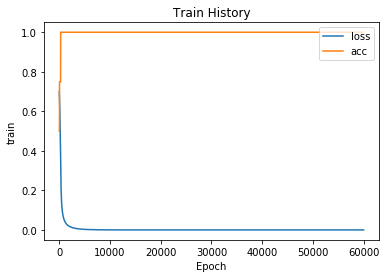

[array([[2.0085301]], dtype=float32), array([[2.0085301]], dtype=float32), array([[1.846742  , 0.12047673],
       [1.846742  , 0.12047673]], dtype=float32), array([-0.39254734,  2.8022943 ], dtype=float32), array([[ 1.4840436 ,  2.0335557 ],
       [-2.0211594 , -0.91545445]], dtype=float32), array([-1.3315835, -0.4653652], dtype=float32), array([[-2.9372091,  2.7540092],
       [ 2.9230165, -2.6984293]], dtype=float32), array([-2.5429478,  2.4035935], dtype=float32), array([[ 8.6774845],
       [-7.860601 ]], dtype=float32), array([0.16647813], dtype=float32)]


In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'loss', 'acc')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2])
print(predictions)

[[9.9977122e-08]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.8324676e-08]]
